In [1]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt, exp
from statsmodels.tsa.holtwinters import ExponentialSmoothing



In [2]:
def select_country(df, name, target):
    country = df[df['Country'] == name]
    data = country[['Year', target]].copy()
    data['Year'] = pd.to_datetime(data['Year'], format='%Y')
    data = data.set_index('Year')
    return data

In [3]:
def evaluate_arima_model(data, order):
    train_size = int(len(data) * 0.8)
    train, test = data[:train_size], data[train_size:]
    history = list(train[target])
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[target].iloc[t])
    
    mse = mean_squared_error(test, predictions)
    rmse = sqrt(mse)
    mae = mean_absolute_error(test, predictions)
    
    return model_fit, predictions, mse, rmse, mae

In [4]:
def forecast_arima(model, data, steps):
    forecast = model.forecast(steps=steps)
    forecast_dates = pd.date_range(start=data.index[-1] + pd.DateOffset(years=1), periods=steps, freq='A')
    return forecast, forecast_dates

In [5]:
def find_best_params(data):
    best_rmse, best_params = float("inf"), None
    for p in range(3):
        for d in range(3):
            for q in range(3):
                order = (p, d, q)
                try:
                    _, _, _, rmse, _ = evaluate_arima_model(data, order)
                    if rmse < best_rmse:
                        best_rmse, best_params = rmse, order
                except:
                    continue
    return best_params

In [6]:
emissions_log = pd.read_excel('/Users/senairemtoka/Downloads/bitmiş datalar/GHGlogtransformated.xlsx')

target = 'Total GHG emissions without LULUCF'
n_out = 9 


Processing data for Australia


/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/sit

Best parameters for Australia: (1, 0, 1)
MSE for Australia: 0.0002266909311522207
RMSE for Australia: 0.015056258869726592
MAE for Australia: 0.012757931954859001
Forecast for Australia in log scale:
[6.25144314 6.24966284 6.24792102 6.24621683 6.24454946 6.24291812
 6.24132202 6.23976041 6.23823254]


/var/folders/2q/pcf5d9l92q7d6gyfpsp7zw5m0000gn/T/ipykernel_68260/722636568.py:3: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_dates = pd.date_range(start=data.index[-1] + pd.DateOffset(years=1), periods=steps, freq='A')


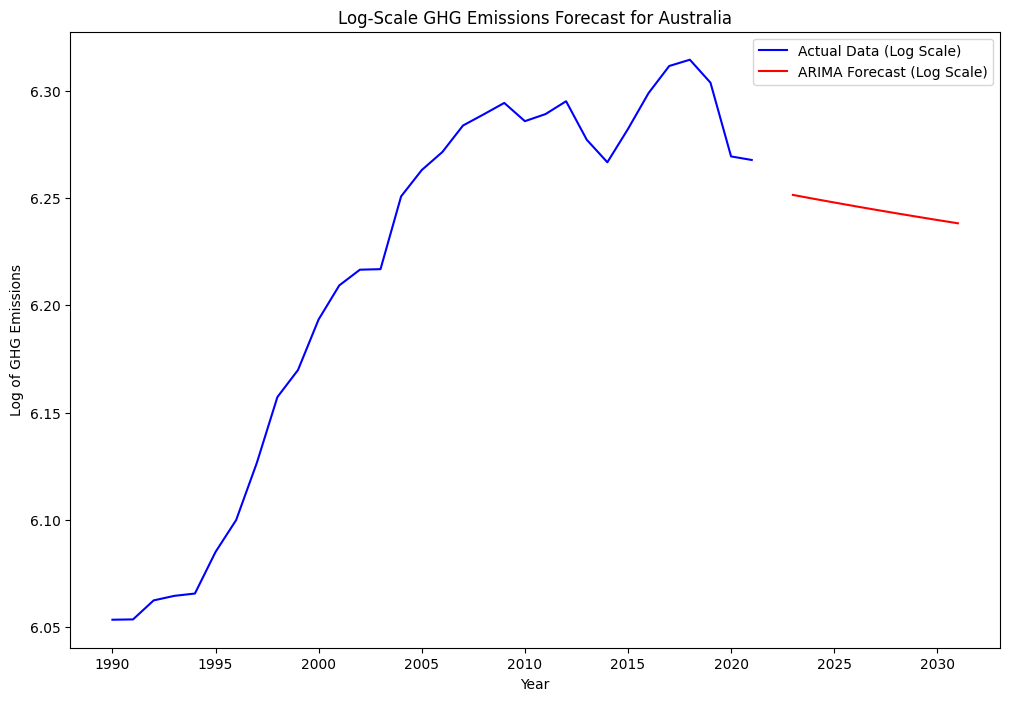

Forecast for Australia in original scale:
[518.7609272092882, 517.8382032977253, 516.9370046482544, 516.0567956287931, 515.197055368141, 514.3572772895017, 513.5369686611392, 512.7356501634431, 511.95285547171767]


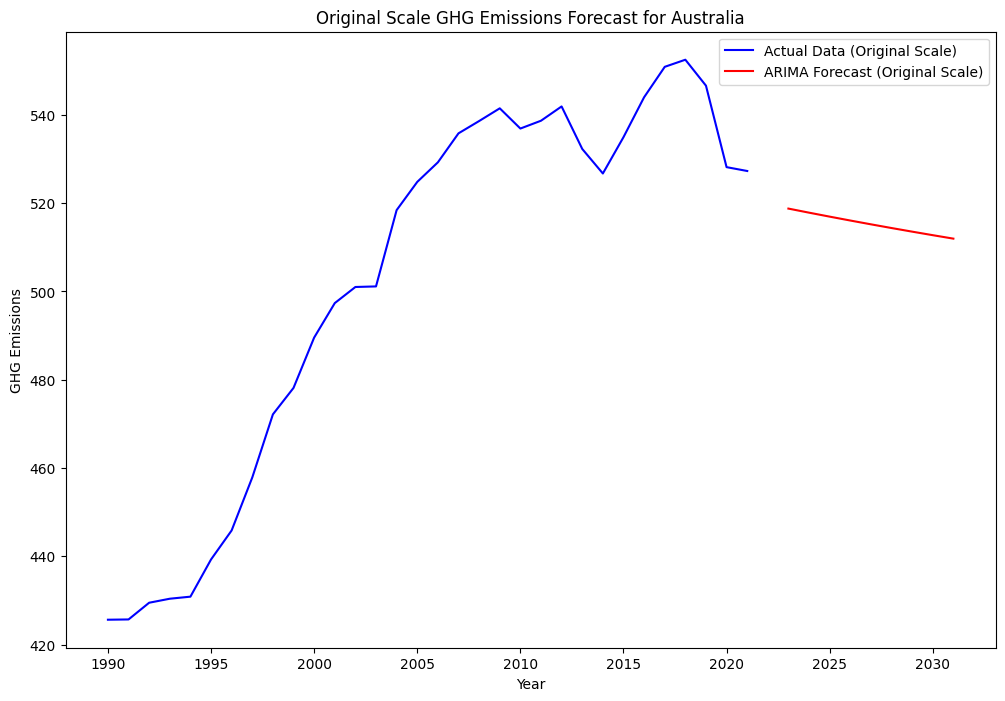


Processing data for Austria


/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-package

Best parameters for Austria: (2, 0, 2)


/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MSE for Austria: 0.0008675978855589746
RMSE for Austria: 0.029455014608025142
MAE for Austria: 0.021796663995385174
Forecast for Austria in log scale:
[4.33102383 4.31358678 4.34993911 4.36515958 4.37653196 4.3836615
 4.38834078 4.39137358 4.39334594]


/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/2q/pcf5d9l92q7d6gyfpsp7zw5m0000gn/T/ipykernel_68260/722636568.py:3: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_dates = pd.date_range(start=data.index[-1] + pd.DateOffset(years=1), periods=steps, freq='A')


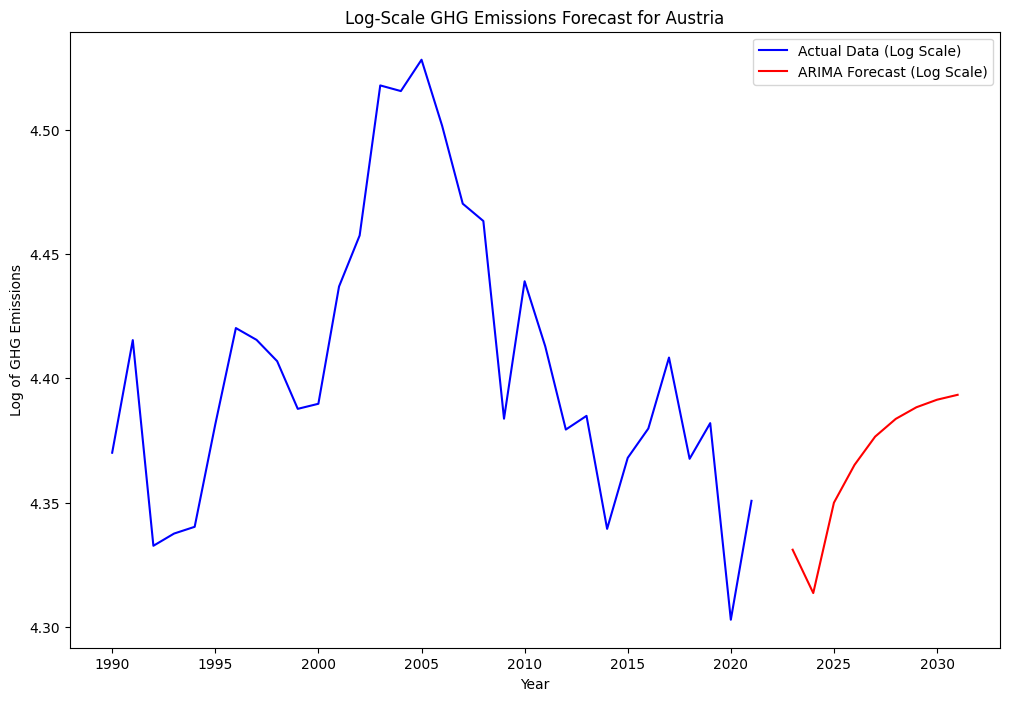

Forecast for Austria in original scale:
[76.02208015778753, 74.70797033750848, 77.47374539790977, 78.6619514863379, 79.56163168734192, 80.1308965432659, 80.50672944337443, 80.751261490476, 80.9106889984185]


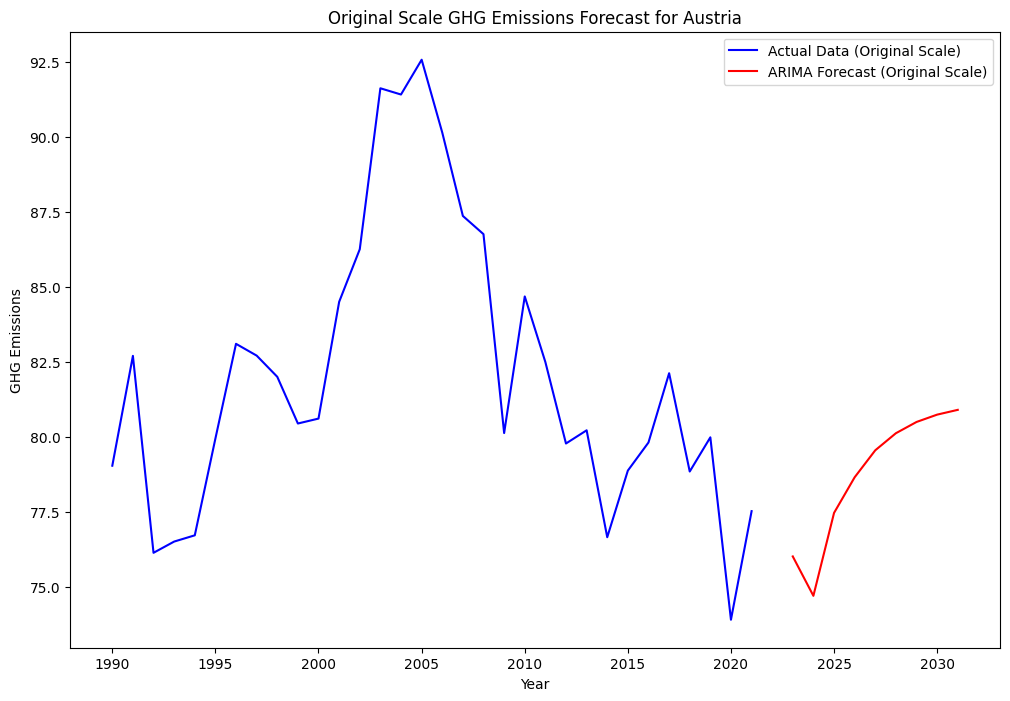


Processing data for Belgium


/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-package

Best parameters for Belgium: (0, 1, 2)
MSE for Belgium: 0.0010741051997267157
RMSE for Belgium: 0.03277354420453662
MAE for Belgium: 0.02284147536153101
Forecast for Belgium in log scale:
[4.71184877 4.65667504 4.65667504 4.65667504 4.65667504 4.65667504
 4.65667504 4.65667504 4.65667504]


/var/folders/2q/pcf5d9l92q7d6gyfpsp7zw5m0000gn/T/ipykernel_68260/722636568.py:3: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_dates = pd.date_range(start=data.index[-1] + pd.DateOffset(years=1), periods=steps, freq='A')


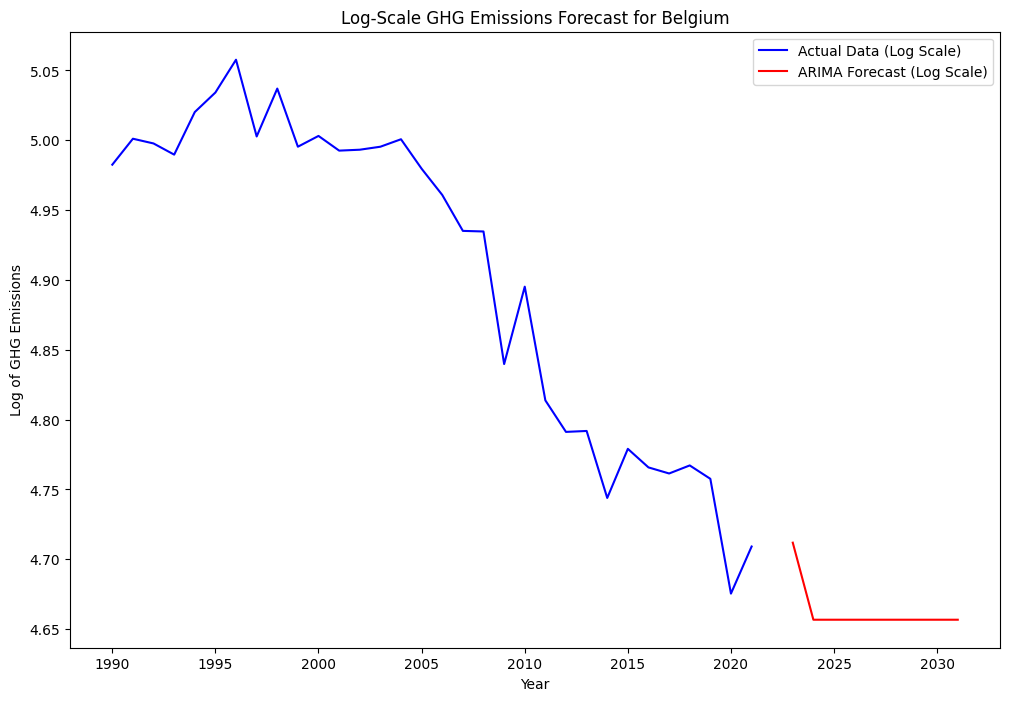

Forecast for Belgium in original scale:
[111.25765998673802, 105.28542972130492, 105.28542972130492, 105.28542972130492, 105.28542972130492, 105.28542972130492, 105.28542972130492, 105.28542972130492, 105.28542972130492]


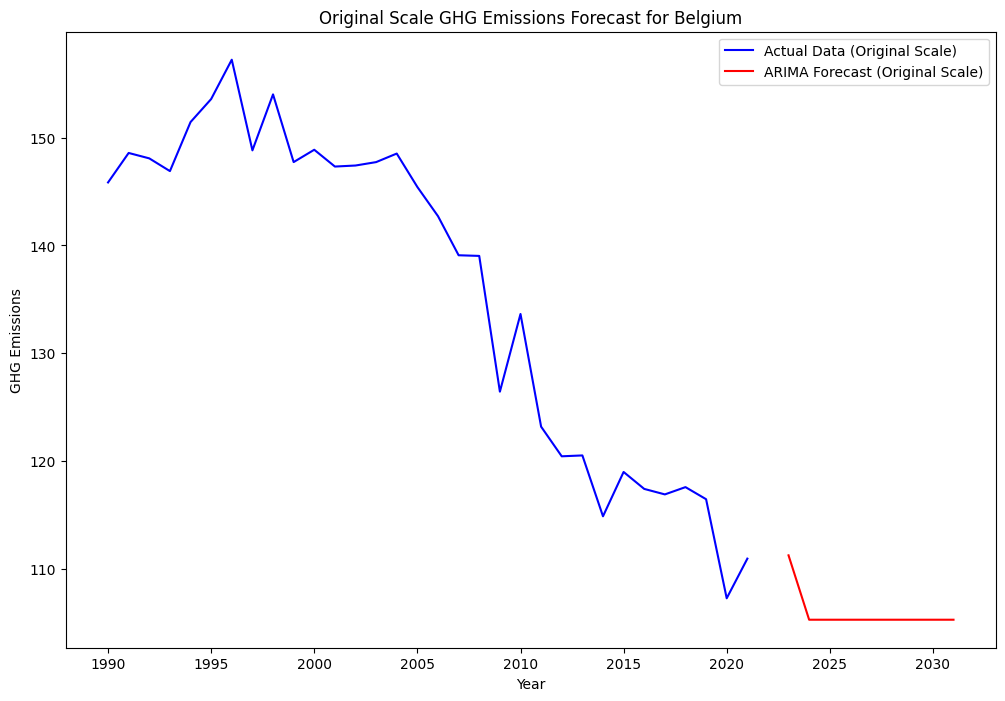


Processing data for Bulgaria


/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-package

Best parameters for Bulgaria: (0, 1, 0)
MSE for Bulgaria: 0.005599868565310913
RMSE for Bulgaria: 0.07483226954537002
MAE for Bulgaria: 0.06603127166481768
Forecast for Bulgaria in log scale:
[3.87088045 3.87088045 3.87088045 3.87088045 3.87088045 3.87088045
 3.87088045 3.87088045 3.87088045]


/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/2q/pcf5d9l92q7d6gyfpsp7zw5m0000gn/T/ipykernel_68260/722636568.py:3: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_dates = pd.date_range(start=data.index[-1] + pd.DateOffset(years=1), periods=steps, freq='A')


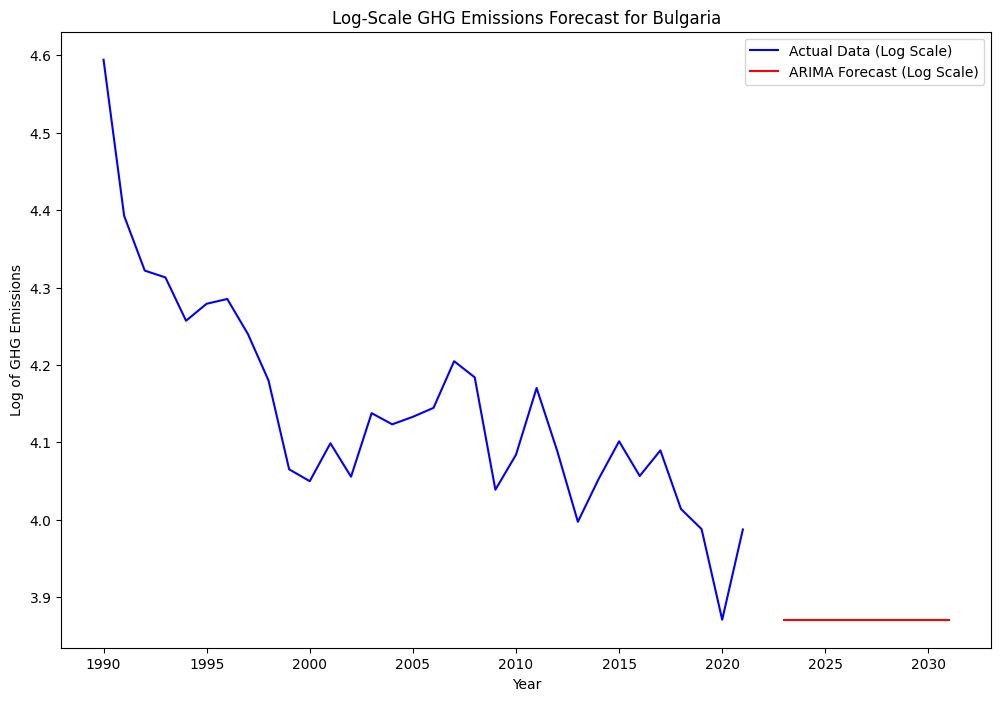

Forecast for Bulgaria in original scale:
[47.9846153420359, 47.9846153420359, 47.9846153420359, 47.9846153420359, 47.9846153420359, 47.9846153420359, 47.9846153420359, 47.9846153420359, 47.9846153420359]


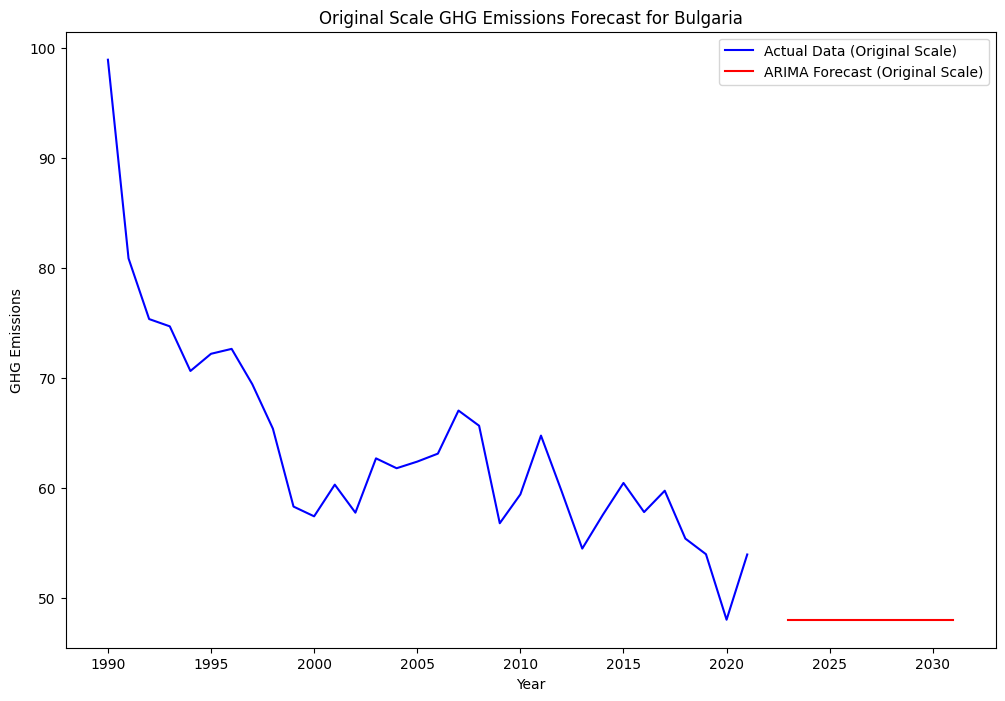


Processing data for Canada


/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-package

Best parameters for Canada: (1, 0, 0)
MSE for Canada: 0.0014031544039495674
RMSE for Canada: 0.037458702646375346
MAE for Canada: 0.02456377214916929
Forecast for Canada in log scale:
[6.48990562 6.48943525 6.48898985 6.48856809 6.48816873 6.48779058
 6.4874325  6.48709344 6.48677238]


/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/2q/pcf5d9l92q7d6gyfpsp7zw5m0000gn/T/ipykernel_68260/722636568.py:3: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_dates = pd.date_range(start=data.index[-1] + pd.DateOffset(years=1), periods=steps, freq='A')


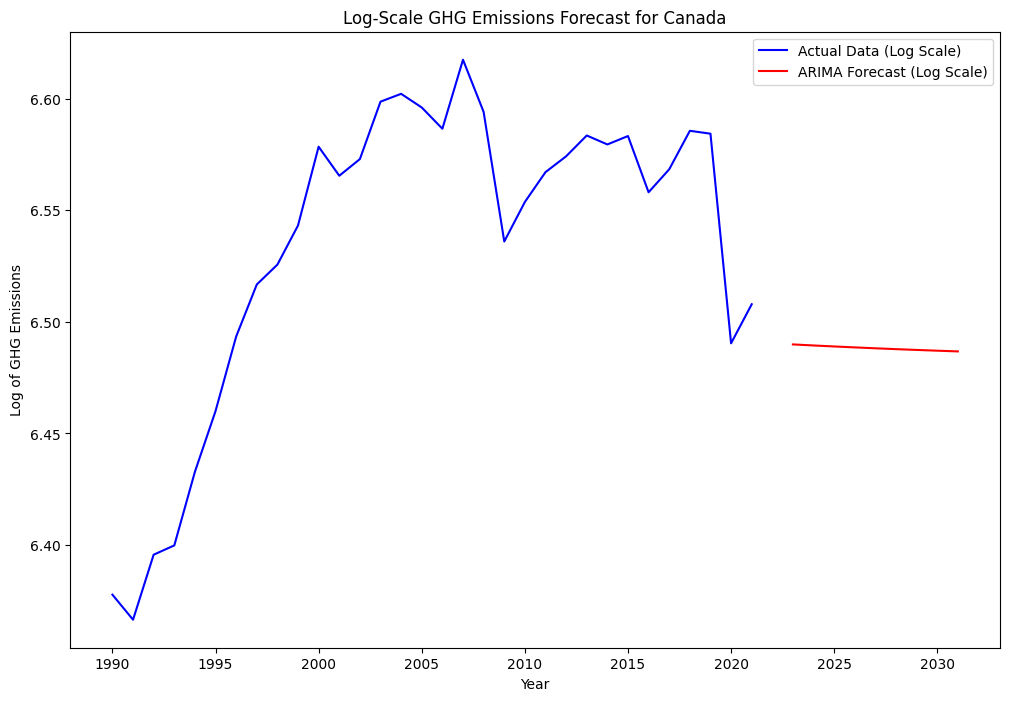

Forecast for Canada in original scale:
[658.4612164786813, 658.1515647159415, 657.8584884552748, 657.58109367446, 657.3185352683064, 657.0700143004356, 656.8347754167768, 656.6121044105172, 656.4013259289885]


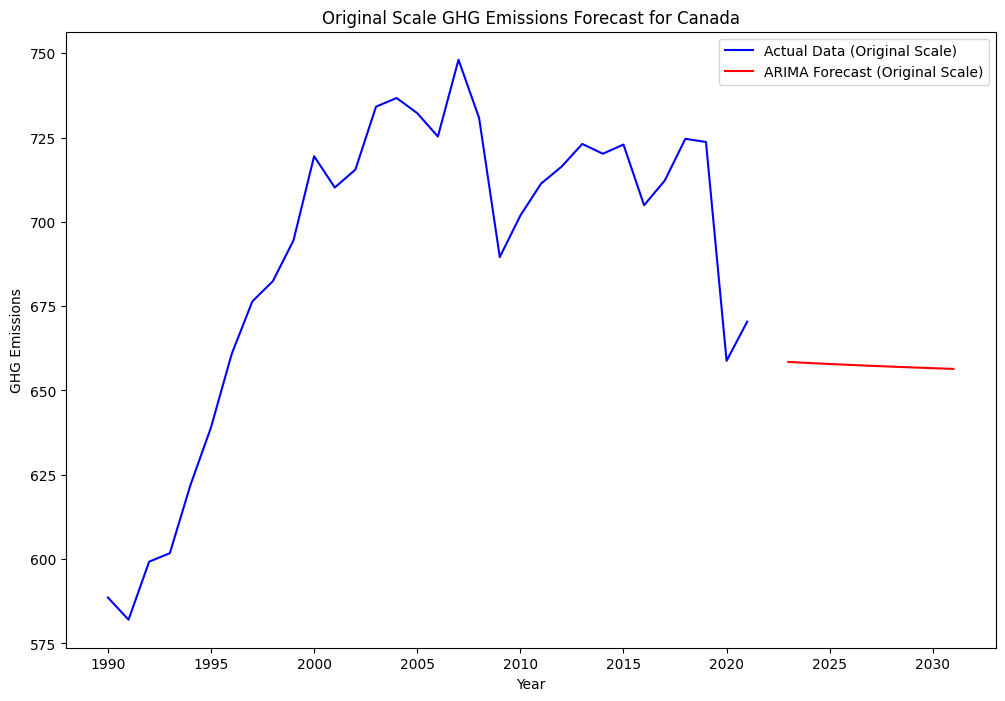


Processing data for Czechia


/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-package

Best parameters for Czechia: (0, 1, 0)
MSE for Czechia: 0.0017687485417200656
RMSE for Czechia: 0.042056492265999376
MAE for Czechia: 0.031815306776857684
Forecast for Czechia in log scale:
[4.72802525 4.72802525 4.72802525 4.72802525 4.72802525 4.72802525
 4.72802525 4.72802525 4.72802525]


/var/folders/2q/pcf5d9l92q7d6gyfpsp7zw5m0000gn/T/ipykernel_68260/722636568.py:3: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_dates = pd.date_range(start=data.index[-1] + pd.DateOffset(years=1), periods=steps, freq='A')


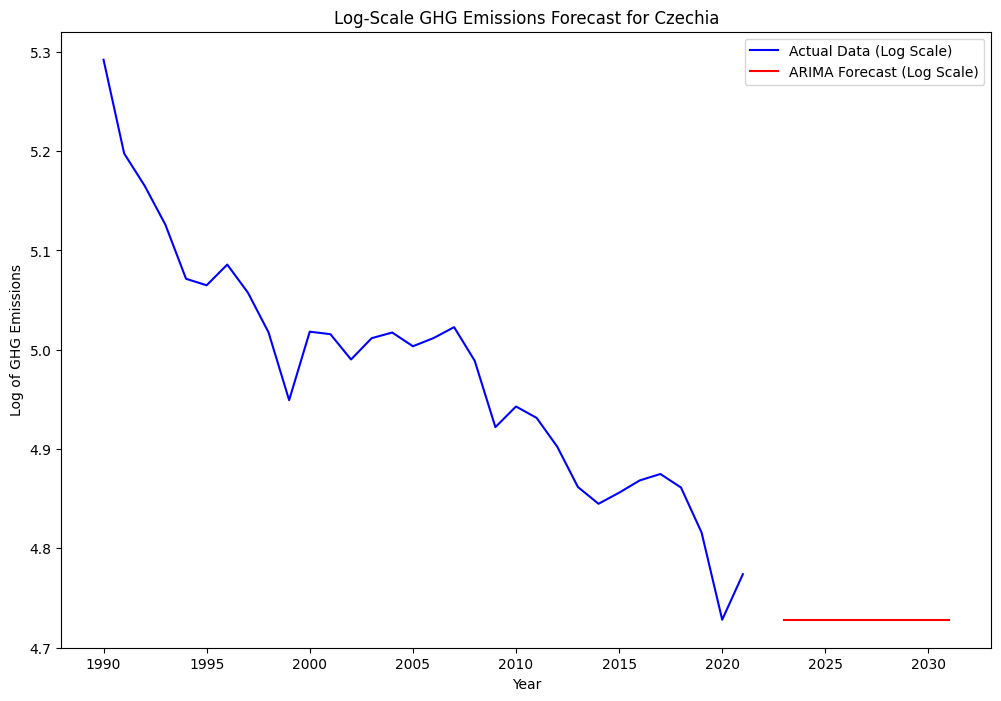

Forecast for Czechia in original scale:
[113.07205225478218, 113.07205225478218, 113.07205225478218, 113.07205225478218, 113.07205225478218, 113.07205225478218, 113.07205225478218, 113.07205225478218, 113.07205225478218]


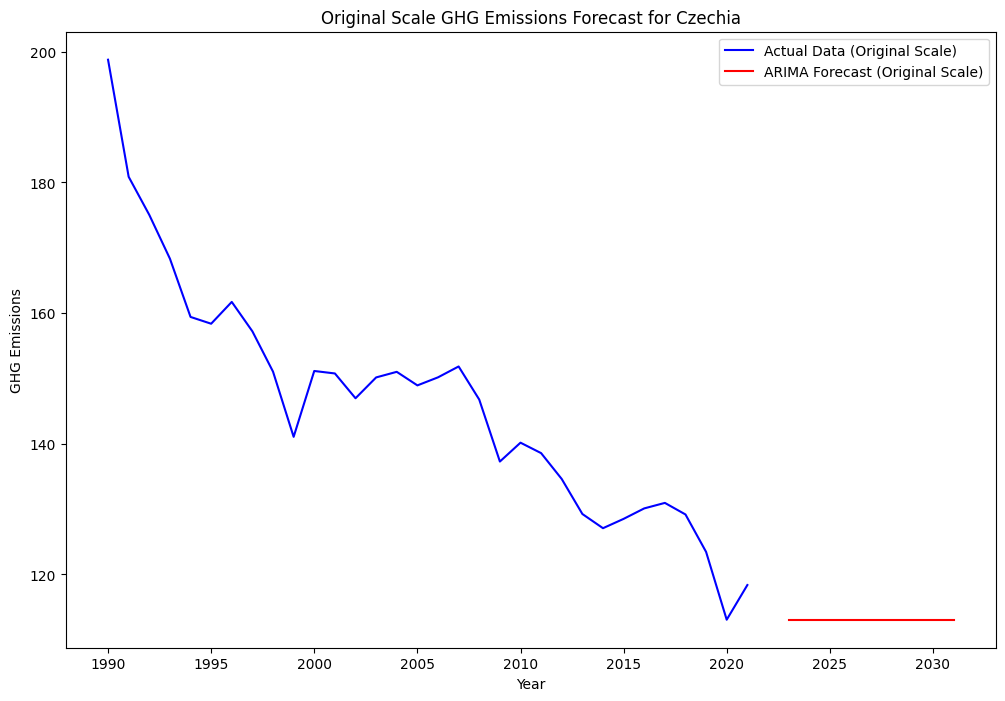


Processing data for Denmark


/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-packages/statsmo

Best parameters for Denmark: (2, 2, 1)
MSE for Denmark: 0.0016767410625169049
RMSE for Denmark: 0.04094802879891662
MAE for Denmark: 0.03879588456503148
Forecast for Denmark in log scale:
[3.78289925 3.74281301 3.70641068 3.6753559  3.64055223 3.60630793
 3.57275001 3.53868833 3.50471022]


/var/folders/2q/pcf5d9l92q7d6gyfpsp7zw5m0000gn/T/ipykernel_68260/722636568.py:3: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_dates = pd.date_range(start=data.index[-1] + pd.DateOffset(years=1), periods=steps, freq='A')


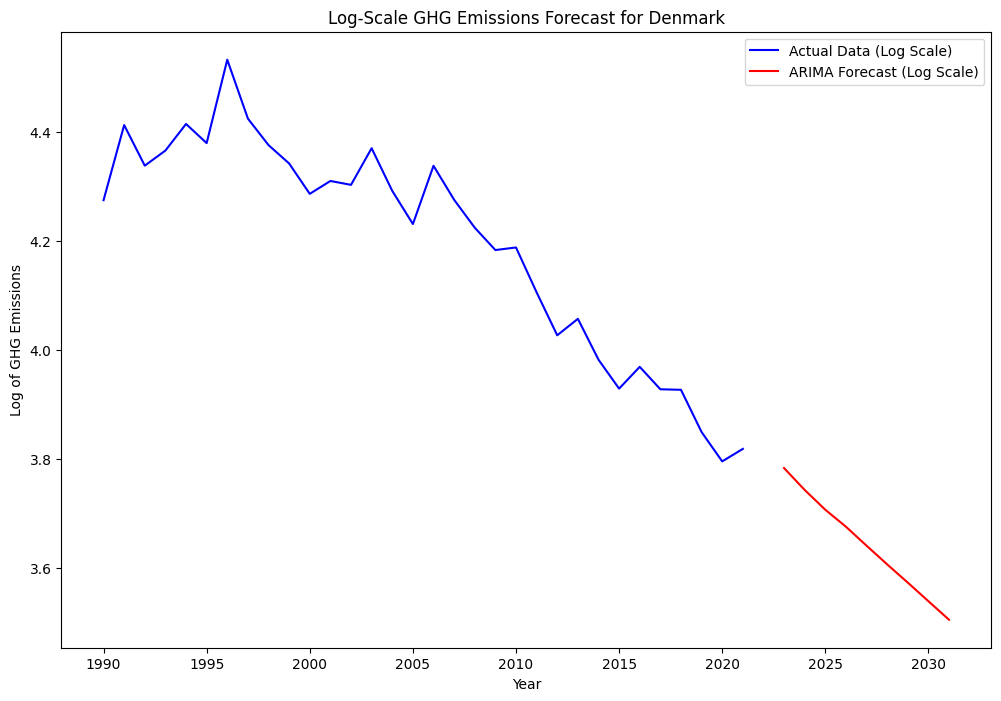

Forecast for Denmark in original scale:
[43.94325955556662, 42.216578957703895, 40.70743187572397, 39.46269927979767, 38.11287791371961, 36.82982327907221, 35.61439857018528, 34.42173960865003, 33.271800877815146]


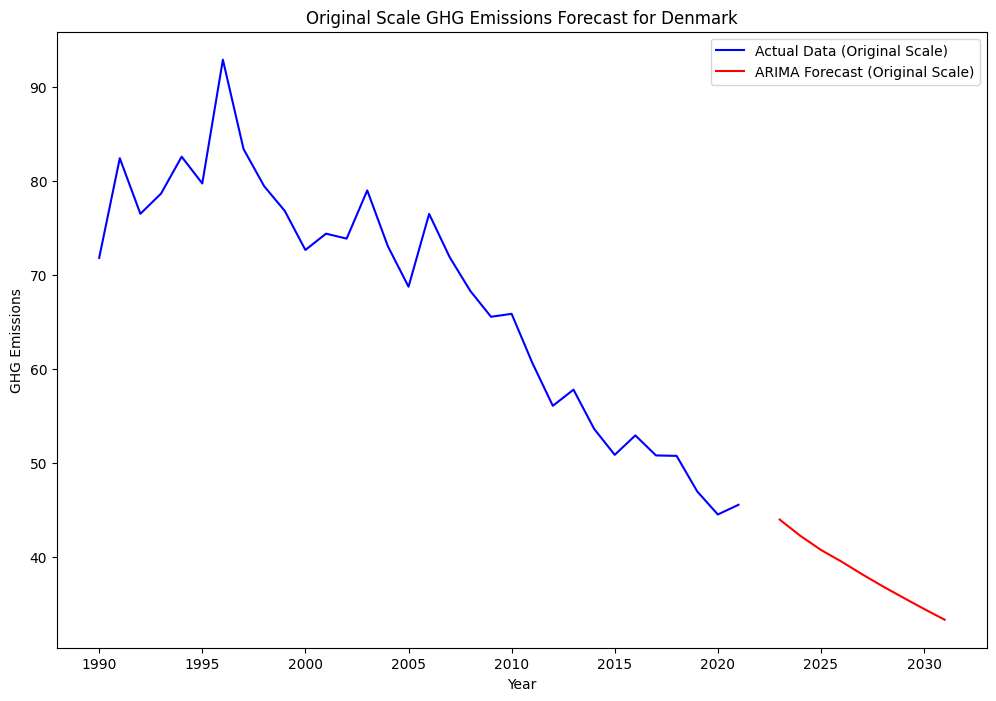


Processing data for Finland


/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-packages/statsmo

Best parameters for Finland: (2, 2, 1)
MSE for Finland: 0.002393794956777861
RMSE for Finland: 0.048926423911602825
MAE for Finland: 0.03990519071190603
Forecast for Finland in log scale:
[3.87182045 3.85407099 3.79953317 3.76964392 3.7462777  3.7095512
 3.67517607 3.64574538 3.61335358]


/var/folders/2q/pcf5d9l92q7d6gyfpsp7zw5m0000gn/T/ipykernel_68260/722636568.py:3: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_dates = pd.date_range(start=data.index[-1] + pd.DateOffset(years=1), periods=steps, freq='A')


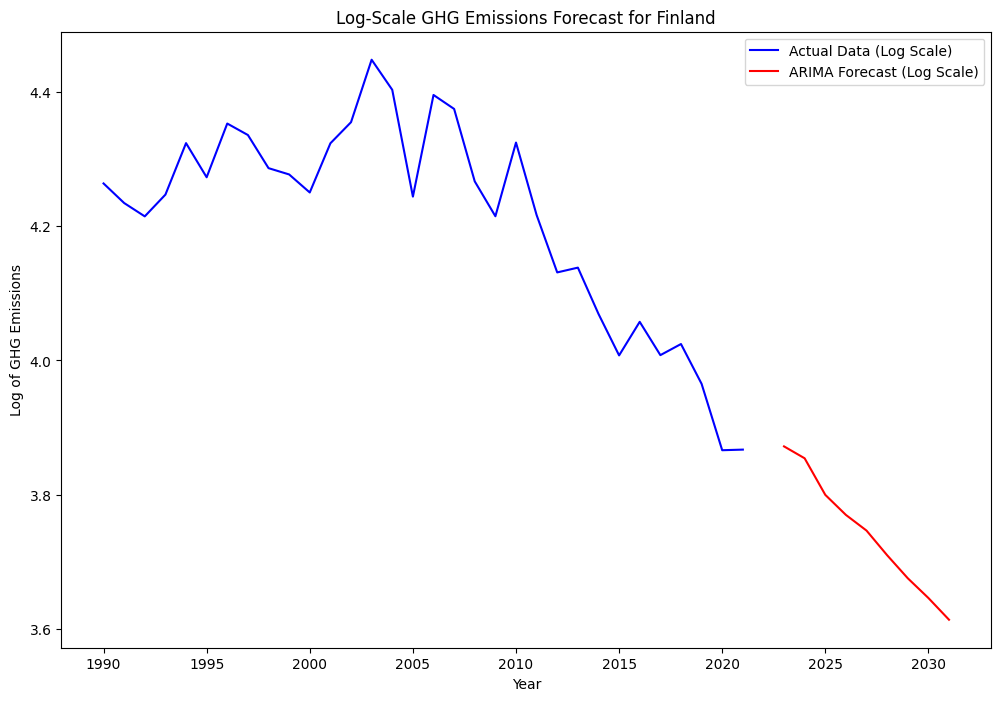

Forecast for Finland in original scale:
[48.02974221460942, 47.18476143457191, 44.680321588211655, 43.36462094824642, 42.36309986665896, 40.83547536049362, 39.45560311156964, 38.31131859667131, 37.09022958685301]


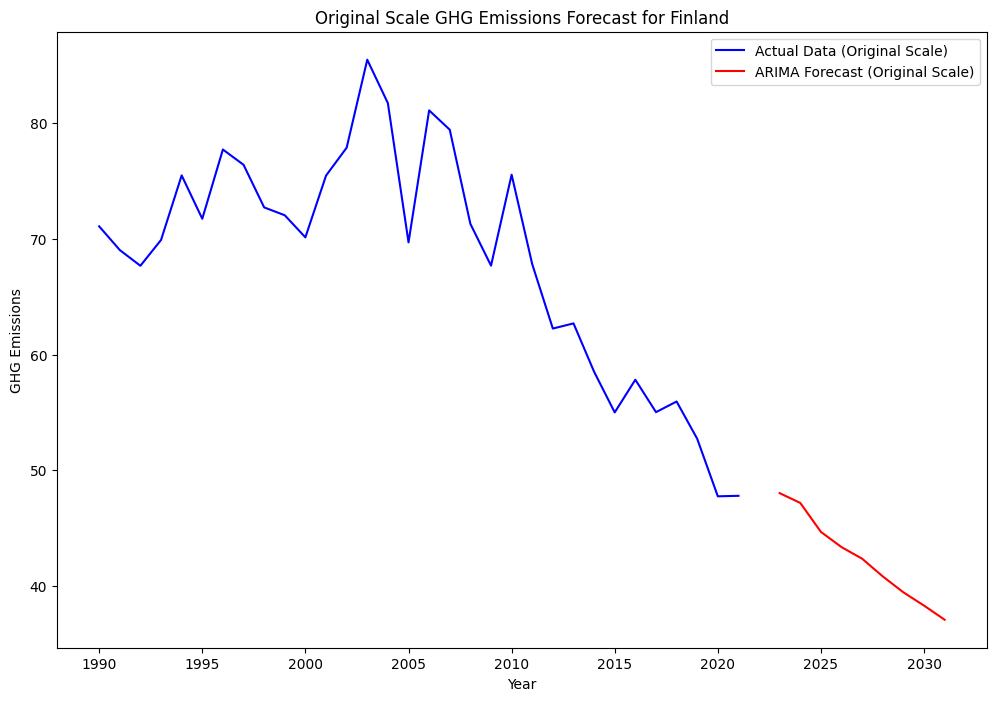


Processing data for France


/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Applications/anaconda3/lib/python3.11/sit

Best parameters for France: (0, 1, 0)
MSE for France: 0.0019812429221201383
RMSE for France: 0.044511155030173485
MAE for France: 0.03243812985665606
Forecast for France in log scale:
[5.98719804 5.98719804 5.98719804 5.98719804 5.98719804 5.98719804
 5.98719804 5.98719804 5.98719804]


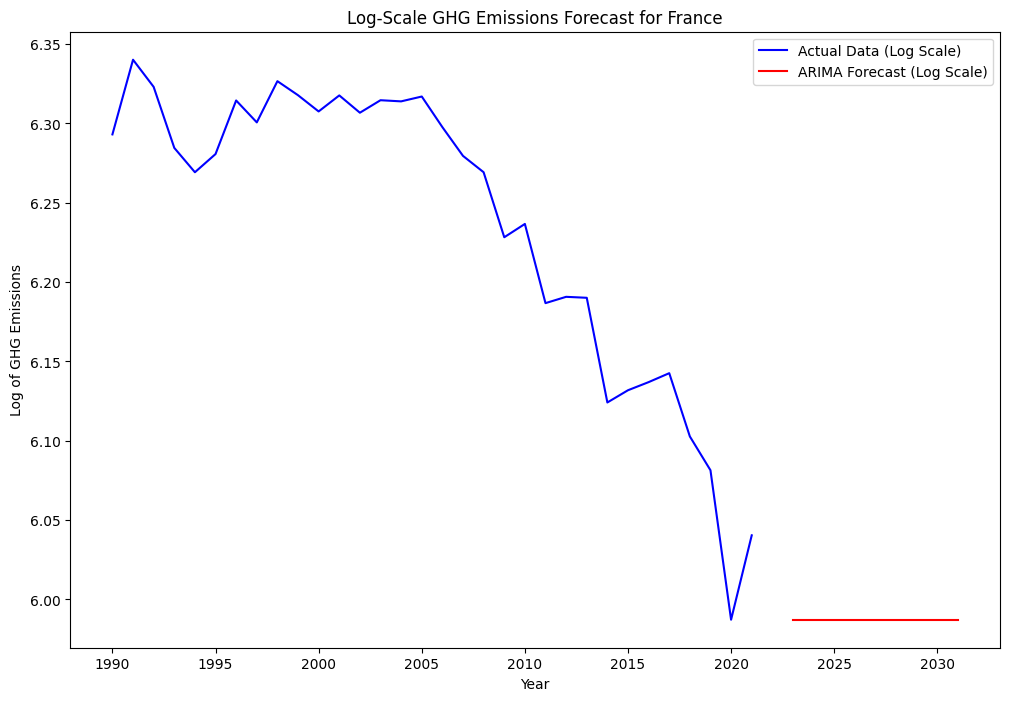

Forecast for France in original scale:
[398.29703079645543, 398.29703079645543, 398.29703079645543, 398.29703079645543, 398.29703079645543, 398.29703079645543, 398.29703079645543, 398.29703079645543, 398.29703079645543]


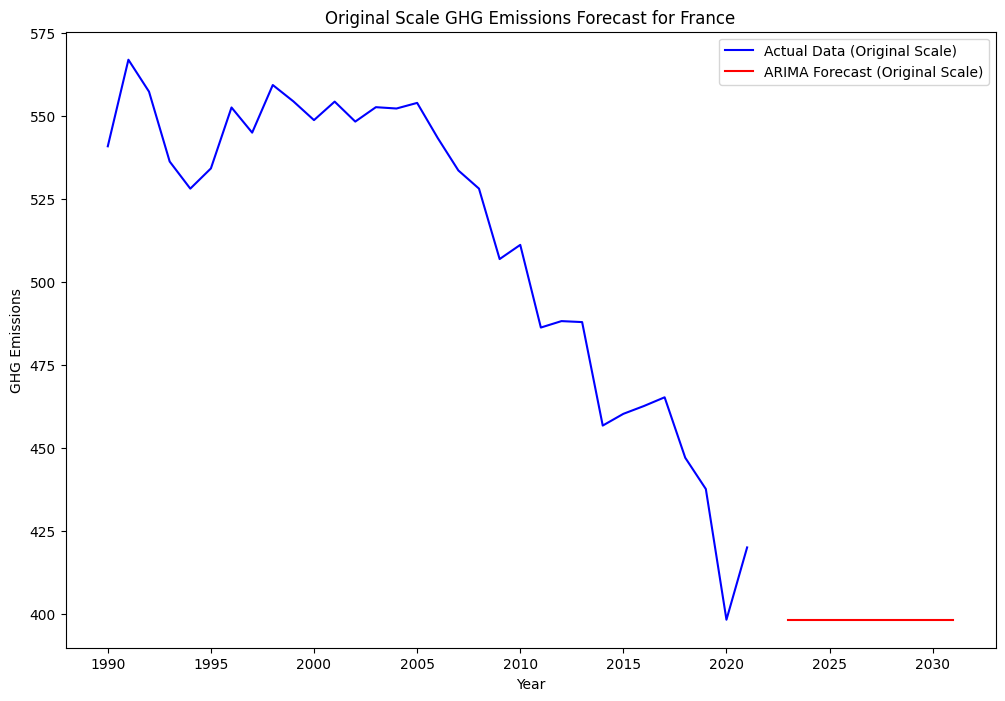


Processing data for Germany


/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-package

Best parameters for Germany: (1, 1, 1)
MSE for Germany: 0.0018430214695165602
RMSE for Germany: 0.04293042591818255
MAE for Germany: 0.03551959492535772
Forecast for Germany in log scale:
[6.57698504 6.55968662 6.54241239 6.52516233 6.5079364  6.49073456
 6.47355678 6.45640304 6.43927328]


/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/2q/pcf5d9l92q7d6gyfpsp7zw5m0000gn/T/ipykernel_68260/722636568.py:3: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_dates = pd.date_range(start=data.index[-1] + pd.DateOffset(years=1), periods=steps, freq='A')


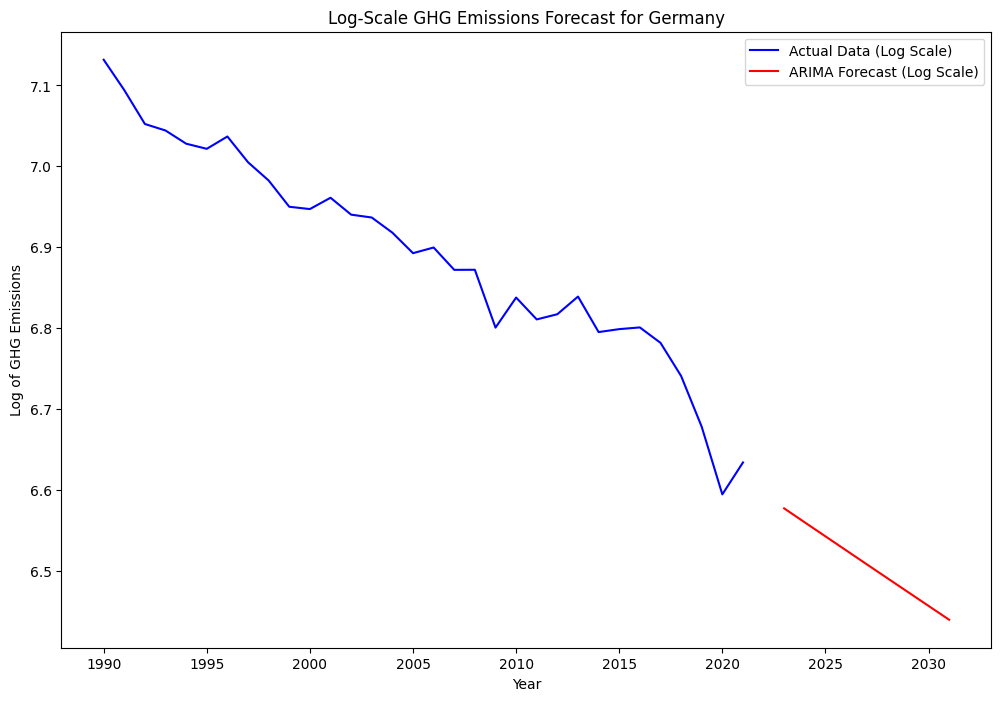

Forecast for Germany in original scale:
[718.3702036733342, 706.0503960540954, 693.9586605095596, 682.0904878541604, 670.4414633779829, 659.007264761486, 647.7836600384874, 636.7665056062385, 625.9517442814574]


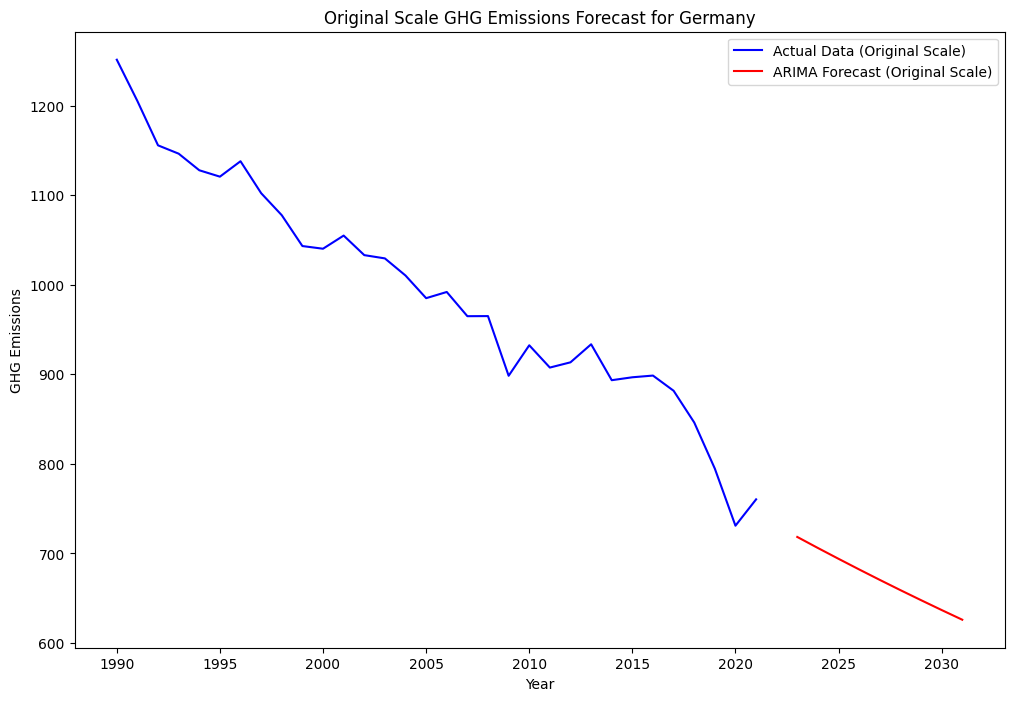


Processing data for Greece


/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Applications/anaconda3/lib/python3.11/sit

Best parameters for Greece: (0, 1, 1)
MSE for Greece: 0.004136250324143679
RMSE for Greece: 0.06431368691144738
MAE for Greece: 0.05896812228496717
Forecast for Greece in log scale:
[4.27666954 4.27666954 4.27666954 4.27666954 4.27666954 4.27666954
 4.27666954 4.27666954 4.27666954]


/var/folders/2q/pcf5d9l92q7d6gyfpsp7zw5m0000gn/T/ipykernel_68260/722636568.py:3: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_dates = pd.date_range(start=data.index[-1] + pd.DateOffset(years=1), periods=steps, freq='A')


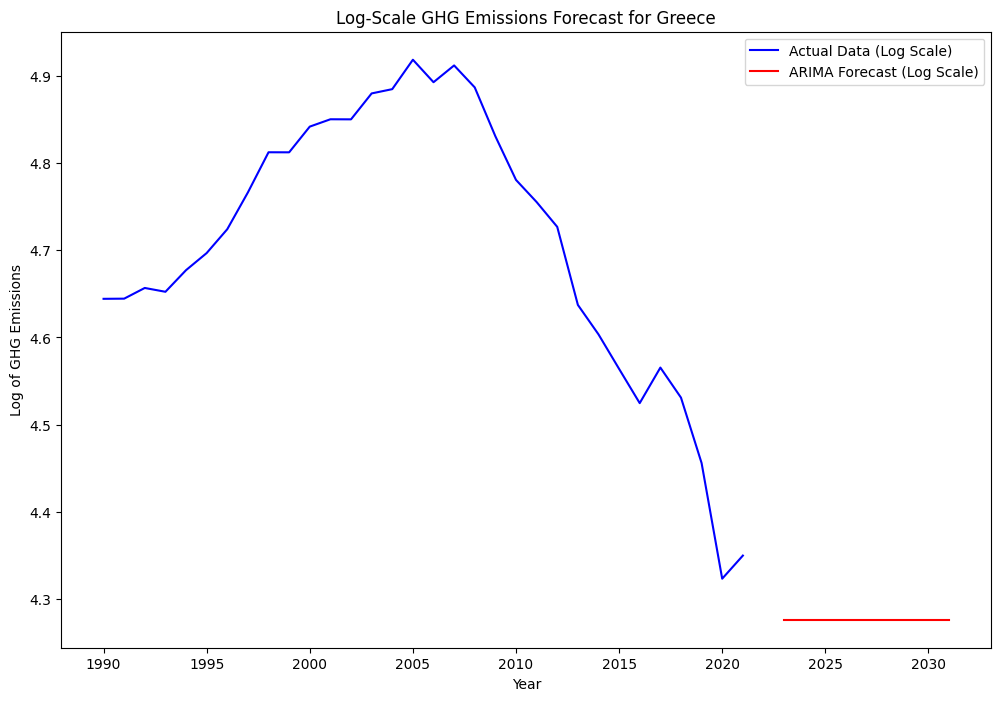

Forecast for Greece in original scale:
[72.00024650861651, 72.00024650861651, 72.00024650861651, 72.00024650861651, 72.00024650861651, 72.00024650861651, 72.00024650861651, 72.00024650861651, 72.00024650861651]


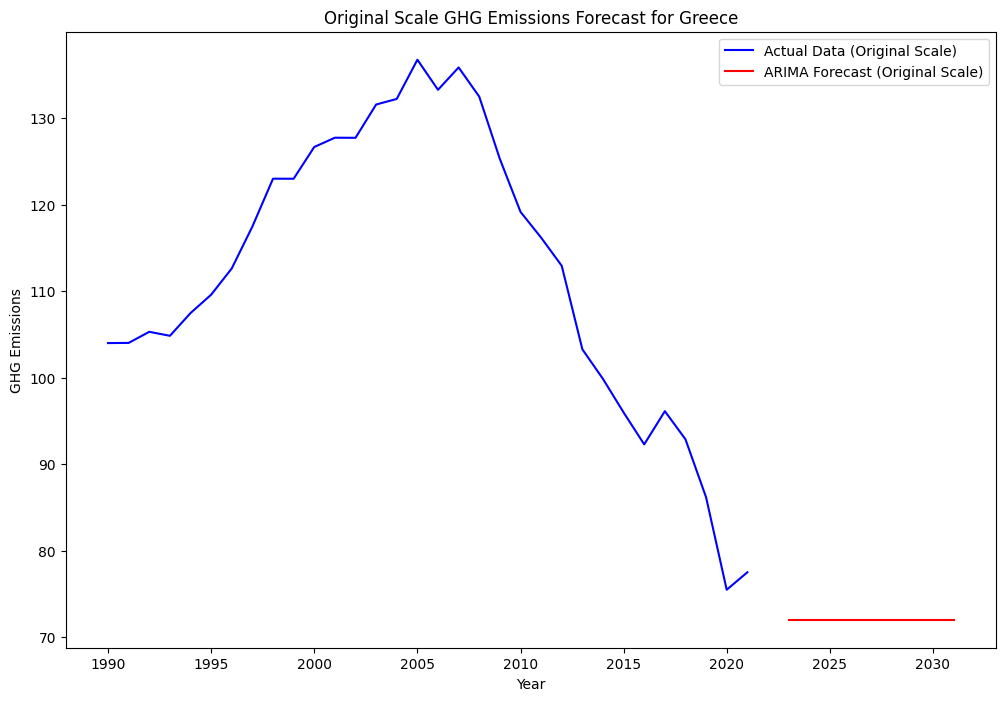


Processing data for Ireland


/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/sit

Best parameters for Ireland: (1, 0, 1)
MSE for Ireland: 0.0011691544792227638
RMSE for Ireland: 0.03419290100624344
MAE for Ireland: 0.030767329365613882
Forecast for Ireland in log scale:
[4.07622542 4.07866836 4.08091262 4.08297435 4.0848684  4.08660841
 4.08820691 4.08967539 4.09102445]


/var/folders/2q/pcf5d9l92q7d6gyfpsp7zw5m0000gn/T/ipykernel_68260/722636568.py:3: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_dates = pd.date_range(start=data.index[-1] + pd.DateOffset(years=1), periods=steps, freq='A')


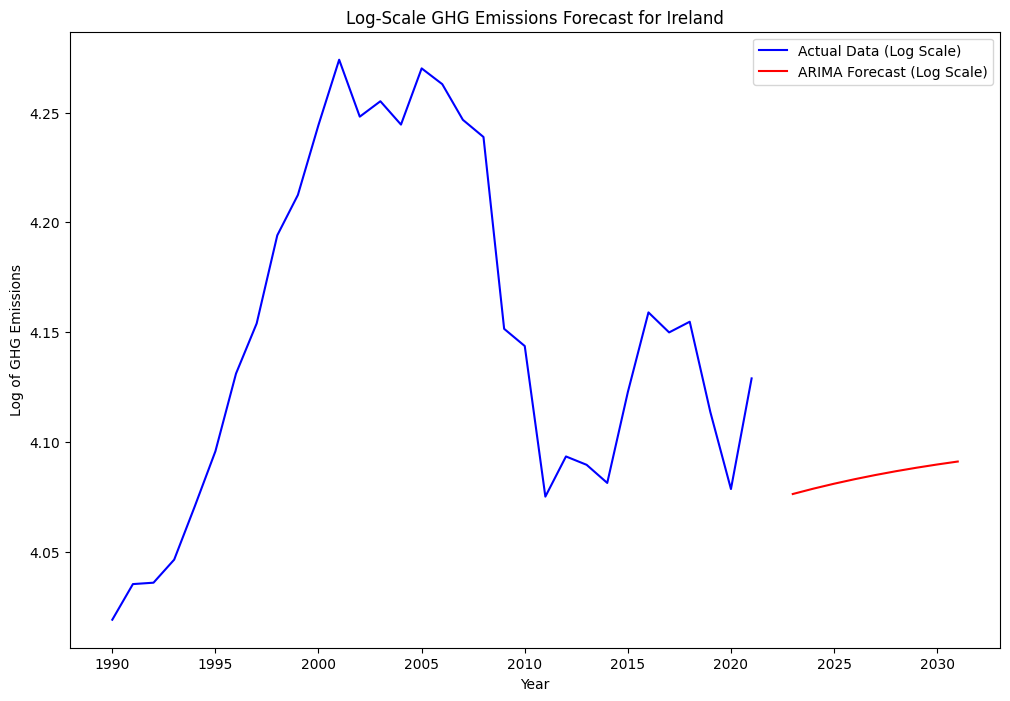

Forecast for Ireland in original scale:
[58.922641504225474, 59.066761948553655, 59.19947176502108, 59.32165109213904, 59.4341158274961, 59.53762173630771, 59.6328683934852, 59.72050294803793, 59.80112370307553]


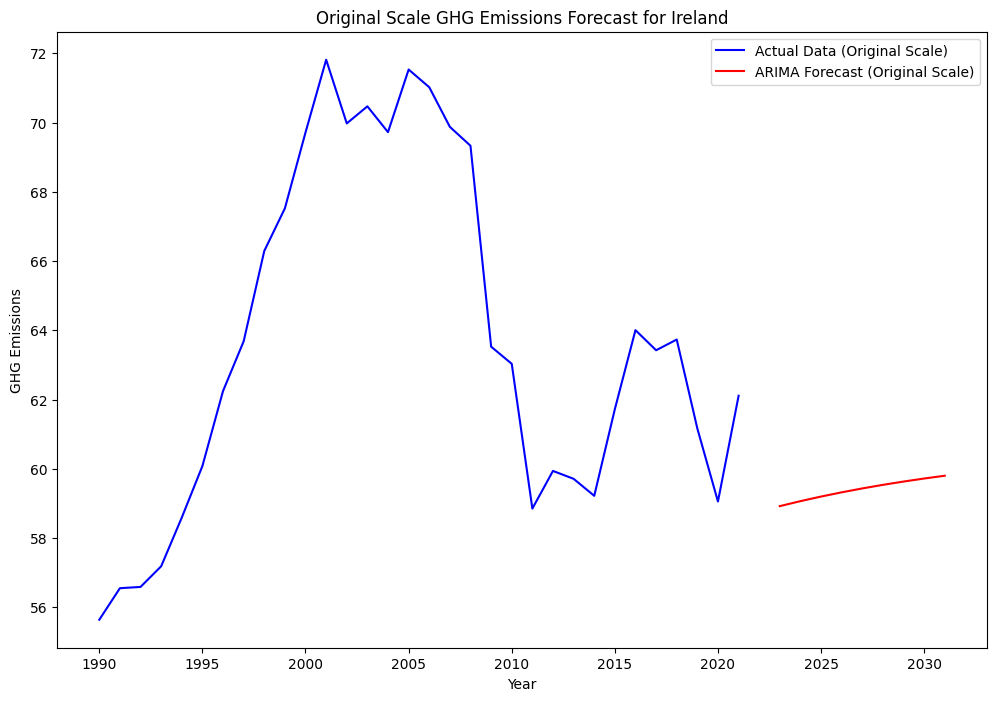


Processing data for Italy


/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Applications/anaconda3/lib/python3.11/sit

Best parameters for Italy: (0, 1, 0)
MSE for Italy: 0.0023857657180972164
RMSE for Italy: 0.048844300773961506
MAE for Italy: 0.0359088368013324
Forecast for Italy in log scale:
[5.95316509 5.95316509 5.95316509 5.95316509 5.95316509 5.95316509
 5.95316509 5.95316509 5.95316509]


/var/folders/2q/pcf5d9l92q7d6gyfpsp7zw5m0000gn/T/ipykernel_68260/722636568.py:3: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_dates = pd.date_range(start=data.index[-1] + pd.DateOffset(years=1), periods=steps, freq='A')


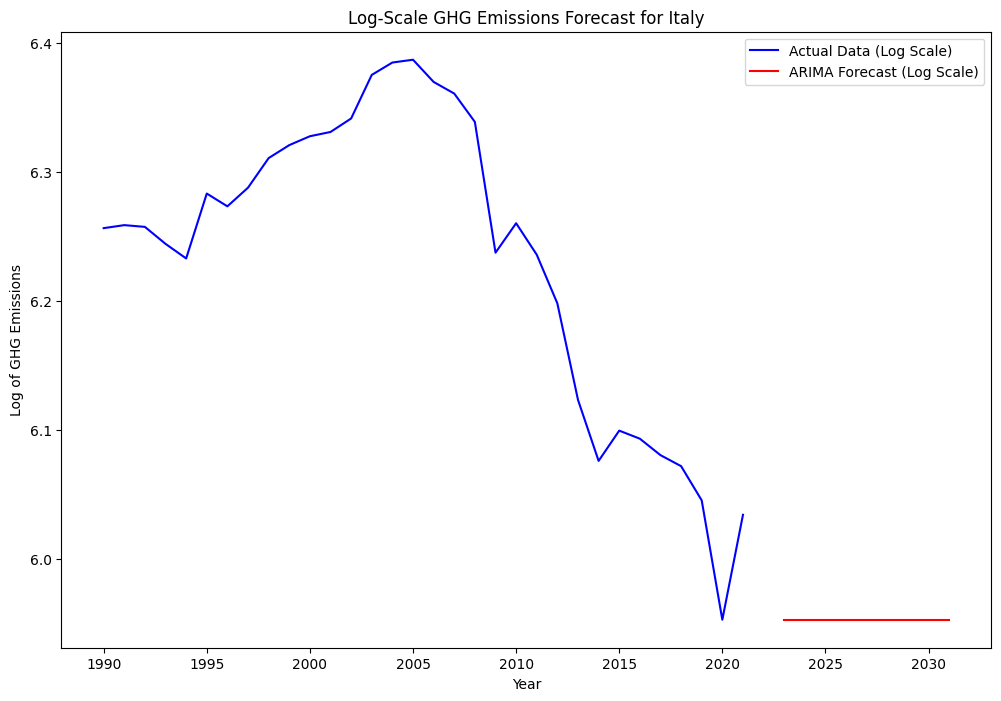

Forecast for Italy in original scale:
[384.9698768889379, 384.9698768889379, 384.9698768889379, 384.9698768889379, 384.9698768889379, 384.9698768889379, 384.9698768889379, 384.9698768889379, 384.9698768889379]


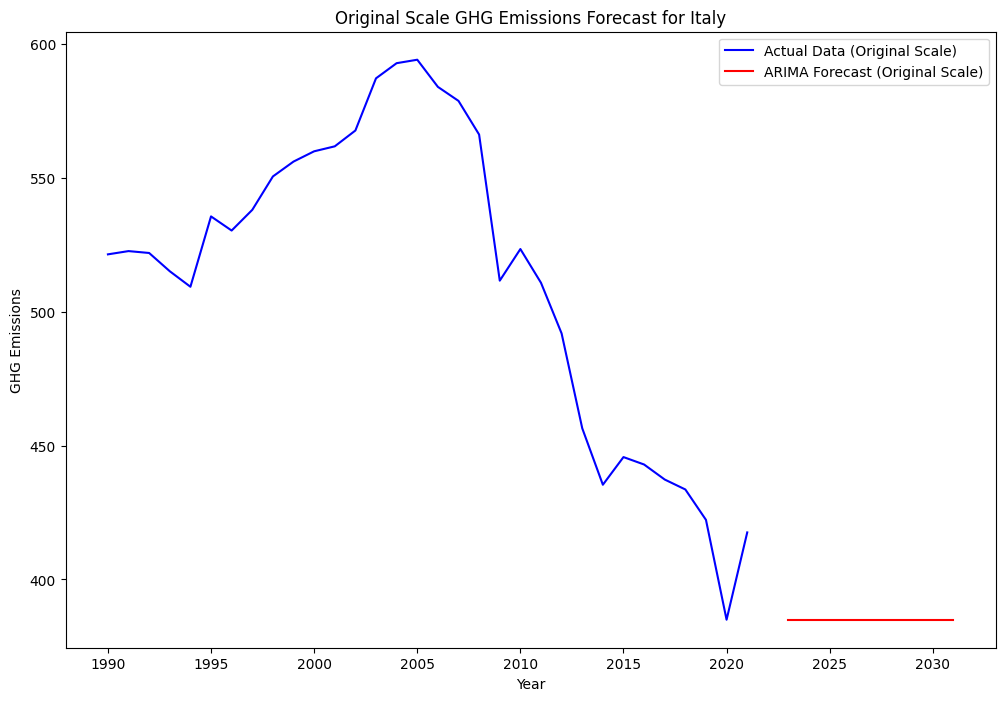


Processing data for Japan


/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Applications/anaconda3/lib/python3.11/sit

Best parameters for Japan: (0, 1, 1)
MSE for Japan: 0.0008201123343240869
RMSE for Japan: 0.028637603501761227
MAE for Japan: 0.024924827925080377
Forecast for Japan in log scale:
[7.02363136 7.02363136 7.02363136 7.02363136 7.02363136 7.02363136
 7.02363136 7.02363136 7.02363136]


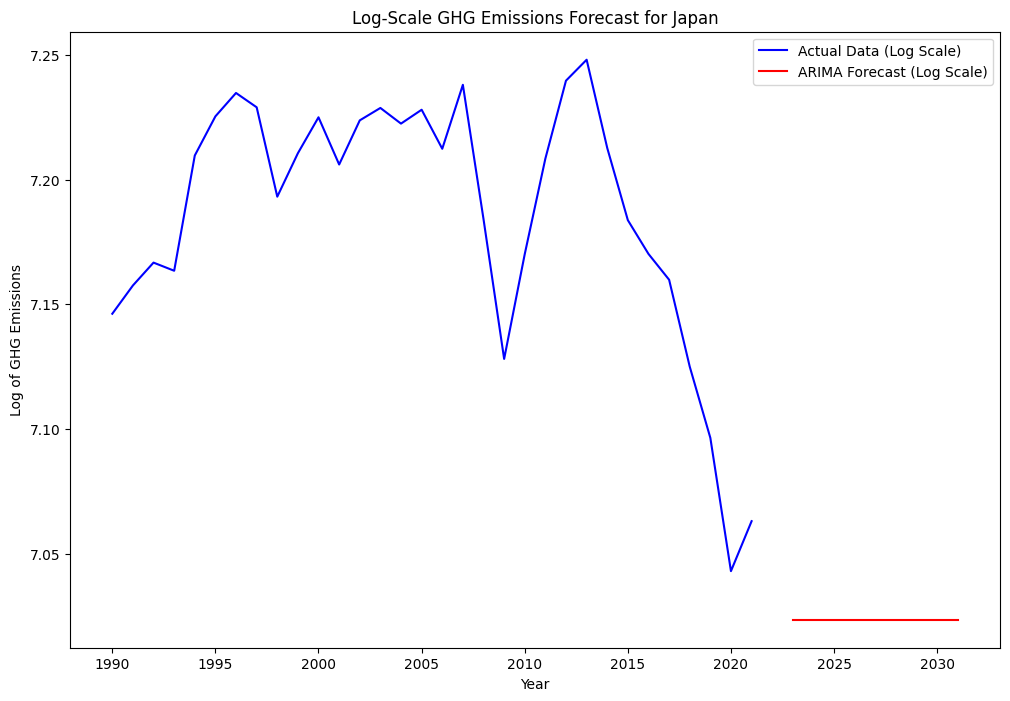

Forecast for Japan in original scale:
[1122.8567203818852, 1122.8567203818852, 1122.8567203818852, 1122.8567203818852, 1122.8567203818852, 1122.8567203818852, 1122.8567203818852, 1122.8567203818852, 1122.8567203818852]


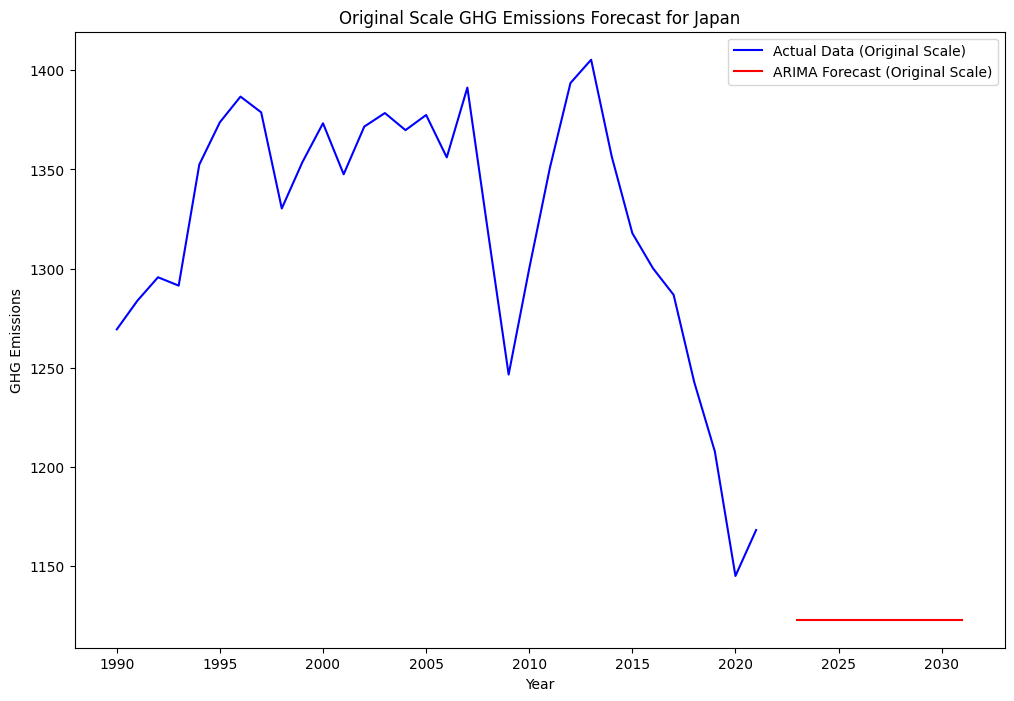


Processing data for Kazakhstan


/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Applications/anaconda3/lib/pytho

Best parameters for Kazakhstan: (2, 0, 0)
MSE for Kazakhstan: 0.0021500727793495682
RMSE for Kazakhstan: 0.046368877270746685
MAE for Kazakhstan: 0.039139282056657496
Forecast for Kazakhstan in log scale:
[5.80087953 5.79688814 5.79400521 5.79152875 5.78933739 5.78738956
 5.78565703 5.78411585 5.78274486]


/var/folders/2q/pcf5d9l92q7d6gyfpsp7zw5m0000gn/T/ipykernel_68260/722636568.py:3: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_dates = pd.date_range(start=data.index[-1] + pd.DateOffset(years=1), periods=steps, freq='A')


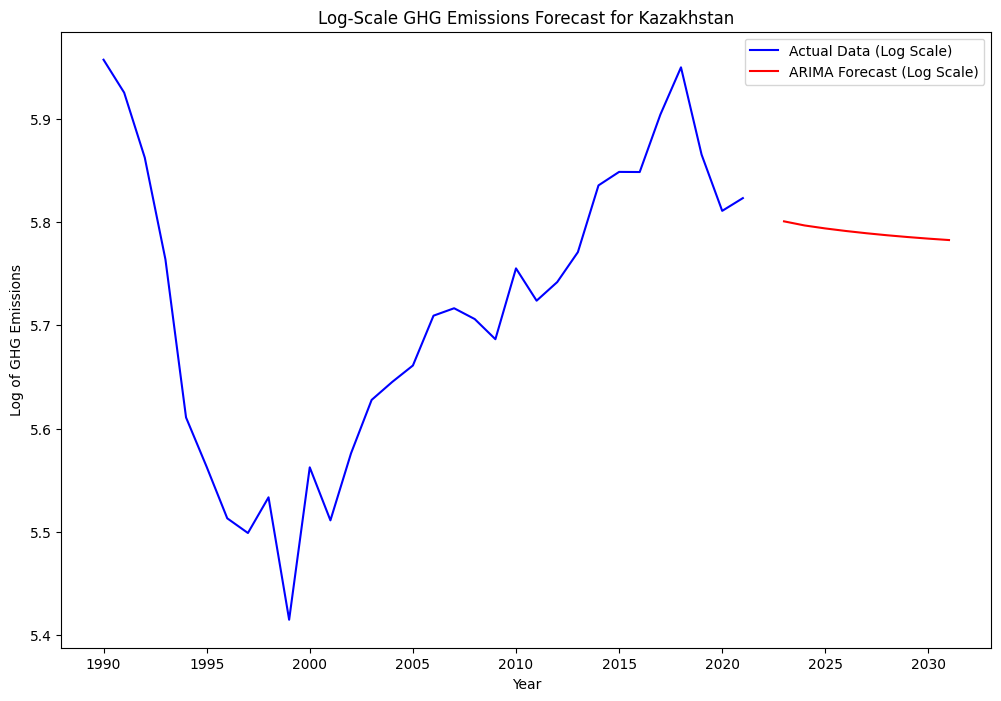

Forecast for Kazakhstan in original scale:
[330.59019576342587, 329.2733126917155, 328.3254067865806, 327.5133277823826, 326.79641453328617, 326.160489303344, 325.5958951556242, 325.0944791183546, 324.64908447224104]


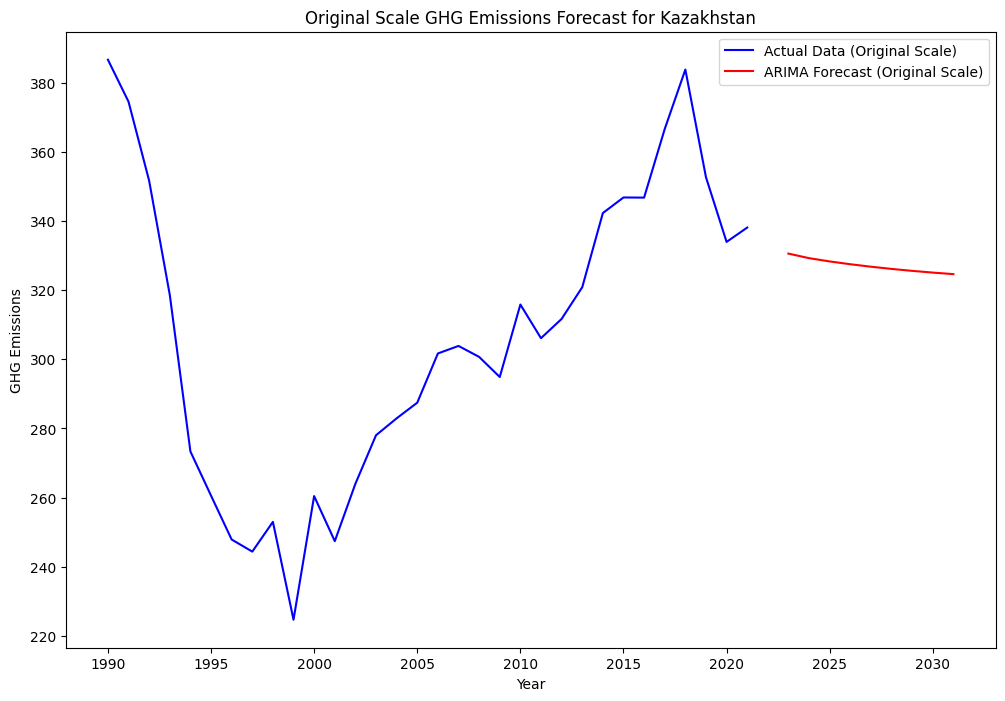


Processing data for Luxembourg


/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-package

Best parameters for Luxembourg: (2, 1, 2)


/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MSE for Luxembourg: 0.00475836261459467
RMSE for Luxembourg: 0.06898088586409042
MAE for Luxembourg: 0.03753461406541162
Forecast for Luxembourg in log scale:
[2.16497589 2.08487537 2.03669168 2.0438487  2.07977358 2.10679765
 2.10832419 2.09302294 2.07869631]


/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/2q/pcf5d9l92q7d6gyfpsp7zw5m0000gn/T/ipykernel_68260/722636568.py:3: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_dates = pd.date_range(start=data.index[-1] + pd.DateOffset(years=1), periods=steps, freq='A')


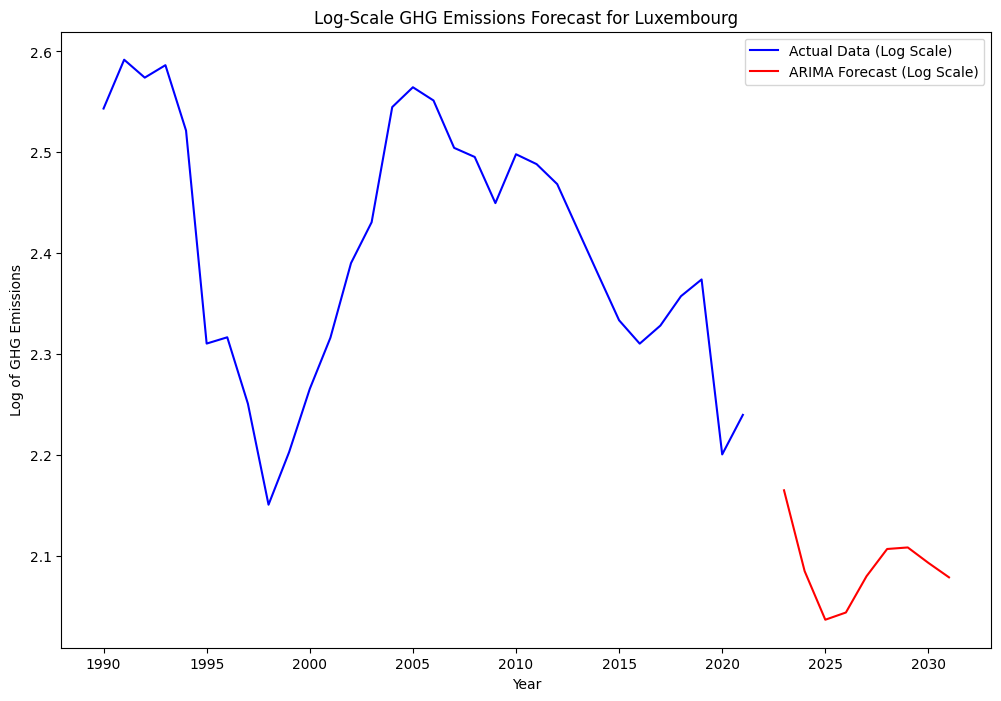

Forecast for Luxembourg in original scale:
[8.714391773735594, 8.04358898580663, 7.665208222106965, 7.720265099211367, 8.002656740361257, 8.22186974776221, 8.234430399231172, 8.10939232012948, 7.99404032855322]


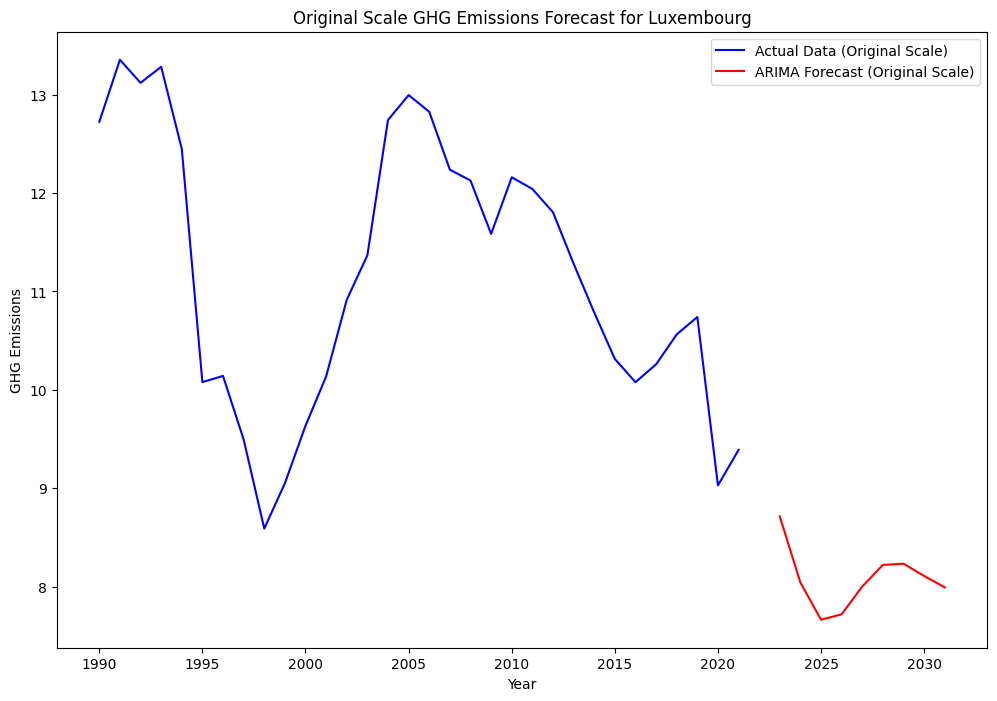


Processing data for New Zealand


/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-package

Best parameters for New Zealand: (1, 0, 0)
MSE for New Zealand: 0.00035299079419623137
RMSE for New Zealand: 0.018788049238711062
MAE for New Zealand: 0.015241758163458614
Forecast for New Zealand in log scale:
[4.34596487 4.34390528 4.3419097  4.33997614 4.33810268 4.33628744
 4.33452862 4.33282446 4.33117326]


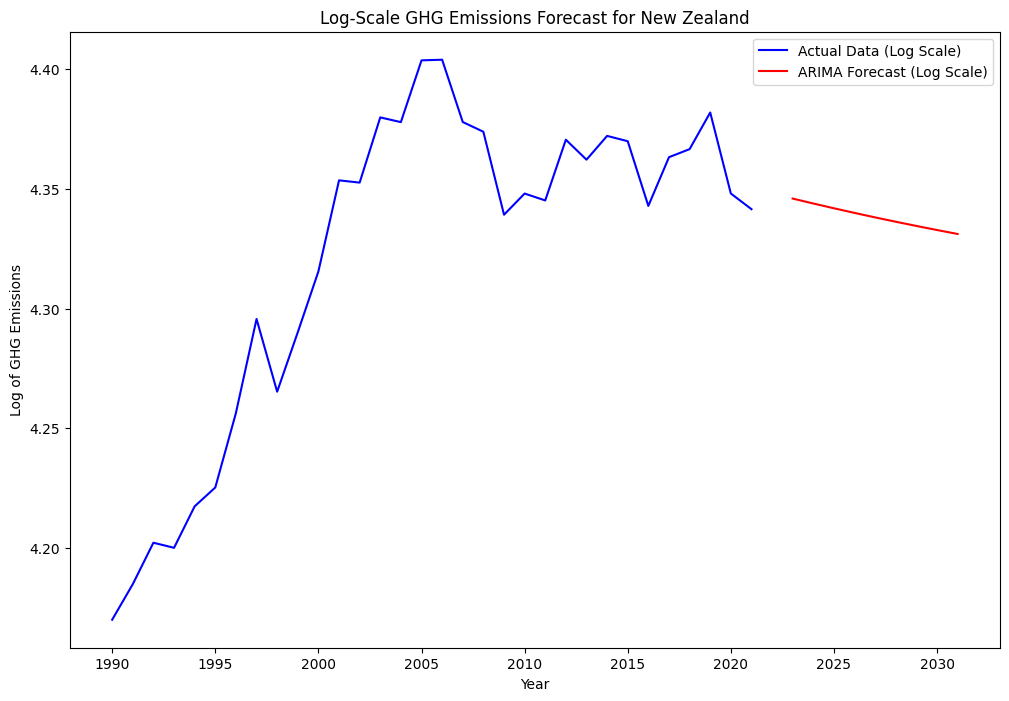

Forecast for New Zealand in original scale:
[77.16645724171973, 77.00768952817909, 76.85416779021779, 76.70570933617911, 76.56213840856442, 76.42328588666834, 76.28898900393057, 76.15909107916734, 76.03344126090036]


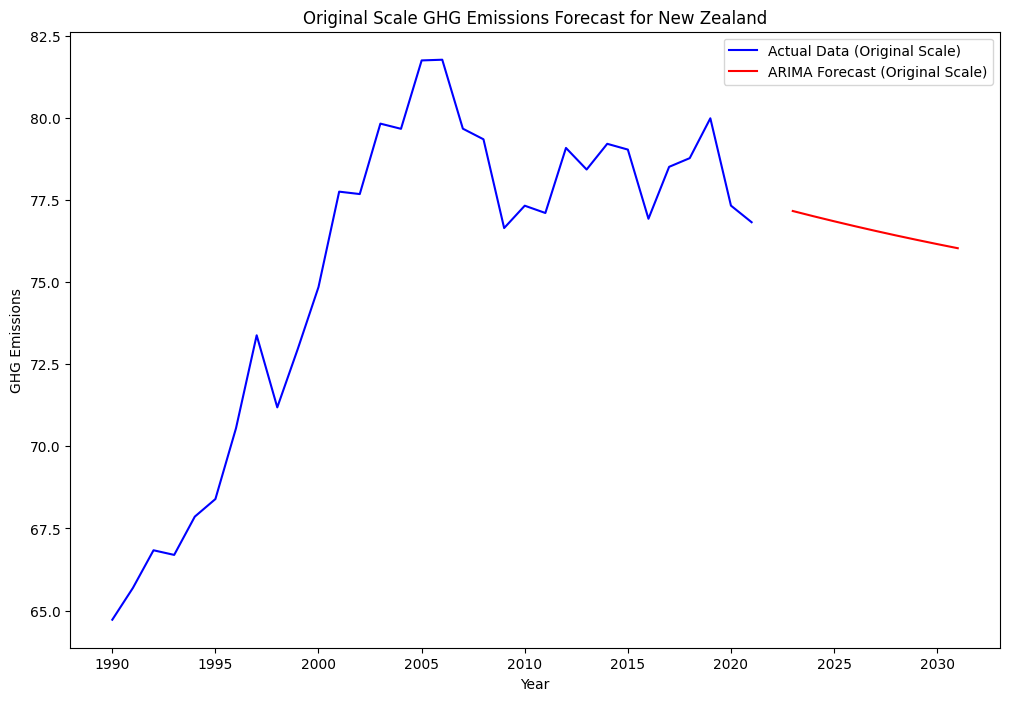


Processing data for Norway


/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-packages/statsmo

Best parameters for Norway: (2, 2, 0)
MSE for Norway: 0.0002471763475285889
RMSE for Norway: 0.015721843006740302
MAE for Norway: 0.01413218988530307
Forecast for Norway in log scale:
[3.88223306 3.85400065 3.82375479 3.80333215 3.77705082 3.74920174
 3.7259158  3.70027965 3.67364911]


/var/folders/2q/pcf5d9l92q7d6gyfpsp7zw5m0000gn/T/ipykernel_68260/722636568.py:3: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_dates = pd.date_range(start=data.index[-1] + pd.DateOffset(years=1), periods=steps, freq='A')


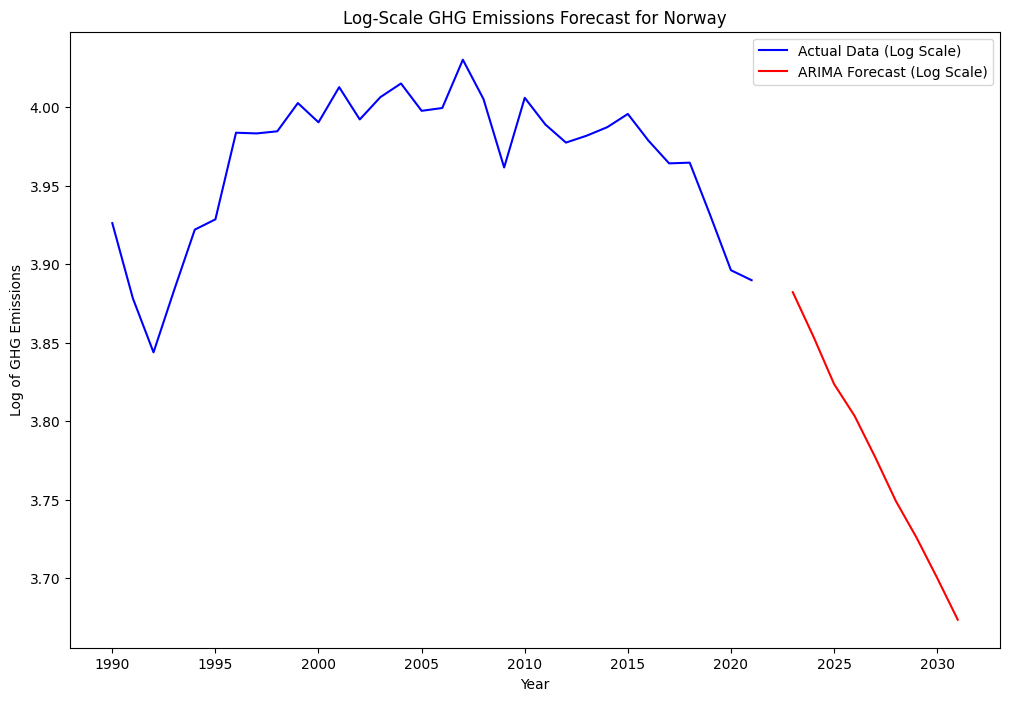

Forecast for Norway in original scale:
[48.53246990137931, 47.1814424419838, 45.775764399169304, 44.8503838824235, 43.687010697964695, 42.487152857609416, 41.5092296316804, 40.458616851364404, 39.3954019503395]


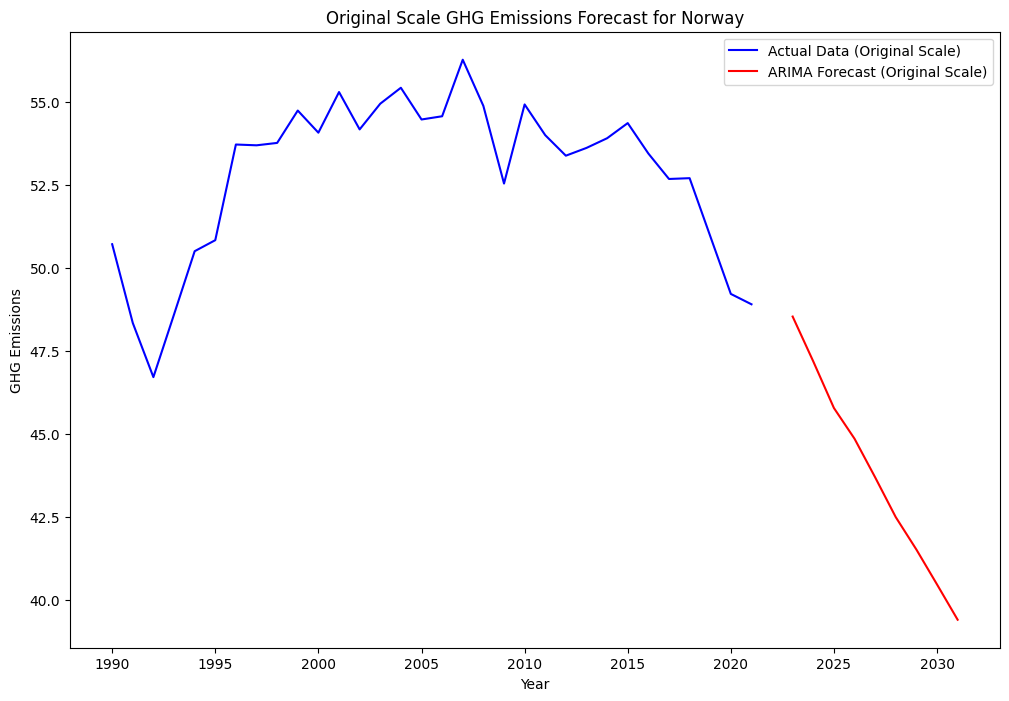


Processing data for Poland


/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-package

Best parameters for Poland: (0, 0, 1)
MSE for Poland: 0.0012554986524359855
RMSE for Poland: 0.03543301641740349
MAE for Poland: 0.028448708505991047
Forecast for Poland in log scale:
[5.97463241 6.0215317  6.0215317  6.0215317  6.0215317  6.0215317
 6.0215317  6.0215317  6.0215317 ]


/var/folders/2q/pcf5d9l92q7d6gyfpsp7zw5m0000gn/T/ipykernel_68260/722636568.py:3: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_dates = pd.date_range(start=data.index[-1] + pd.DateOffset(years=1), periods=steps, freq='A')


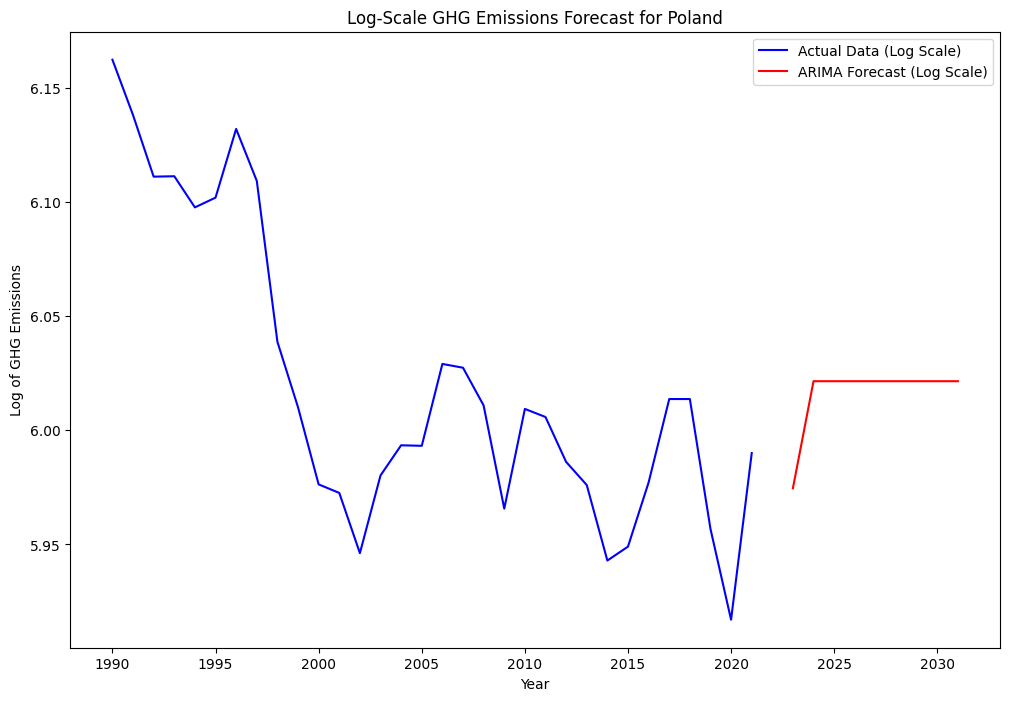

Forecast for Poland in original scale:
[393.3234942627931, 412.2094917059183, 412.2094917059183, 412.2094917059183, 412.2094917059183, 412.2094917059183, 412.2094917059183, 412.2094917059183, 412.2094917059183]


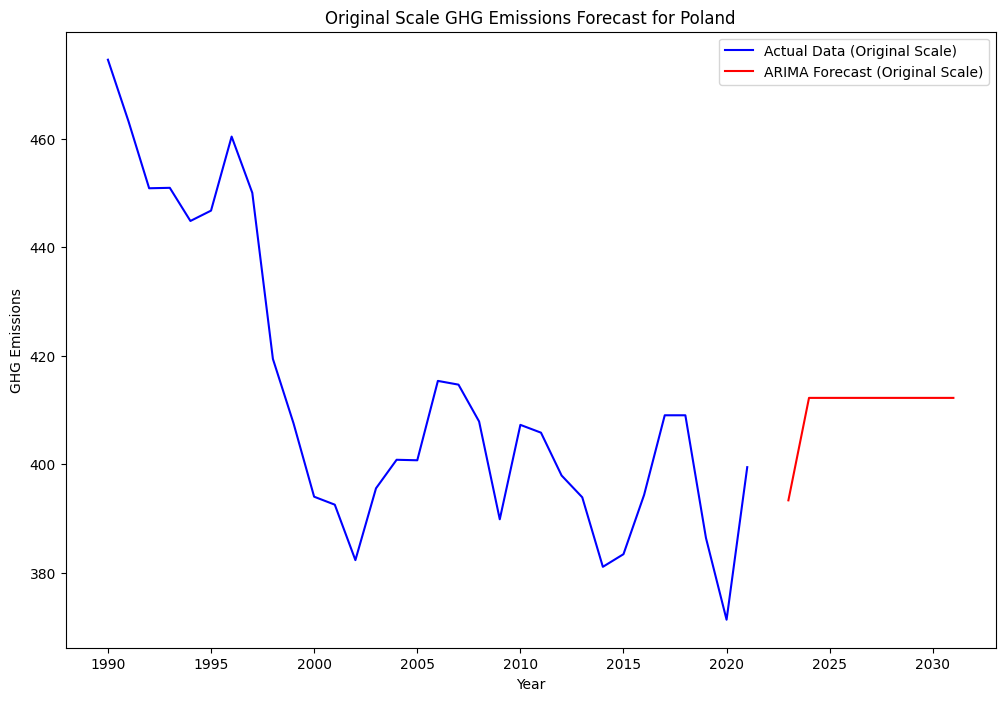


Processing data for Portugal


/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/sit

Best parameters for Portugal: (2, 1, 0)
MSE for Portugal: 0.0037751343866678044
RMSE for Portugal: 0.06144212225068243
MAE for Portugal: 0.05570878025323126
Forecast for Portugal in log scale:
[4.03553326 4.01094354 4.0021884  3.9957839  3.99305186 3.9913217
 3.99050605 3.99002799 3.98978976]


/var/folders/2q/pcf5d9l92q7d6gyfpsp7zw5m0000gn/T/ipykernel_68260/722636568.py:3: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_dates = pd.date_range(start=data.index[-1] + pd.DateOffset(years=1), periods=steps, freq='A')


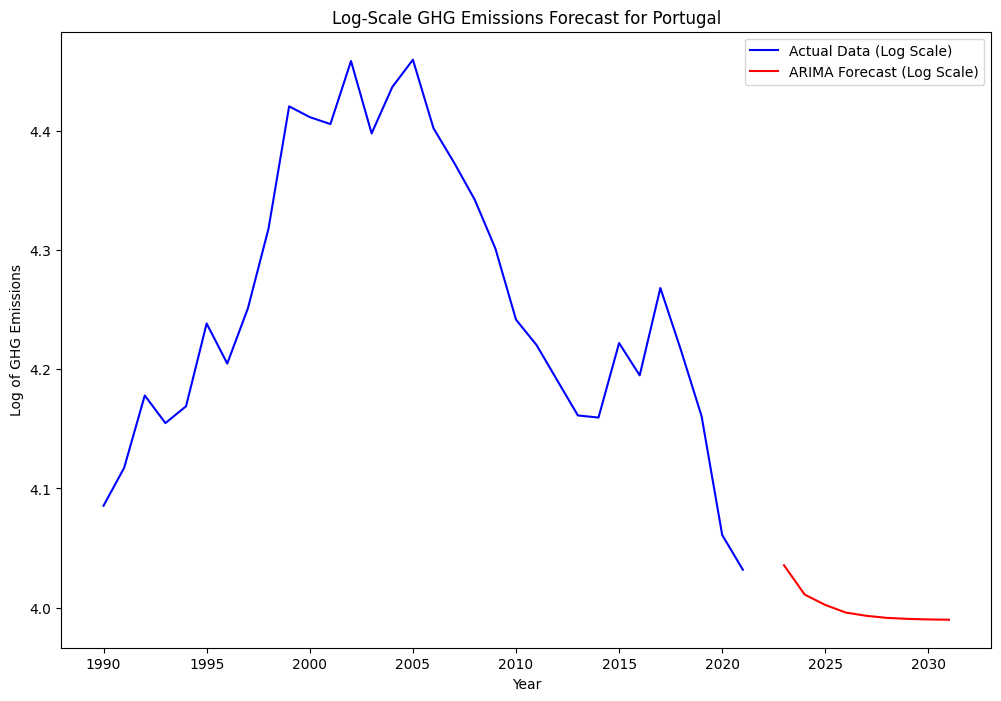

Forecast for Portugal in original scale:
[56.573080376258034, 55.19892823364303, 54.71776344219129, 54.36844312065892, 54.220109230292145, 54.12638109328616, 54.08225074356106, 54.05640237200198, 54.04352624380729]


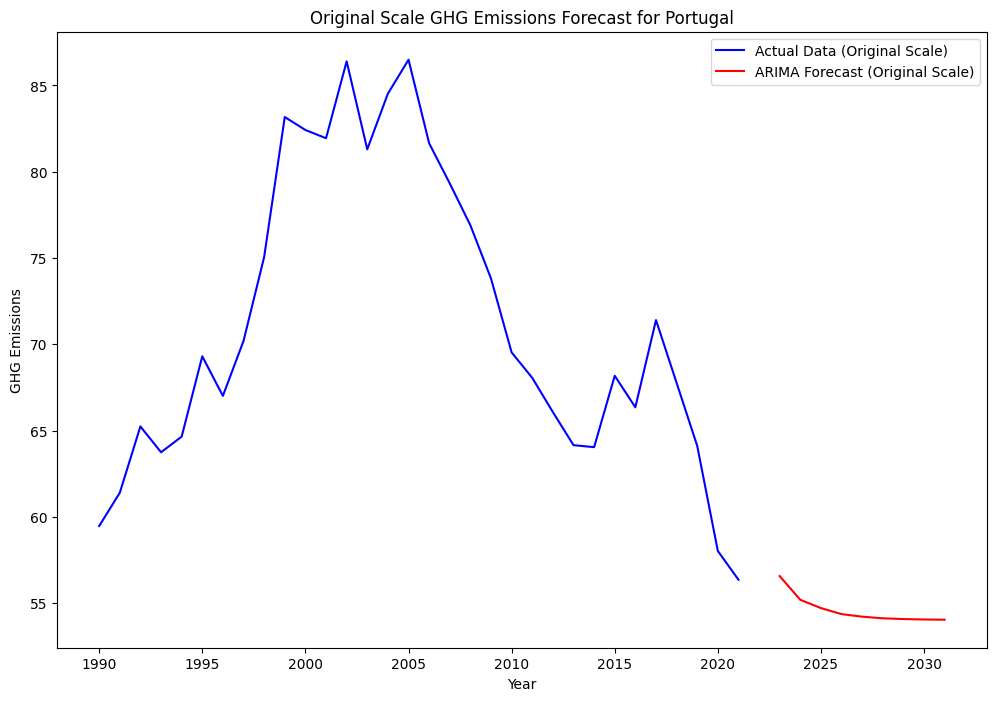

/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'



Processing data for Romania


/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-package

Best parameters for Romania: (0, 1, 0)
MSE for Romania: 0.0005549141697676246
RMSE for Romania: 0.023556616263114373
MAE for Romania: 0.021466517089827292
Forecast for Romania in log scale:
[4.71882059 4.71882059 4.71882059 4.71882059 4.71882059 4.71882059
 4.71882059 4.71882059 4.71882059]


/var/folders/2q/pcf5d9l92q7d6gyfpsp7zw5m0000gn/T/ipykernel_68260/722636568.py:3: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_dates = pd.date_range(start=data.index[-1] + pd.DateOffset(years=1), periods=steps, freq='A')


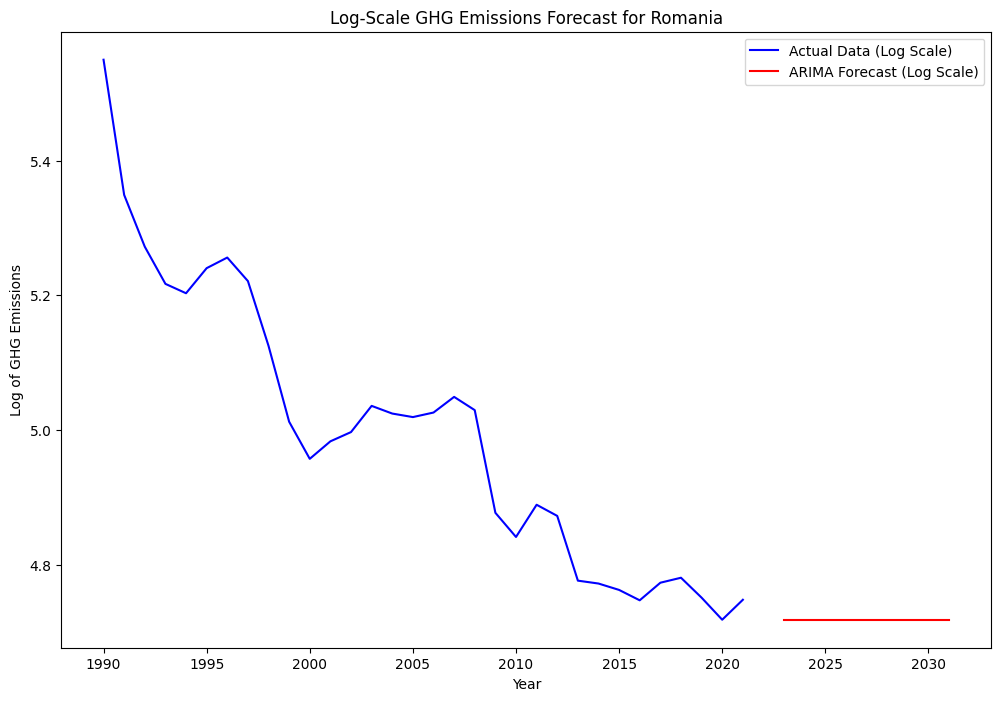

Forecast for Romania in original scale:
[112.0360386510363, 112.0360386510363, 112.0360386510363, 112.0360386510363, 112.0360386510363, 112.0360386510363, 112.0360386510363, 112.0360386510363, 112.0360386510363]


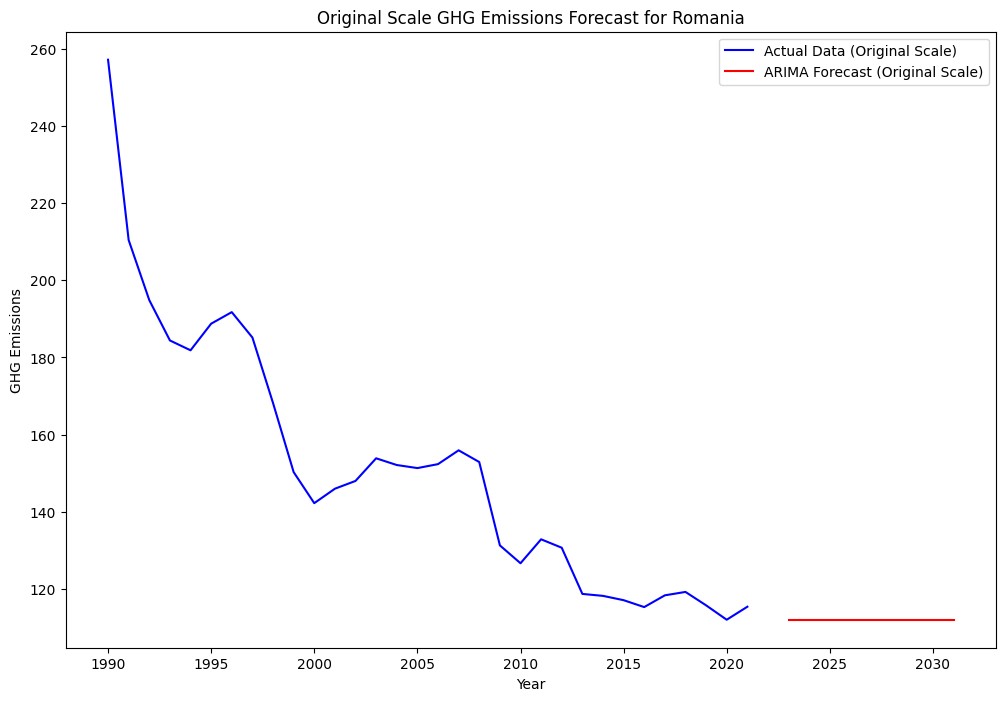

/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



Processing data for Russian Federation


/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-packages/statsmo

Best parameters for Russian Federation: (0, 0, 0)
MSE for Russian Federation: 0.0005702502914085261
RMSE for Russian Federation: 0.02387991397406042
MAE for Russian Federation: 0.022137088621653995
Forecast for Russian Federation in log scale:
[7.64611792 7.64611792 7.64611792 7.64611792 7.64611792 7.64611792
 7.64611792 7.64611792 7.64611792]


/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/2q/pcf5d9l92q7d6gyfpsp7zw5m0000gn/T/ipykernel_68260/722636568.py:3: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_dates = pd.date_range(start=data.index[-1] + pd.DateOffset(years=1), periods=steps, freq='A')


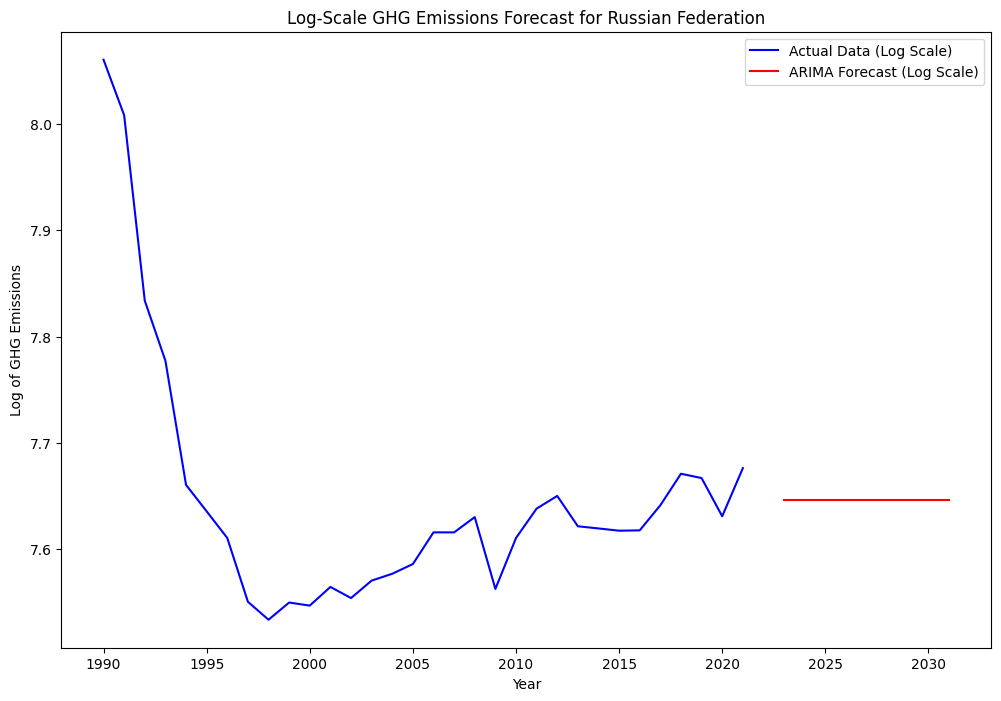

Forecast for Russian Federation in original scale:
[2092.5065166271347, 2092.5065166271347, 2092.5065166271347, 2092.5065166271347, 2092.5065166271347, 2092.5065166271347, 2092.5065166271347, 2092.5065166271347, 2092.5065166271347]


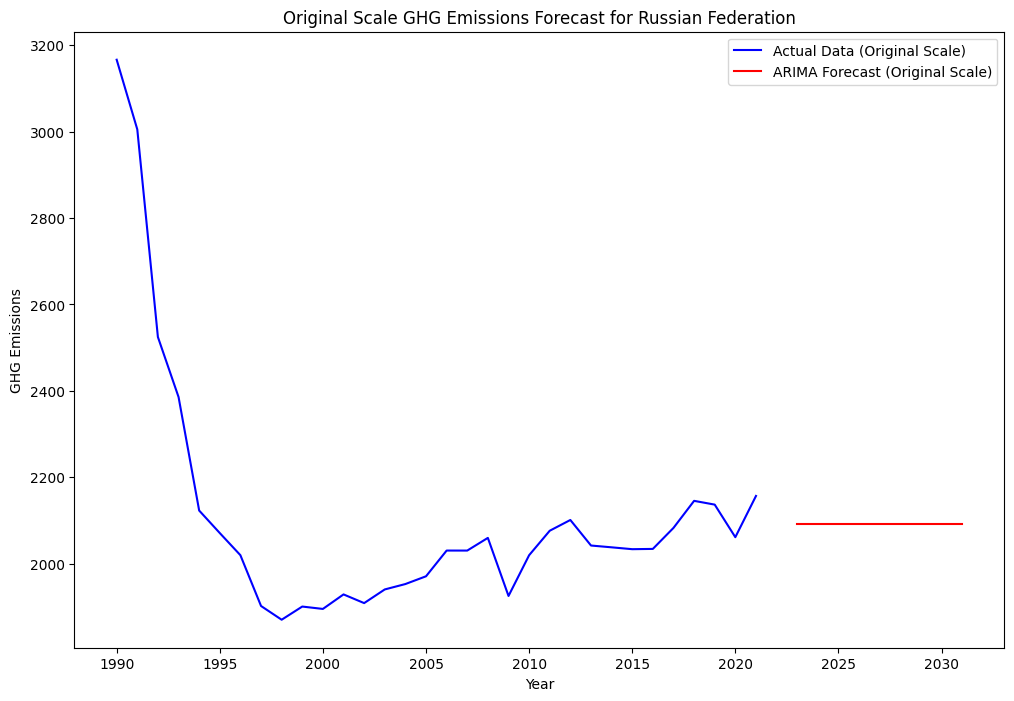


Processing data for Slovakia


/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/sit

Best parameters for Slovakia: (1, 0, 0)
MSE for Slovakia: 0.002859875725964773
RMSE for Slovakia: 0.053477805919509944
MAE for Slovakia: 0.04070707632007885
Forecast for Slovakia in log scale:
[3.6197711  3.62351565 3.6272173  3.63087656 3.6344939  3.6380698
 3.64160474 3.64509919 3.64855362]


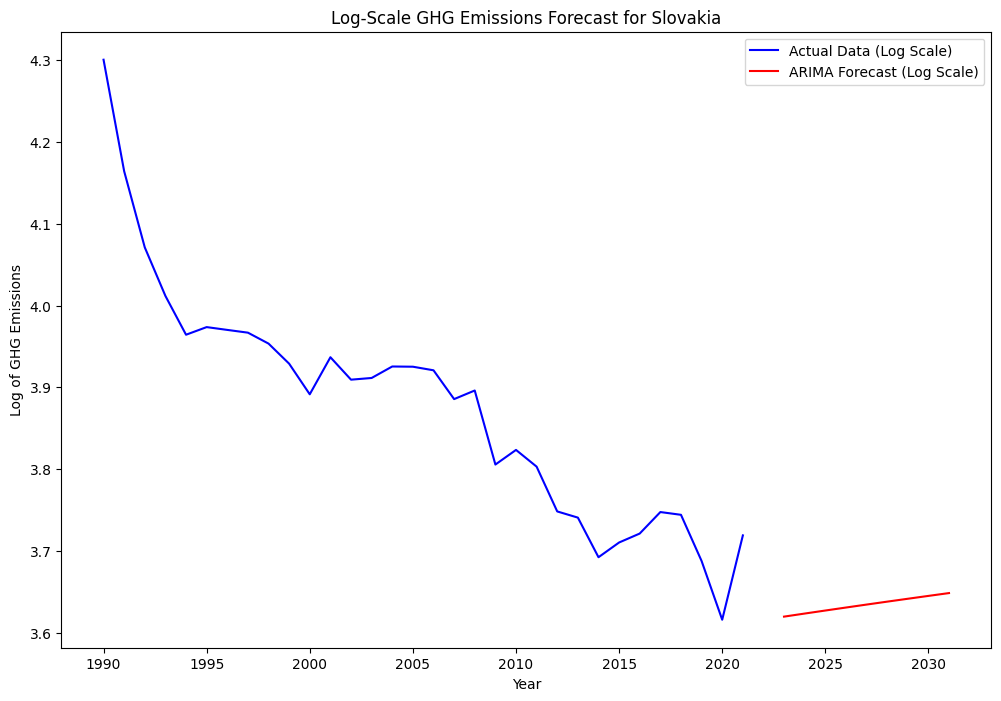

Forecast for Slovakia in original scale:
[37.32902209771078, 37.46906451600797, 37.6080191607764, 37.74588860141366, 37.882675546270214, 38.01838283887872, 38.15301345423106, 38.2865704951037, 38.419057188431594]


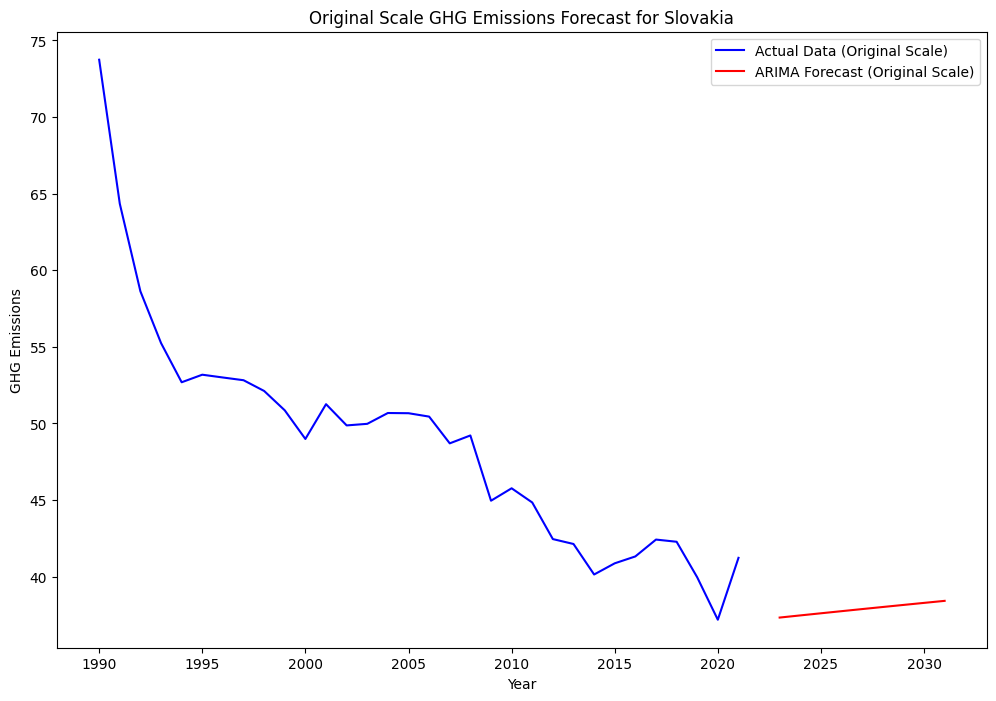


Processing data for Spain


/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Applications/anaconda3/lib/python3.11/sit

Best parameters for Spain: (1, 0, 0)
MSE for Spain: 0.00398506234530877
RMSE for Spain: 0.06312735021612083
MAE for Spain: 0.052838933530465634
Forecast for Spain in log scale:
[5.61370363 5.62032866 5.6265956  5.63252381 5.6381316  5.64343628
 5.64845425 5.65320099 5.65769116]


/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/2q/pcf5d9l92q7d6gyfpsp7zw5m0000gn/T/ipykernel_68260/722636568.py:3: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_dates = pd.date_range(start=data.index[-1] + pd.DateOffset(years=1), periods=steps, freq='A')


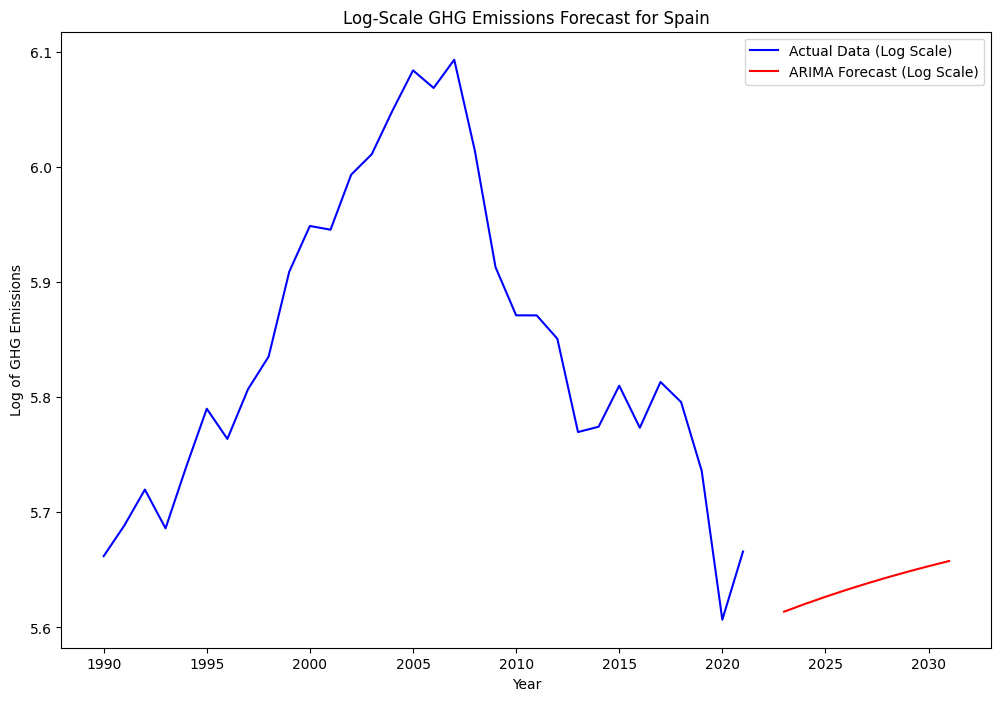

Forecast for Spain in original scale:
[274.1577385207692, 275.98007127003876, 277.7150533722482, 279.36629646845626, 280.9373243945758, 282.4315679969654, 283.85236107512105, 285.20293732946095, 286.486428201362]


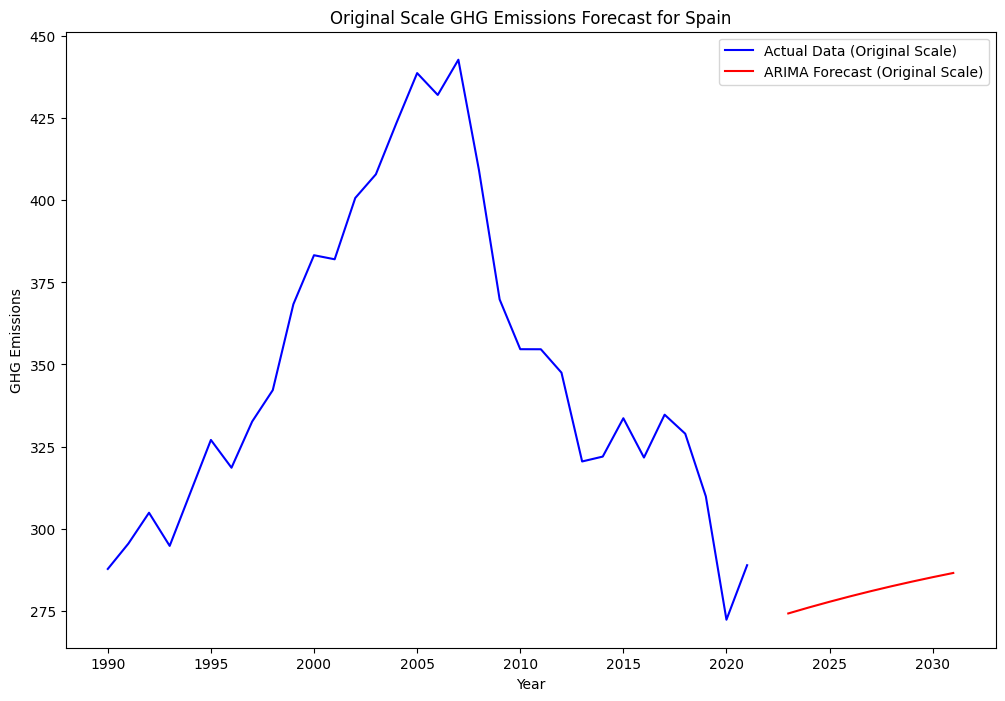


Processing data for Sweden


/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Applications/an

Best parameters for Sweden: (1, 2, 2)


/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MSE for Sweden: 0.0009700993993841885
RMSE for Sweden: 0.031146418724858054
MAE for Sweden: 0.02771575215860616
Forecast for Sweden in log scale:
[3.83135258 3.81688478 3.79688234 3.77443655 3.75091211 3.72691148
 3.70270063 3.67839698 3.65405236]


/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/2q/pcf5d9l92q7d6gyfpsp7zw5m0000gn/T/ipykernel_68260/722636568.py:3: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_dates = pd.date_range(start=data.index[-1] + pd.DateOffset(years=1), periods=steps, freq='A')


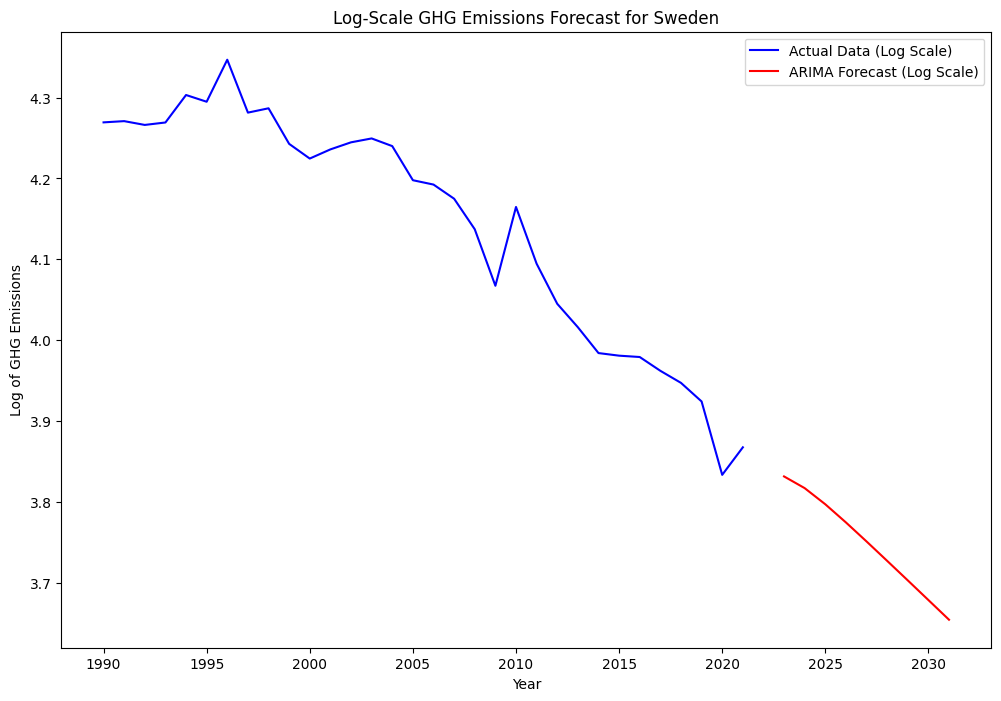

Forecast for Sweden in original scale:
[46.12488377549124, 45.46236228496792, 44.562038467966495, 43.57295032340293, 42.55988363143493, 41.550580063300835, 40.55668530847119, 39.58289098107906, 38.63089539298344]


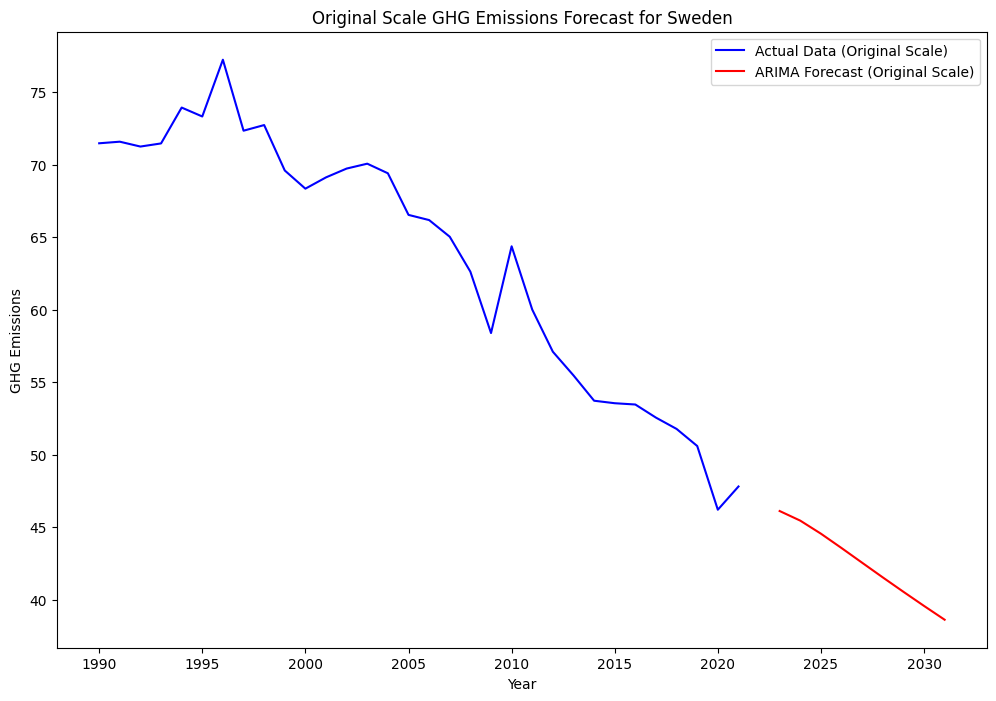


Processing data for Switzerland


/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-package

Best parameters for Switzerland: (0, 2, 2)
MSE for Switzerland: 0.00035868791047458933
RMSE for Switzerland: 0.01893905780324326
MAE for Switzerland: 0.016380865890213085
Forecast for Switzerland in log scale:
[3.7855267  3.76094146 3.73635622 3.71177098 3.68718574 3.66260049
 3.63801525 3.61343001 3.58884477]


/var/folders/2q/pcf5d9l92q7d6gyfpsp7zw5m0000gn/T/ipykernel_68260/722636568.py:3: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_dates = pd.date_range(start=data.index[-1] + pd.DateOffset(years=1), periods=steps, freq='A')


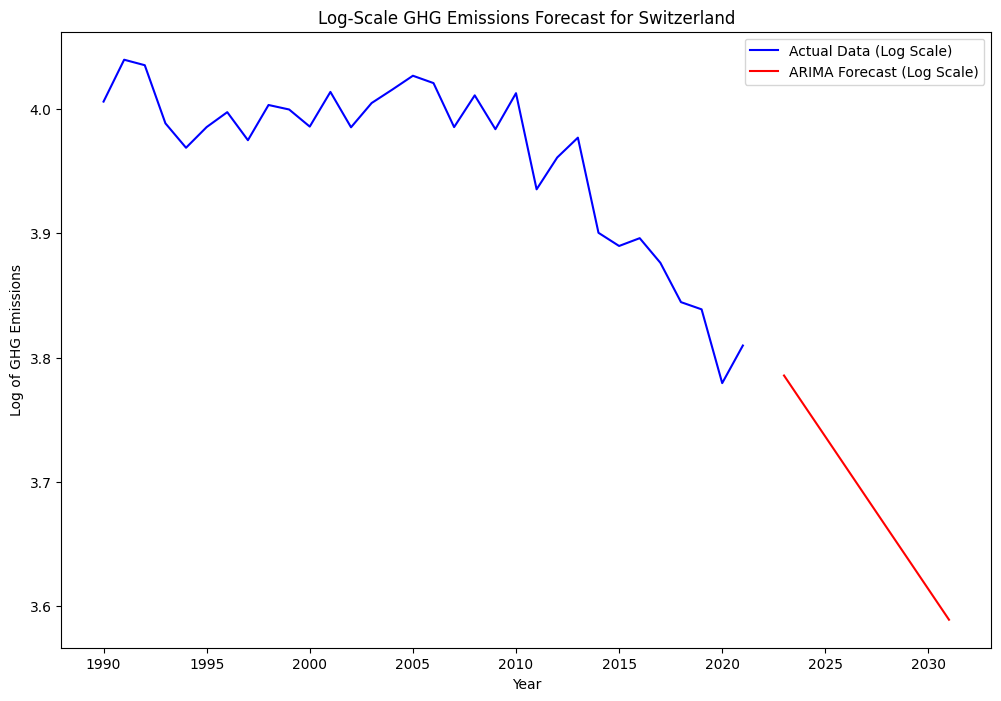

Forecast for Switzerland in original scale:
[44.058870343079924, 42.98887926795764, 41.9448734460188, 40.92622181276324, 39.932308629398804, 38.962533110649126, 38.0163090616002, 37.09306452336633, 36.19224142736132]


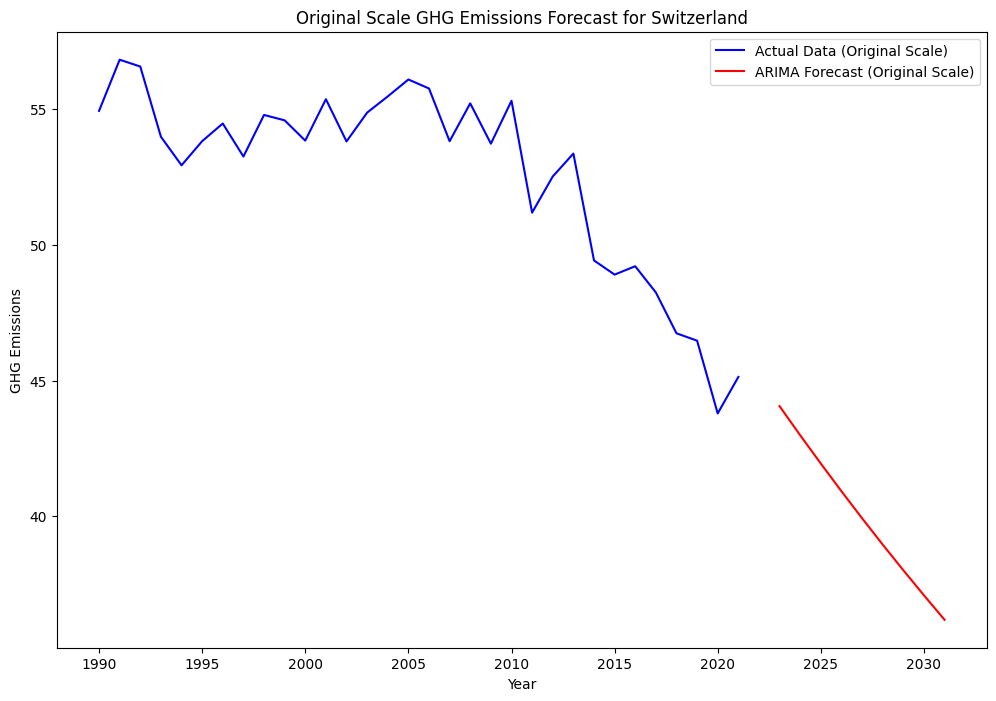


Processing data for Türkiye


/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/sit

Best parameters for Türkiye: (1, 2, 2)


/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/2q/pcf5d9l92q7d6gyfpsp7zw5m0000gn/T/ipykernel_68260/722636568.py:3: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_dates = pd.date_range(start=data.index[-1] + pd.DateOffset(years=1), periods=steps, freq='A')


MSE for Türkiye: 0.001040604710269498
RMSE for Türkiye: 0.032258405265442026
MAE for Türkiye: 0.02646793402518899
Forecast for Türkiye in log scale:
[6.29147997 6.31989993 6.34953208 6.37823767 6.40765149 6.43652396
 6.46581023 6.49478019 6.52399193]


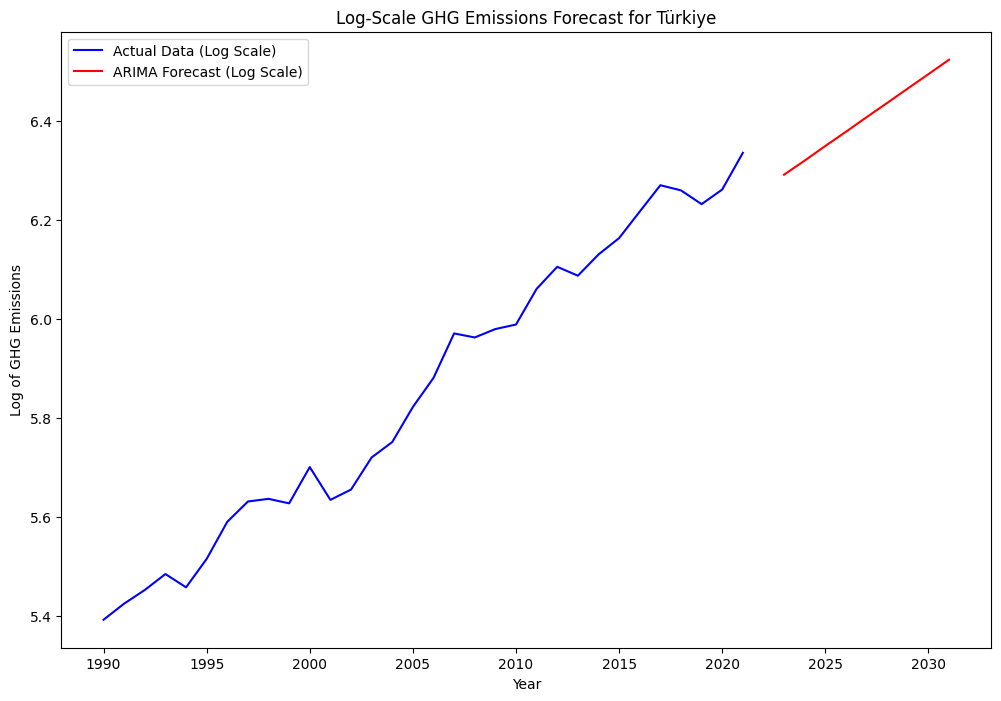

Forecast for Türkiye in original scale:
[539.95184806976, 555.5174013348441, 572.2248911903565, 588.8889738725745, 606.4677140604915, 624.2331633821533, 642.7849544695482, 661.6787680981062, 681.2926399126661]


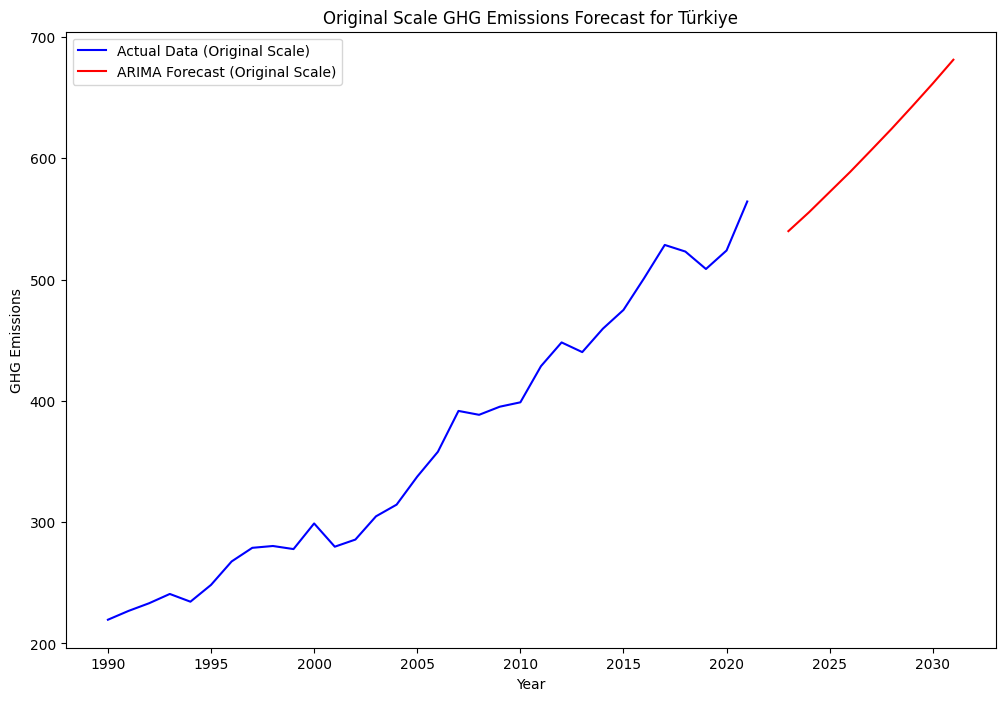


Processing data for Ukraine


/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-package

Best parameters for Ukraine: (0, 1, 0)
MSE for Ukraine: 0.003919861096651152
RMSE for Ukraine: 0.06260879408398753
MAE for Ukraine: 0.05317079465155329
Forecast for Ukraine in log scale:
[5.76216128 5.76216128 5.76216128 5.76216128 5.76216128 5.76216128
 5.76216128 5.76216128 5.76216128]


/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/2q/pcf5d9l92q7d6gyfpsp7zw5m0000gn/T/ipykernel_68260/722636568.py:3: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_dates = pd.date_range(start=data.index[-1] + pd.DateOffset(years=1), periods=steps, freq='A')


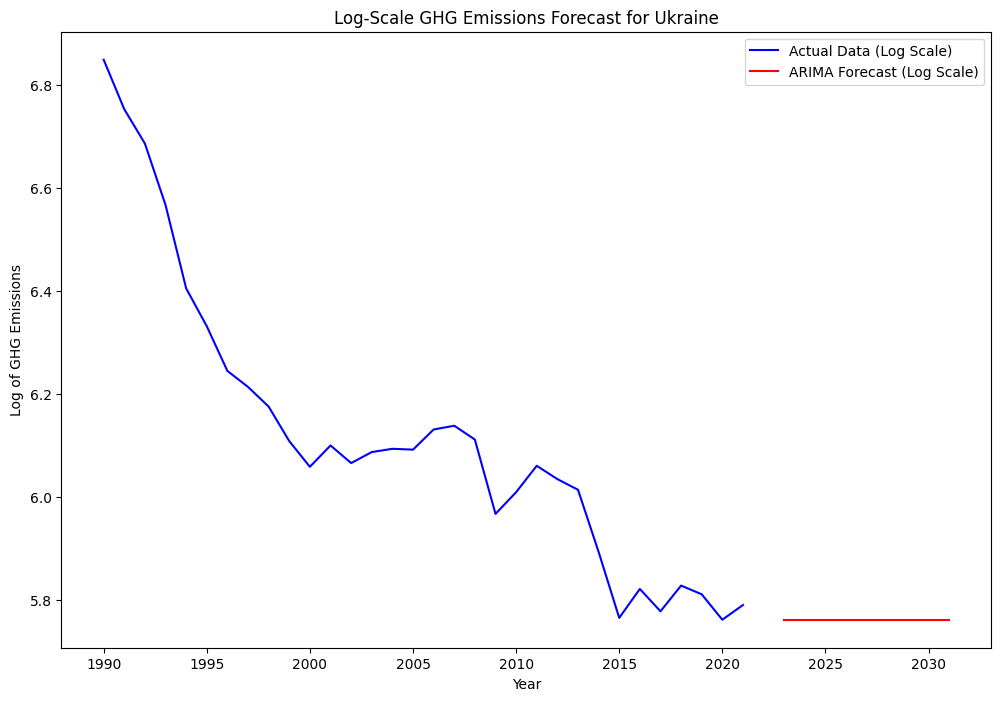

Forecast for Ukraine in original scale:
[318.0349478084772, 318.0349478084772, 318.0349478084772, 318.0349478084772, 318.0349478084772, 318.0349478084772, 318.0349478084772, 318.0349478084772, 318.0349478084772]


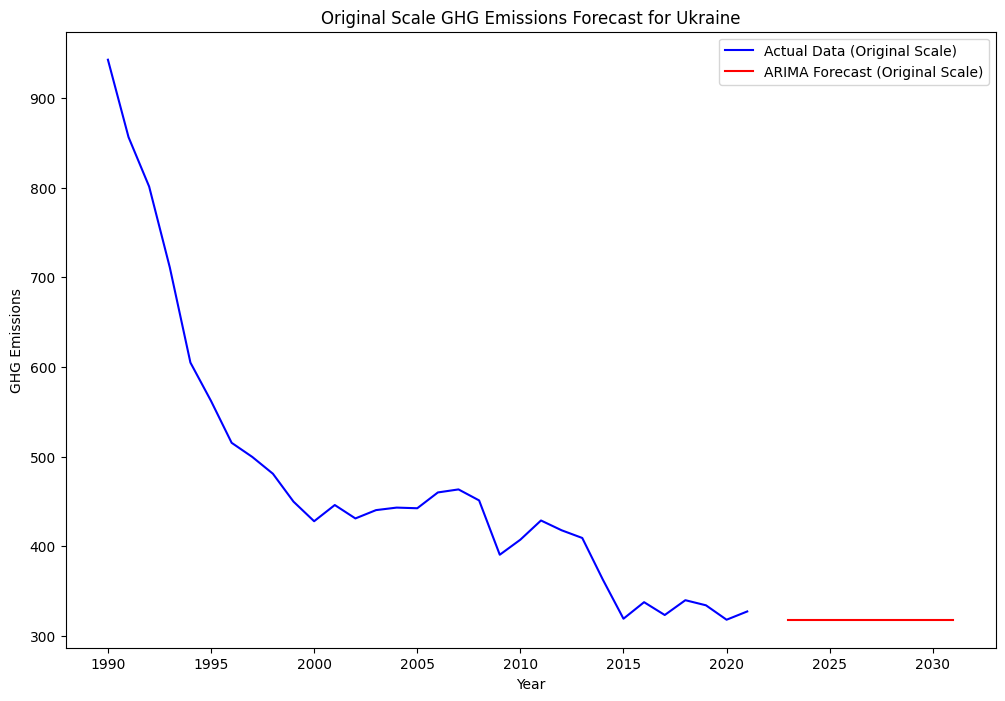

/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



Processing data for United Kingdom of Great Britain and Northern Ireland


/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Applications/anaconda3/lib/python3.11/sit

Best parameters for United Kingdom of Great Britain and Northern Ireland: (0, 2, 2)
MSE for United Kingdom of Great Britain and Northern Ireland: 0.001430701502903463
RMSE for United Kingdom of Great Britain and Northern Ireland: 0.03782461503972596
MAE for United Kingdom of Great Britain and Northern Ireland: 0.030078124244028132
Forecast for United Kingdom of Great Britain and Northern Ireland in log scale:
[6.0010283  5.95767672 5.91432515 5.87097357 5.827622   5.78427043
 5.74091885 5.69756728 5.6542157 ]


/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/var/folders/2q/pcf5d9l92q7d6gyfpsp7zw5m0000gn/T/ipykernel_68260/722636568.py:3: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_dates = pd.date_range(start=data.index[-1] + pd.DateOffset(years=1), periods=steps, freq='A')


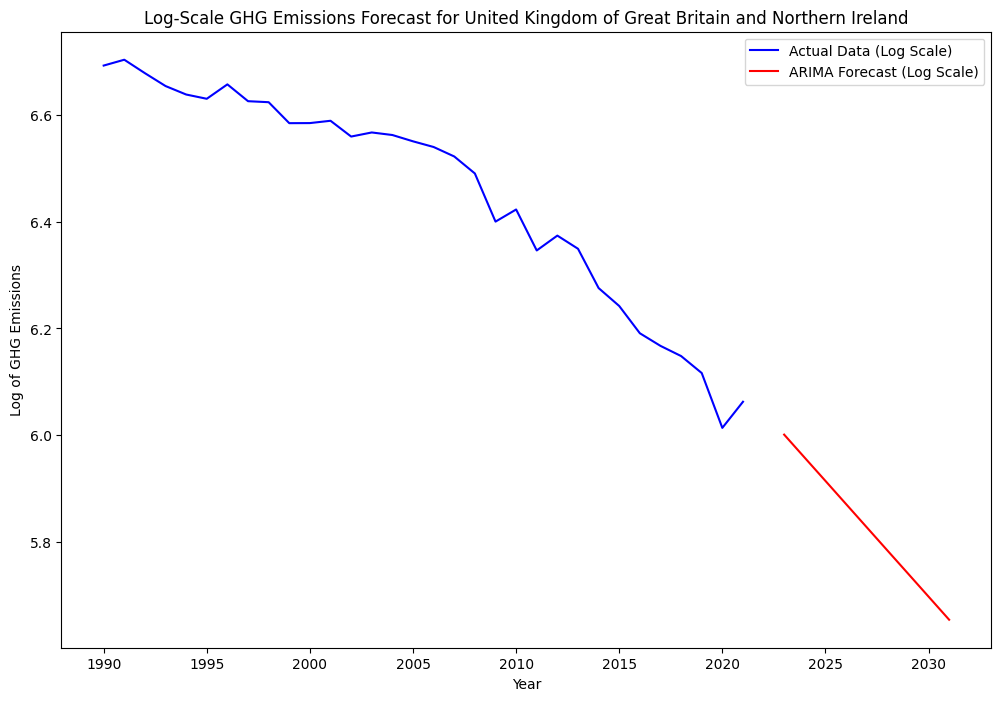

Forecast for United Kingdom of Great Britain and Northern Ireland in original scale:
[403.8438508243783, 386.7106432572199, 370.30431762955396, 354.59403573715696, 339.55026769671423, 325.1447364398772, 311.3503645621783, 298.14122342689814, 285.49248442821767]


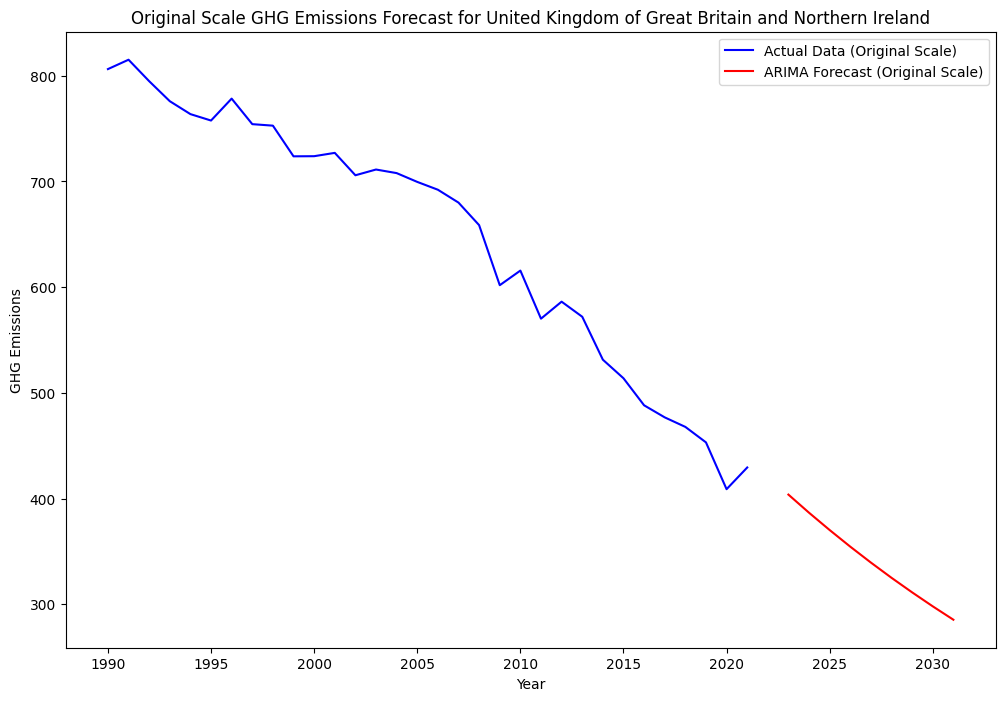


Processing data for United States of America


/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Applications/anaconda3/lib/python3.11/site-packages/statsmo

Best parameters for United States of America: (2, 2, 1)
MSE for United States of America: 0.0016602995748843052
RMSE for United States of America: 0.040746773797250564
MAE for United States of America: 0.030973098434670172
Forecast for United States of America in log scale:
[8.70742647 8.72830808 8.68274416 8.64599247 8.64850281 8.63381385
 8.59948236 8.58181658 8.57158682]


/var/folders/2q/pcf5d9l92q7d6gyfpsp7zw5m0000gn/T/ipykernel_68260/722636568.py:3: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_dates = pd.date_range(start=data.index[-1] + pd.DateOffset(years=1), periods=steps, freq='A')


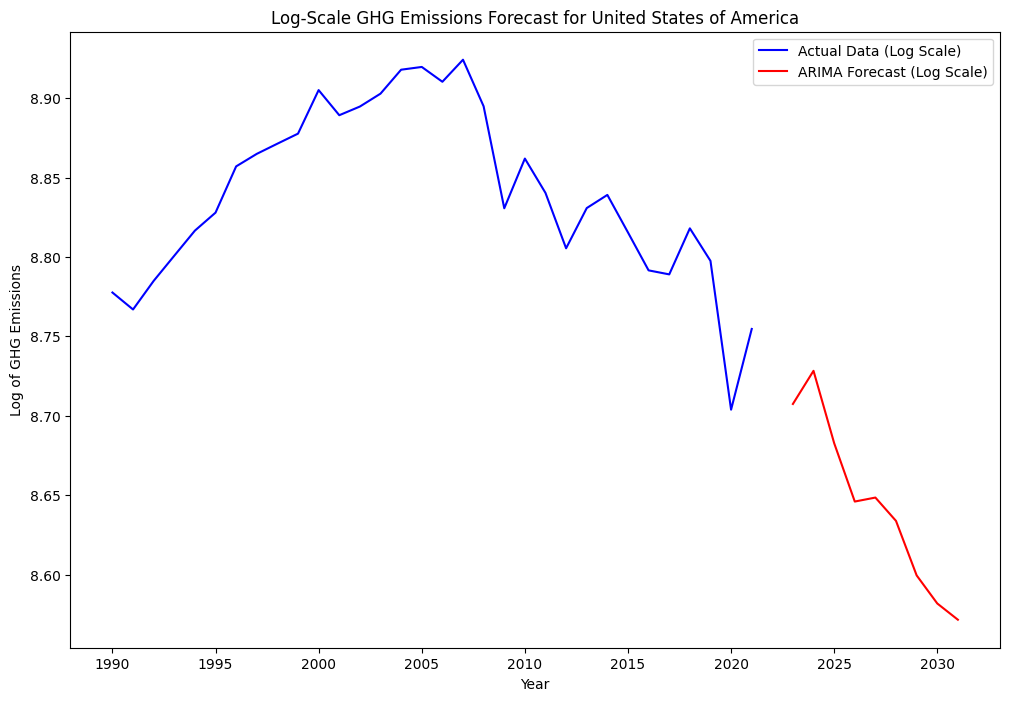

Forecast for United States of America in original scale:
[6047.658643170702, 6175.271201043168, 5900.21553303347, 5687.308928192199, 5701.603980473607, 5618.465446025955, 5428.848697715796, 5333.785957576996, 5279.500754813981]


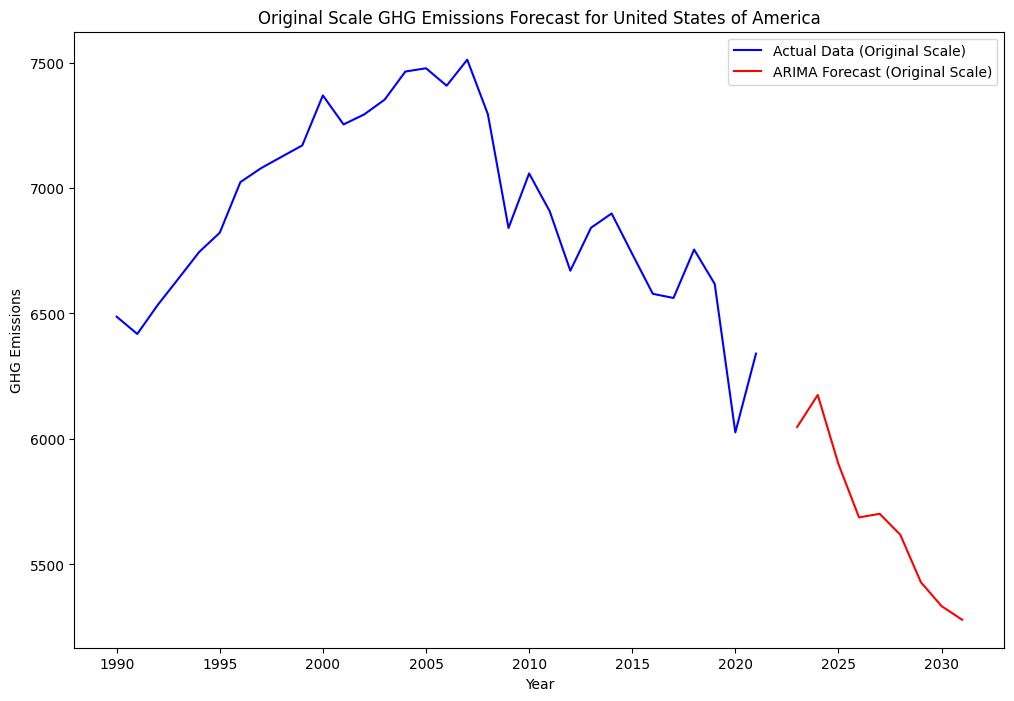

In [7]:
for country in emissions_log['Country'].unique():
    print(f"\nProcessing data for {country}")
    country_data = select_country(emissions_log, country, target)
    
    best_params = find_best_params(country_data)
    print(f"Best parameters for {country}: {best_params}")
    
    model, predictions, mse, rmse, mae = evaluate_arima_model(country_data, best_params)
    print(f"MSE for {country}: {mse}")
    print(f"RMSE for {country}: {rmse}")
    print(f"MAE for {country}: {mae}")
    
    forecast, forecast_dates = forecast_arima(model, country_data, n_out)
    
    print(f"Forecast for {country} in log scale:")
    print(forecast)
    
    plt.figure(figsize=(12, 8))
    plt.plot(country_data.index, country_data[target], label='Actual Data (Log Scale)', color='blue')
    plt.plot(forecast_dates, forecast, label='ARIMA Forecast (Log Scale)', color='red')
    plt.xlabel('Year')
    plt.ylabel('Log of GHG Emissions')
    plt.legend()
    plt.title(f'Log-Scale GHG Emissions Forecast for {country}')
    plt.show()
    
    forecast_exp = [exp(f) for f in forecast]
    
    print(f"Forecast for {country} in original scale:")
    print(forecast_exp)
    
    plt.figure(figsize=(12, 8))
    plt.plot(country_data.index, country_data[target].apply(exp), label='Actual Data (Original Scale)', color='blue')
    plt.plot(forecast_dates, forecast_exp, label='ARIMA Forecast (Original Scale)', color='red')
    plt.xlabel('Year')
    plt.ylabel('GHG Emissions')
    plt.legend()
    plt.title(f'Original Scale GHG Emissions Forecast for {country}')
    plt.show()

In [19]:
def evaluate_hw_model(data, trend, seasonal):
    train_size = int(len(data) * 0.8)
    train, test = data[:train_size], data[train_size:]
    model = ExponentialSmoothing(train, trend=trend, seasonal=seasonal, seasonal_periods=12)
    model_fit = model.fit()
    predictions = model_fit.forecast(len(test))
    mse = mean_squared_error(test, predictions)
    rmse = sqrt(mse)
    mae = mean_absolute_error(test, predictions)
    return model_fit, mse, rmse, mae

In [20]:
def forecast_hw(model, data, steps):
    forecast = model.forecast(steps=steps)
    forecast_dates = pd.date_range(start=data.index[-1] + pd.DateOffset(years=1), periods=steps, freq='A')
    return forecast, forecast_dates

/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency i

Best model for Australia: Trend=mul, Seasonal=mul
MSE for Australia: 0.0025526414133796886
RMSE for Australia: 0.050523671812128704
MAE for Australia: 0.047343776178248476


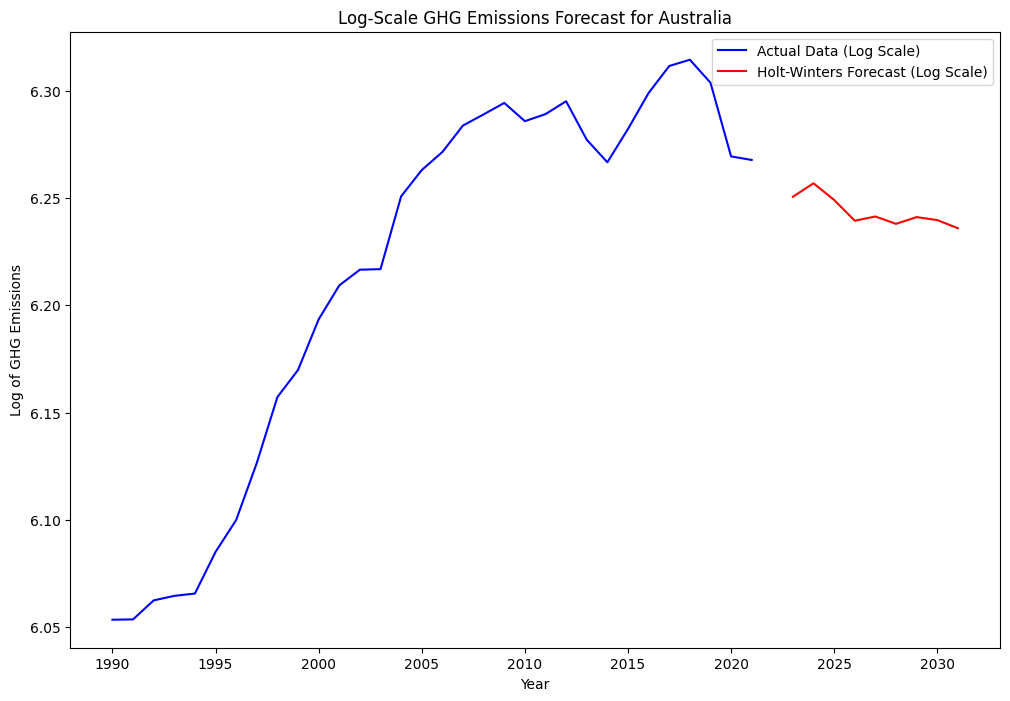

Predictions for Australia in original scale:
518.3157723036496, 521.5779080364603, 517.5326850368884, 512.5612931279912, 513.5734446184954, 511.8189922785353, 513.4293171005309, 512.7134370429886, 510.77175229557986


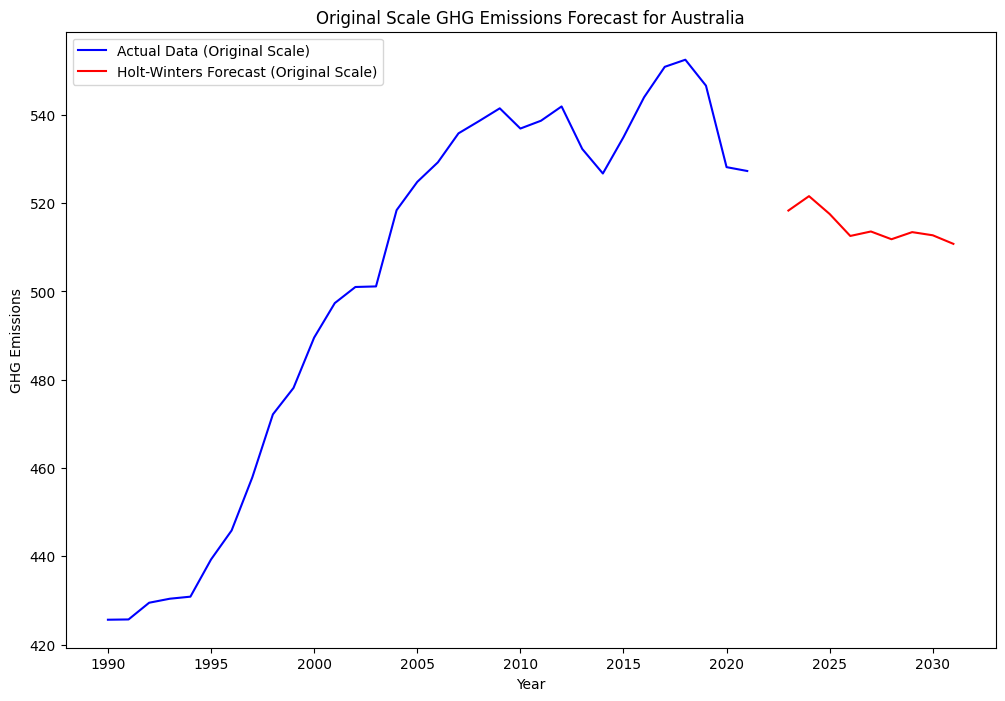

/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency i

Best model for Austria: Trend=add, Seasonal=mul
MSE for Austria: 0.0014265895176576537
RMSE for Austria: 0.0377326488129513
MAE for Austria: 0.03479222010415395


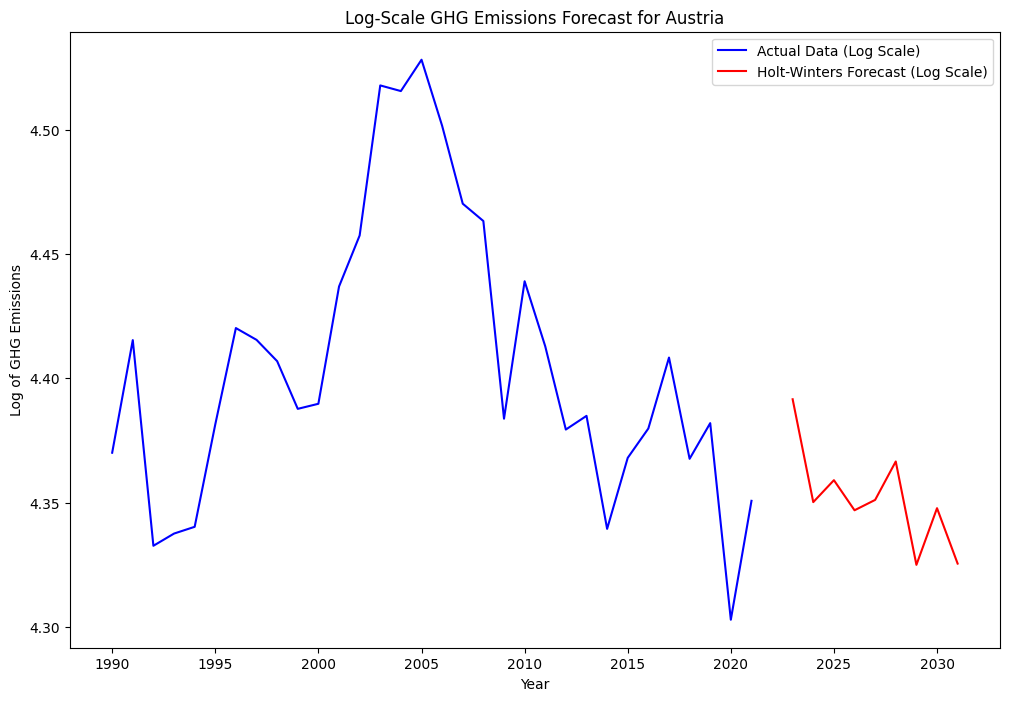

Predictions for Austria in original scale:
80.76651047031282, 77.49186371753075, 78.17935166432495, 77.23828327699519, 77.56104802232142, 78.76954063532826, 75.56063009666703, 77.30315337309663, 75.59913712291421


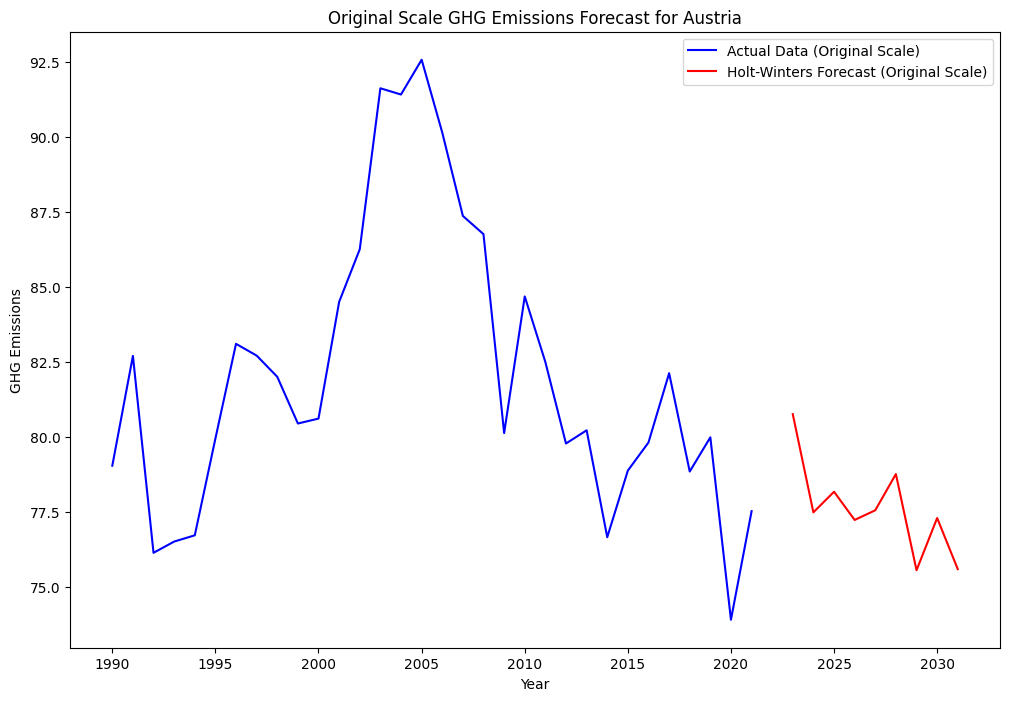

/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency i

Best model for Belgium: Trend=mul, Seasonal=mul
MSE for Belgium: 0.007675479683290397
RMSE for Belgium: 0.08760981499404275
MAE for Belgium: 0.07833831948817276


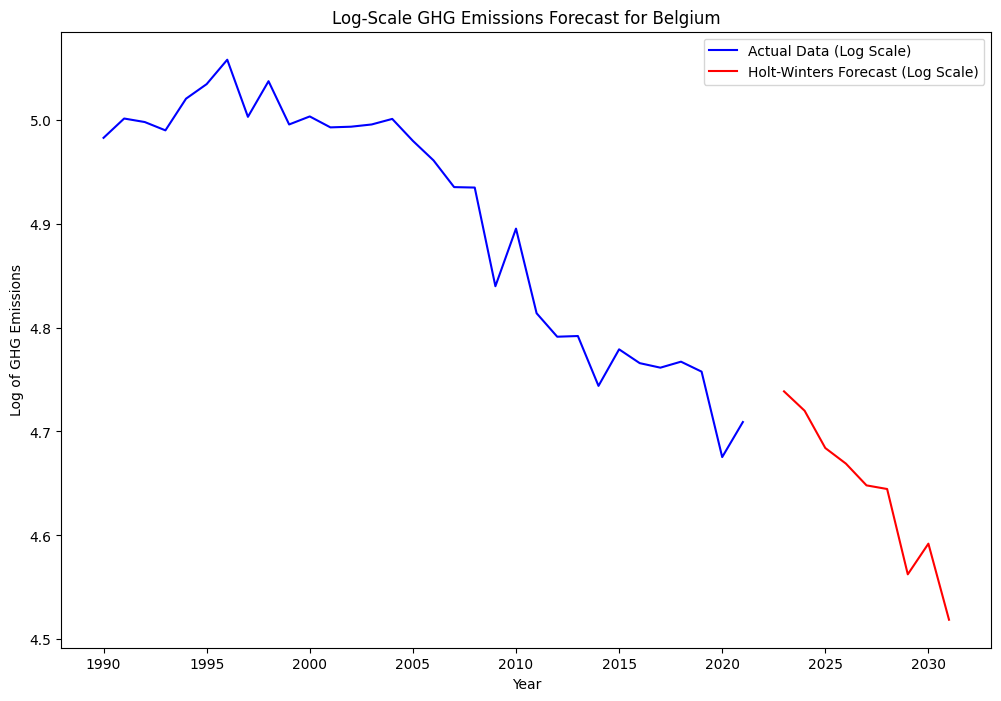

Predictions for Belgium in original scale:
114.27328109694531, 112.16110332122851, 108.2110523039504, 106.5990314254533, 104.39068309418404, 104.0271331656619, 95.82812115251015, 98.69816703446251, 91.73294359197676


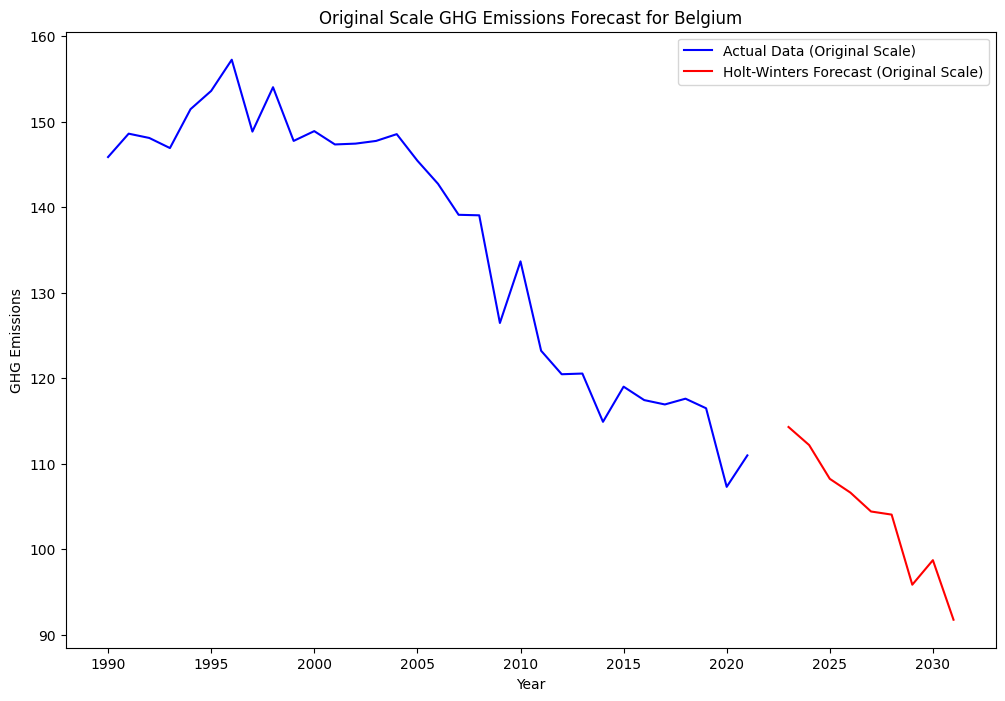

/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency i

Best model for Bulgaria: Trend=add, Seasonal=None
MSE for Bulgaria: 0.01068104710822977
RMSE for Bulgaria: 0.07006342576689441
MAE for Bulgaria: 0.06644269177163942


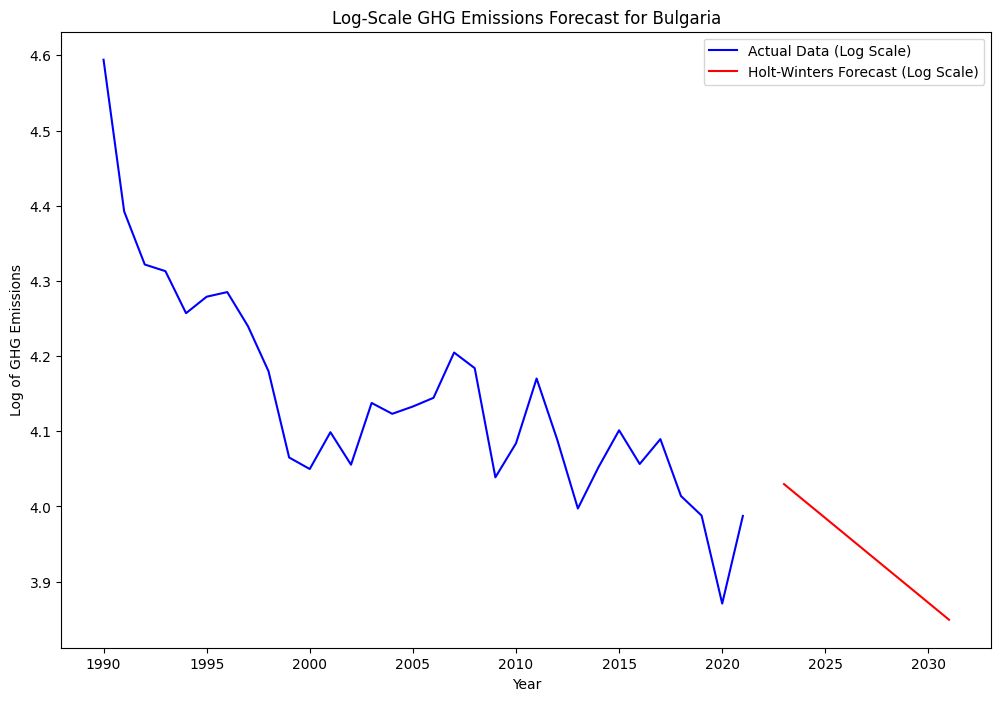

Predictions for Bulgaria in original scale:
56.24660403674037, 54.992772539396746, 53.76689105700341, 52.56833653667217, 51.39649981441269, 50.250785305525476, 49.130610701896686, 48.03540667604068, 46.96461659173995


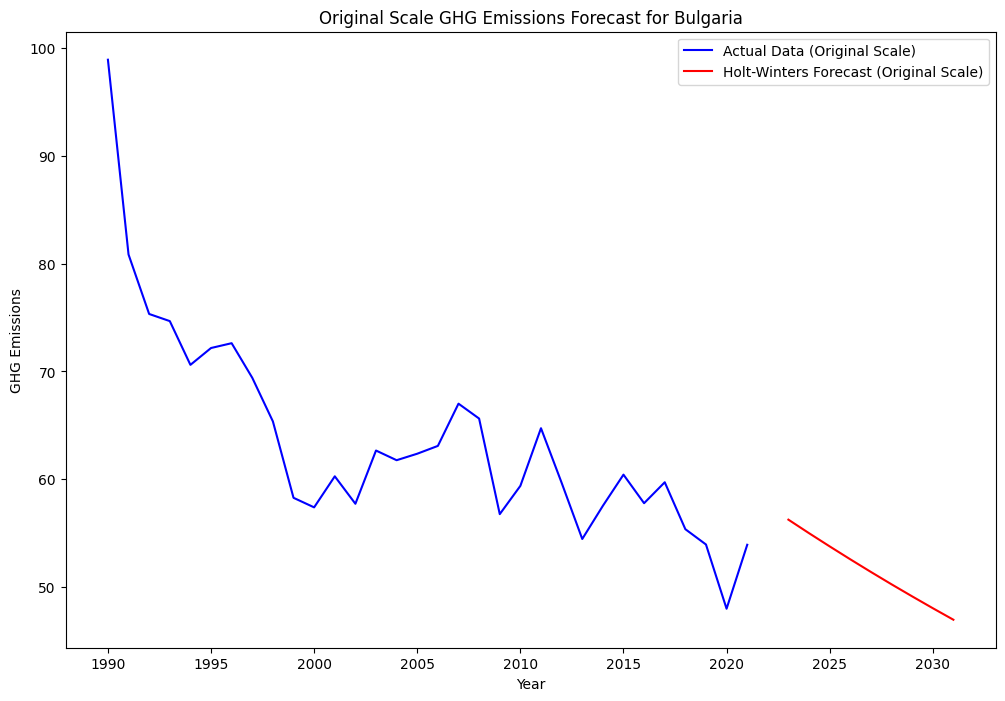

/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency i

Best model for Canada: Trend=mul, Seasonal=None
MSE for Canada: 0.006758171857982096
RMSE for Canada: 0.05971384355388155
MAE for Canada: 0.042132690334041864


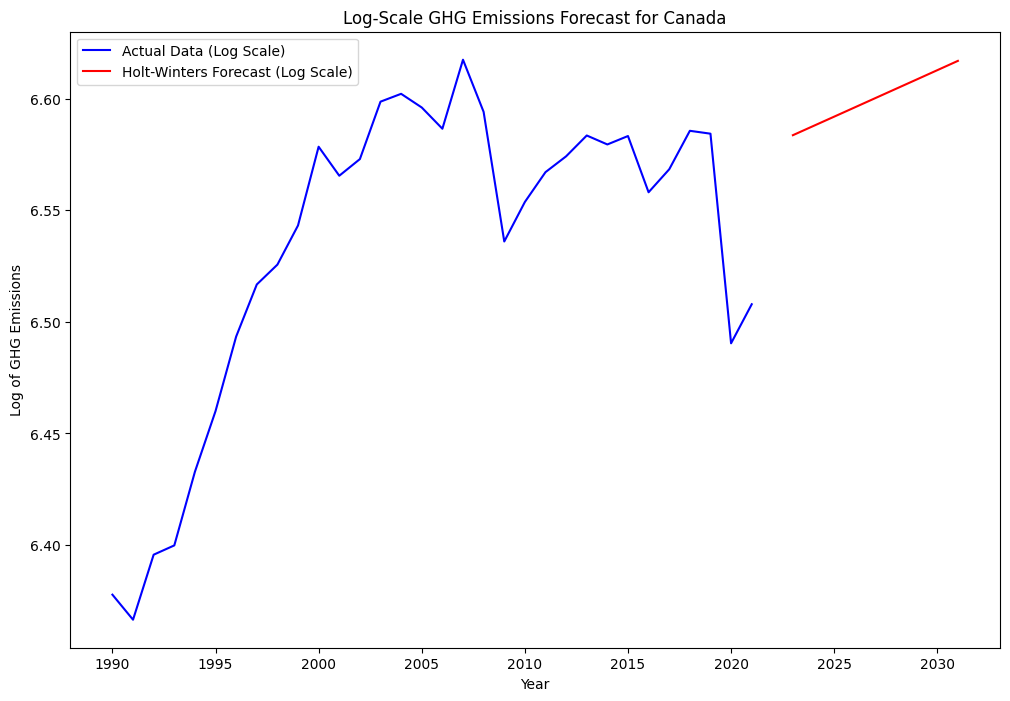

Predictions for Canada in original scale:
723.1912668372447, 726.2014381008495, 729.2260497527153, 732.2651790331374, 735.318903634504, 738.3873017041473, 741.4704518472255, 744.5684331296211, 747.681325080856


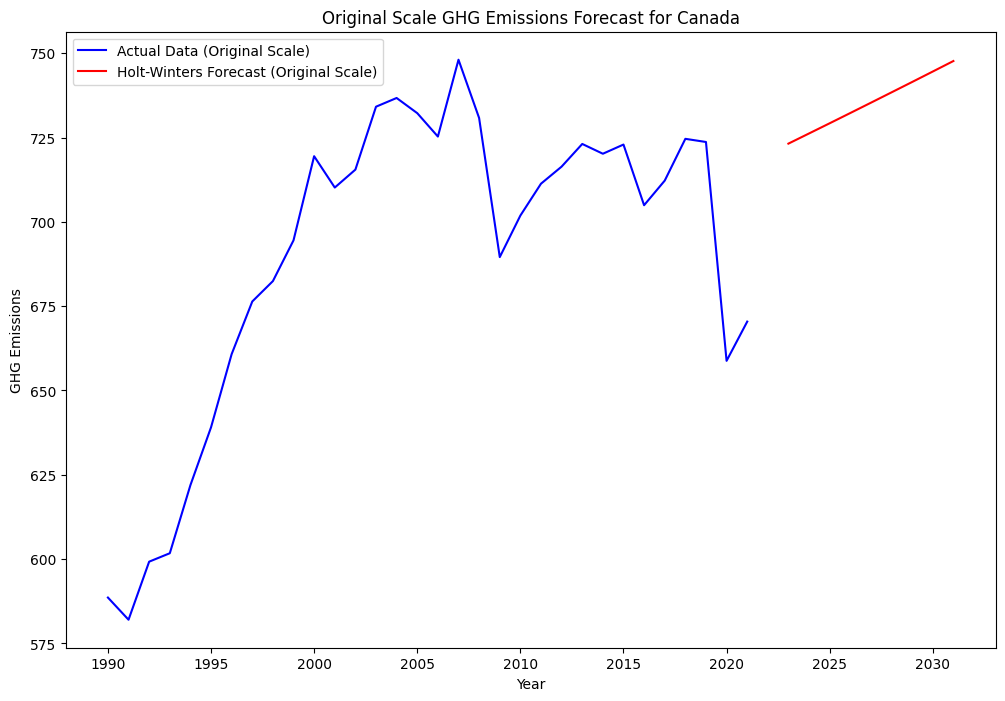

/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency i

Best model for Czechia: Trend=mul, Seasonal=None
MSE for Czechia: 0.005867108620542611
RMSE for Czechia: 0.061137625062859885
MAE for Czechia: 0.0552196695579107


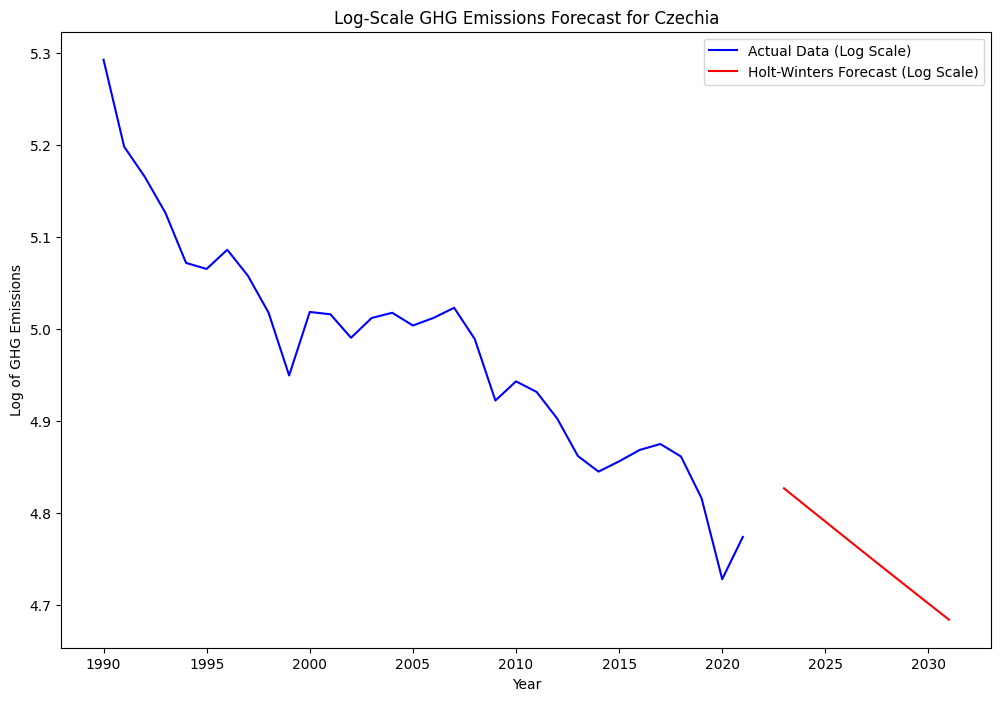

Predictions for Czechia in original scale:
124.79533269826089, 122.5600255368801, 120.37290341034875, 118.23278305458211, 116.13851344630994, 114.08897484455561, 112.08307786284648, 110.1197625710991, 108.19799762616782


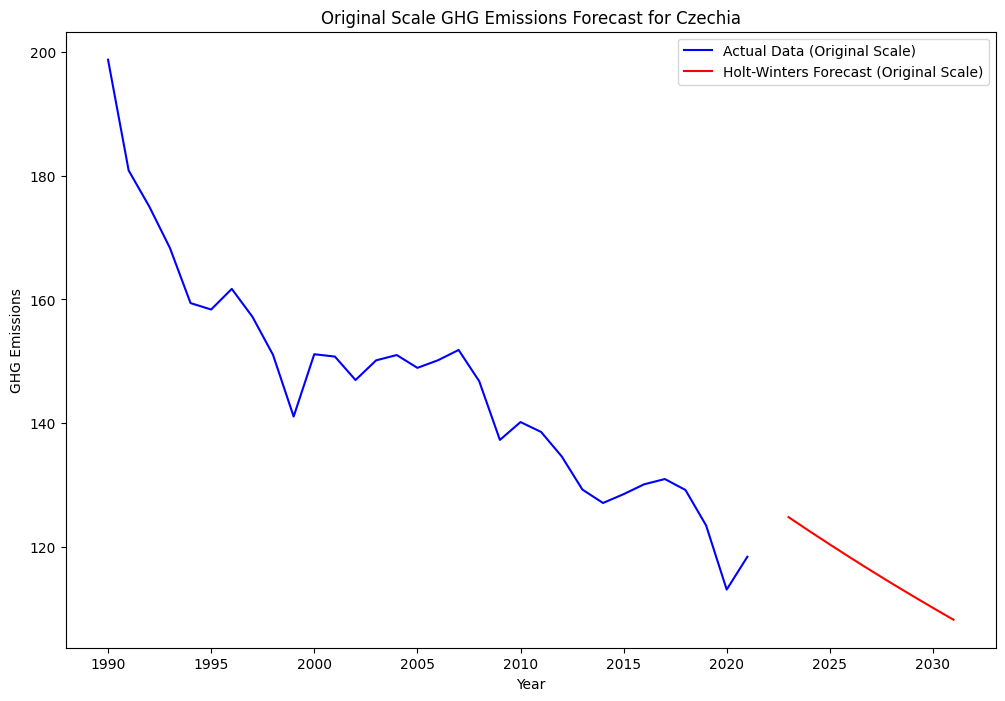

Best model for Denmark: Trend=mul, Seasonal=None

/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency i


MSE for Denmark: 0.02992010511672571
RMSE for Denmark: 0.042859923920825035
MAE for Denmark: 0.03792921585257363


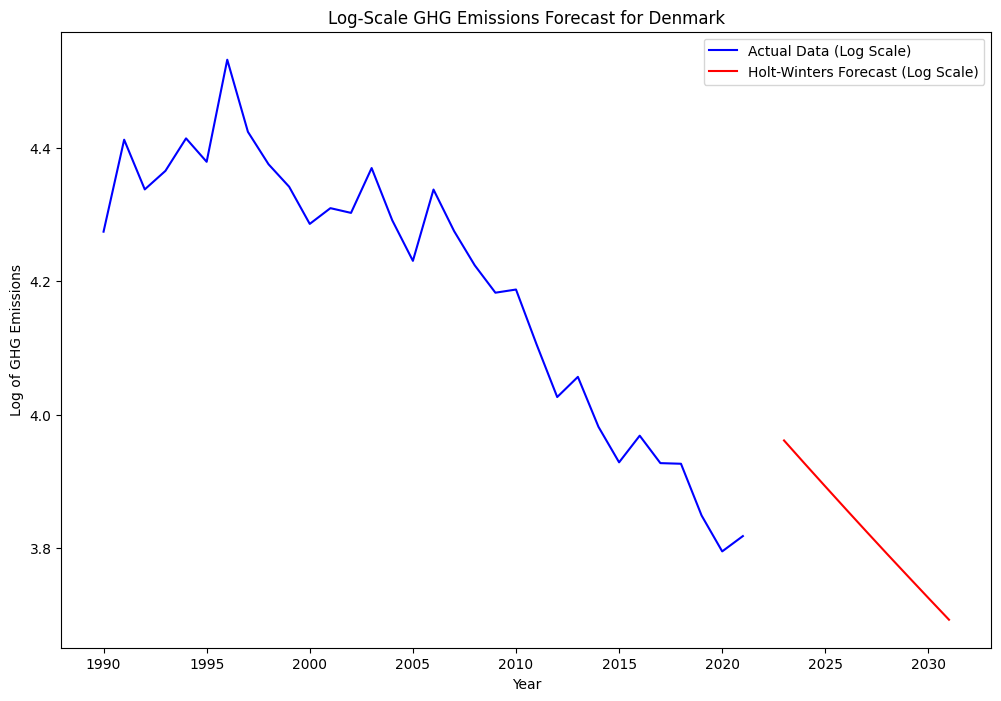

Predictions for Denmark in original scale:
52.529264220898746, 50.74185802807869, 49.03010323450468, 47.390304023074684, 45.81896651825789, 44.31278668326059, 42.86863900221772, 41.48356589284093, 40.15476779898845


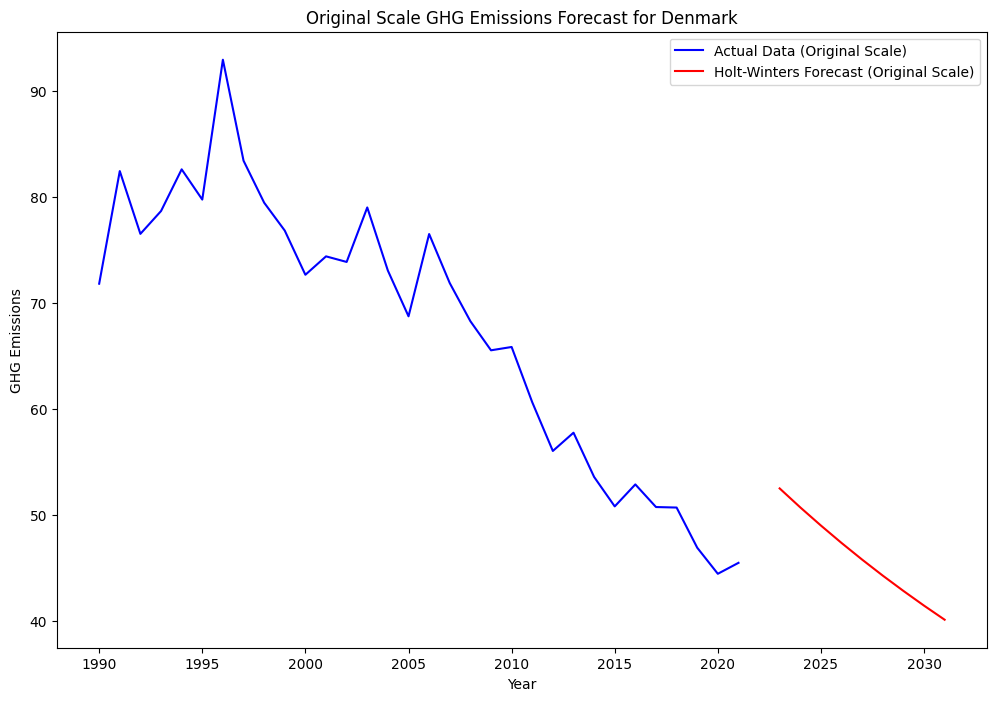

/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency i

Best model for Finland: Trend=mul, Seasonal=None
MSE for Finland: 0.02001545656386983
RMSE for Finland: 0.05737932990744393
MAE for Finland: 0.05231968469769287


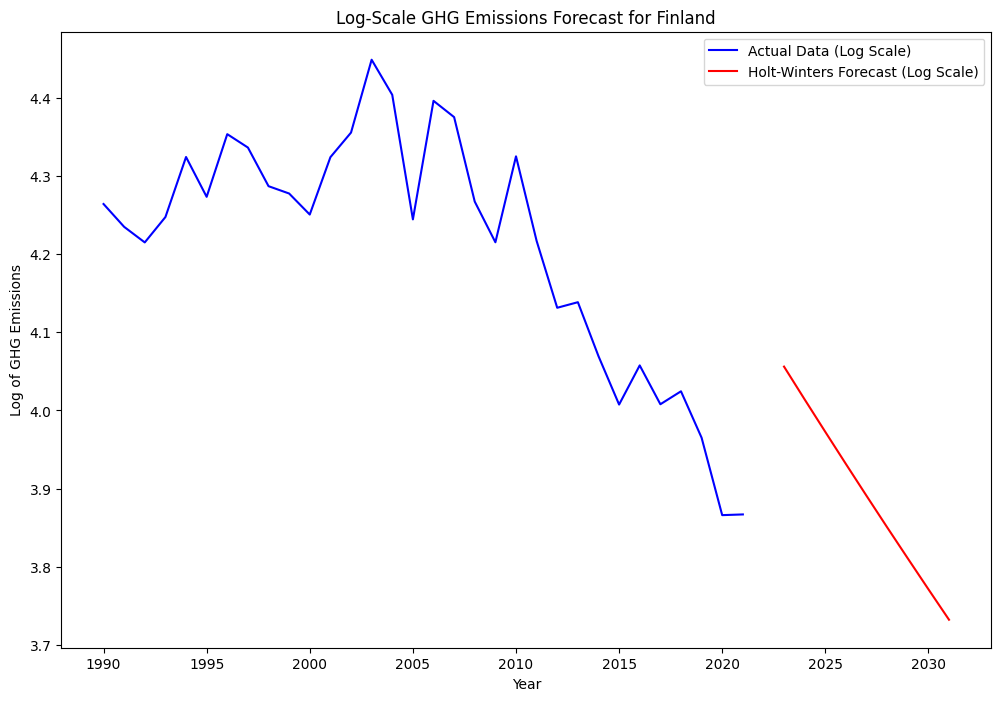

Predictions for Finland in original scale:
57.744835085362936, 55.372975555052214, 53.12157424337643, 50.98359116801476, 48.952445496890114, 47.02198276126664, 45.18644459881592, 43.440440817717246, 41.778923591187976


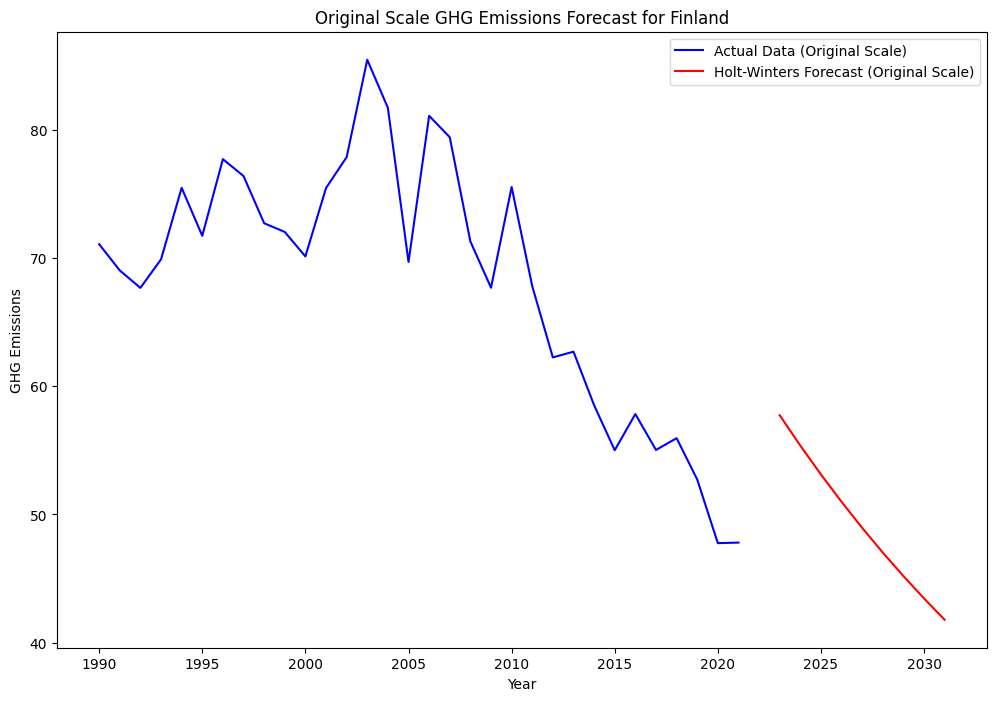

Best model for France: Trend=add, Seasonal=mul

/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency i


MSE for France: 0.001465108026231458
RMSE for France: 0.03816751289665899
MAE for France: 0.02709036467659828


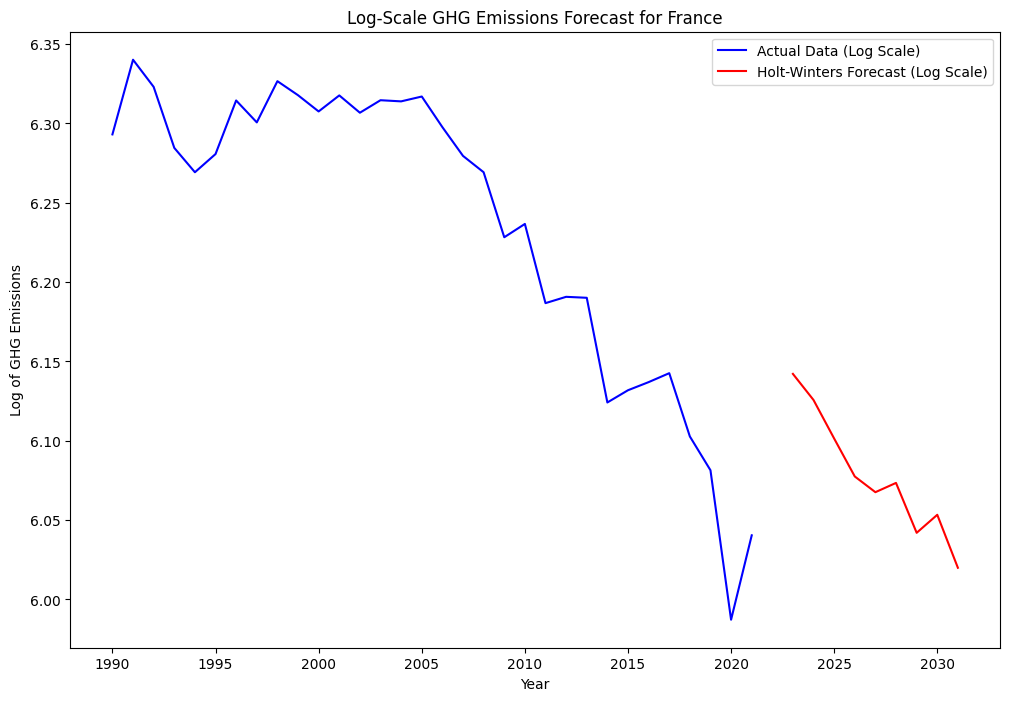

Predictions for France in original scale:
465.0533700127355, 457.4671765733511, 446.4775685290186, 435.93515736982664, 431.6385276993393, 434.1684051527264, 420.72686620044414, 425.5313785344132, 411.55459691747507


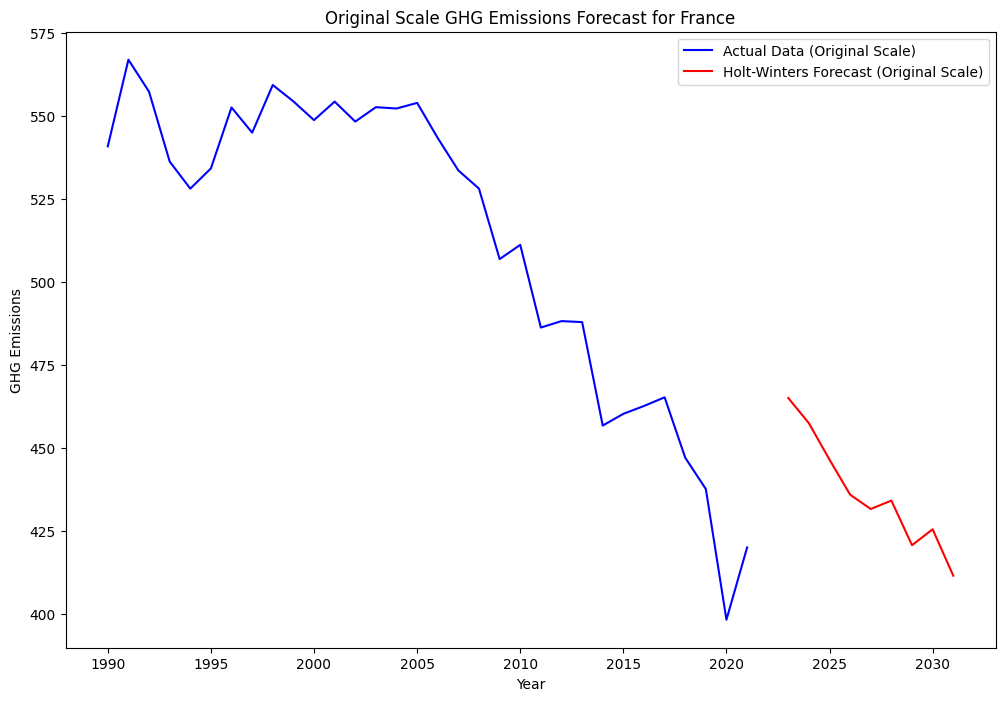

Best model for Germany: Trend=add, Seasonal=None
MSE for Germany: 0.0035304269373453204
RMSE for Germany: 0.05682704058916692
MAE for Germany: 0.046798411769859626


/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency i

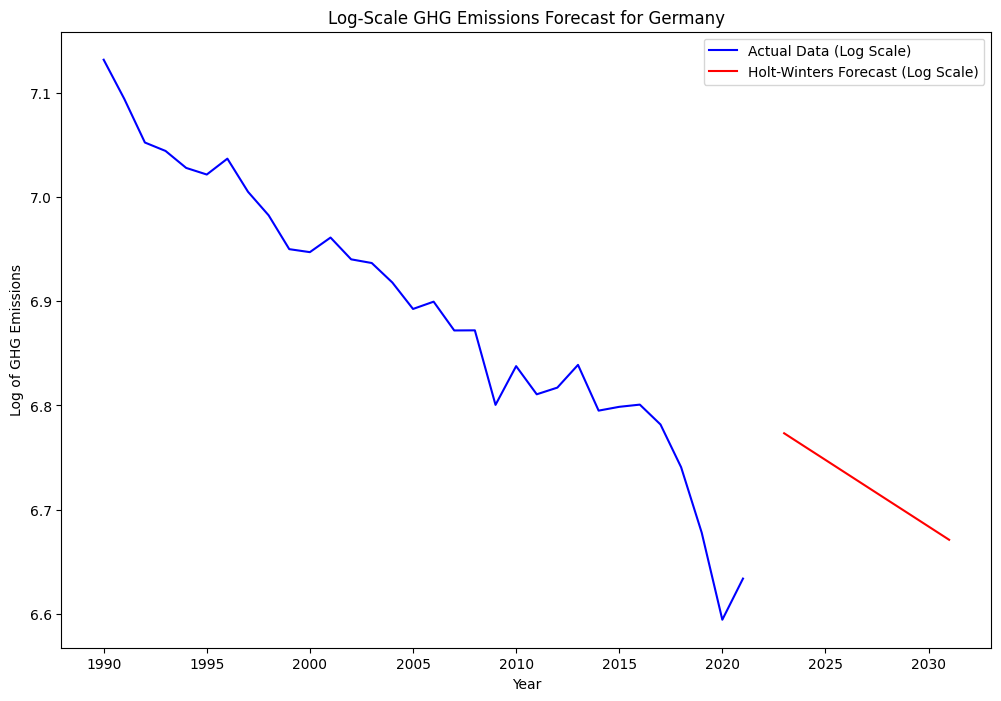

Predictions for Germany in original scale:
874.1920163652026, 863.0889135835934, 852.1268311831711, 841.3039780656918, 830.6185858816277, 820.0689087412387, 809.6532229293105, 799.369826623515, 789.2170396163523


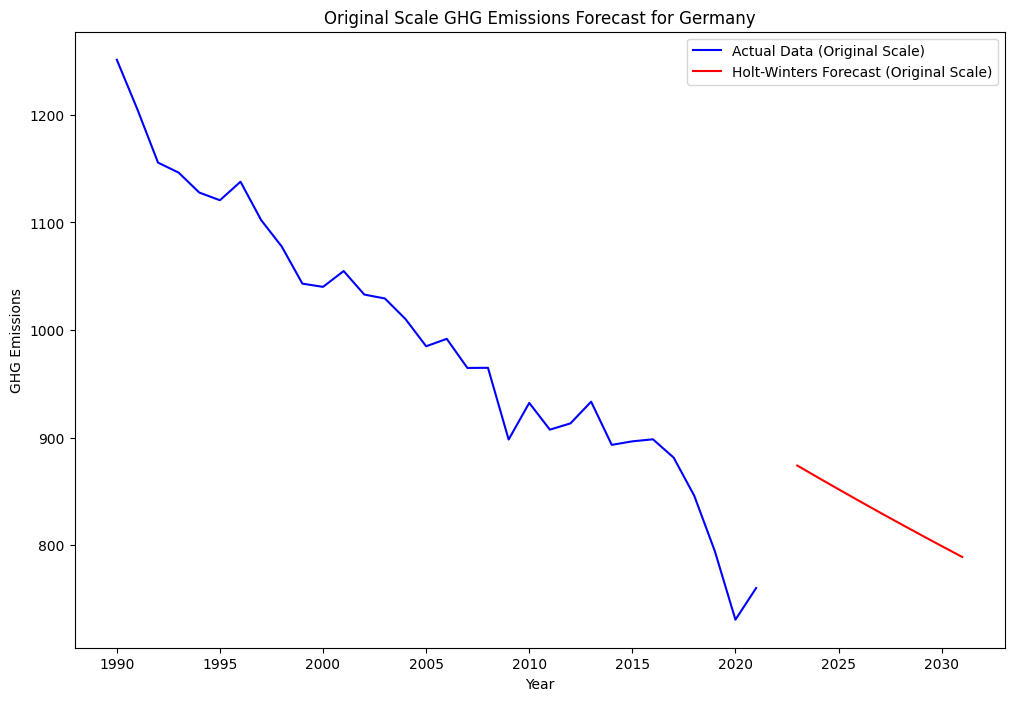

/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency i

Best model for Greece: Trend=add, Seasonal=mul
MSE for Greece: 0.0028638970599504225
RMSE for Greece: 0.04995641384564862
MAE for Greece: 0.03934134860465578


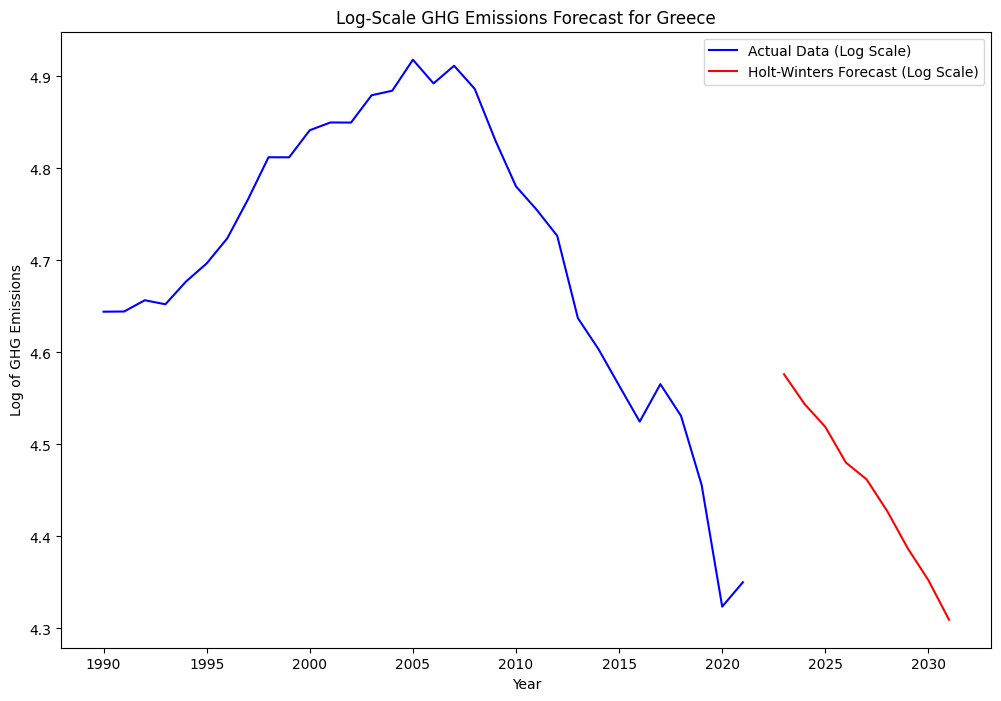

Predictions for Greece in original scale:
97.14917745988606, 94.0464683545022, 91.7484214548322, 88.25473801768398, 86.66667688444146, 83.73802153415491, 80.3978638279568, 77.6628728046985, 74.39764906869775


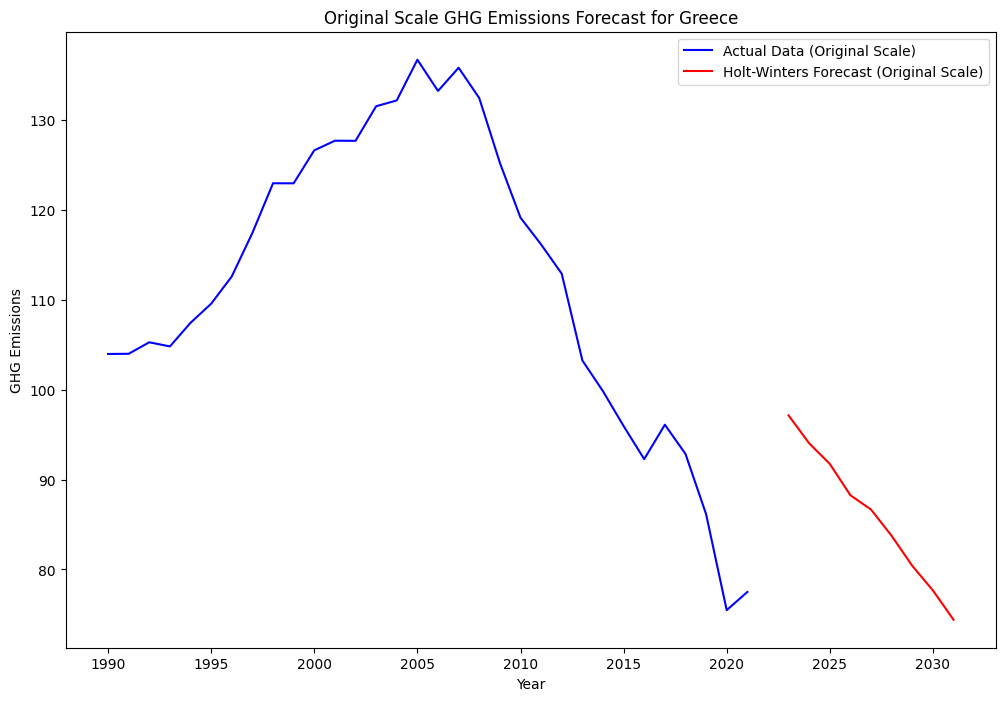

Best model for Ireland: Trend=add, Seasonal=mul
MSE for Ireland: 0.0031138288527404177
RMSE for Ireland: 0.055435727965247074
MAE for Ireland: 0.050812576477635804


/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency i

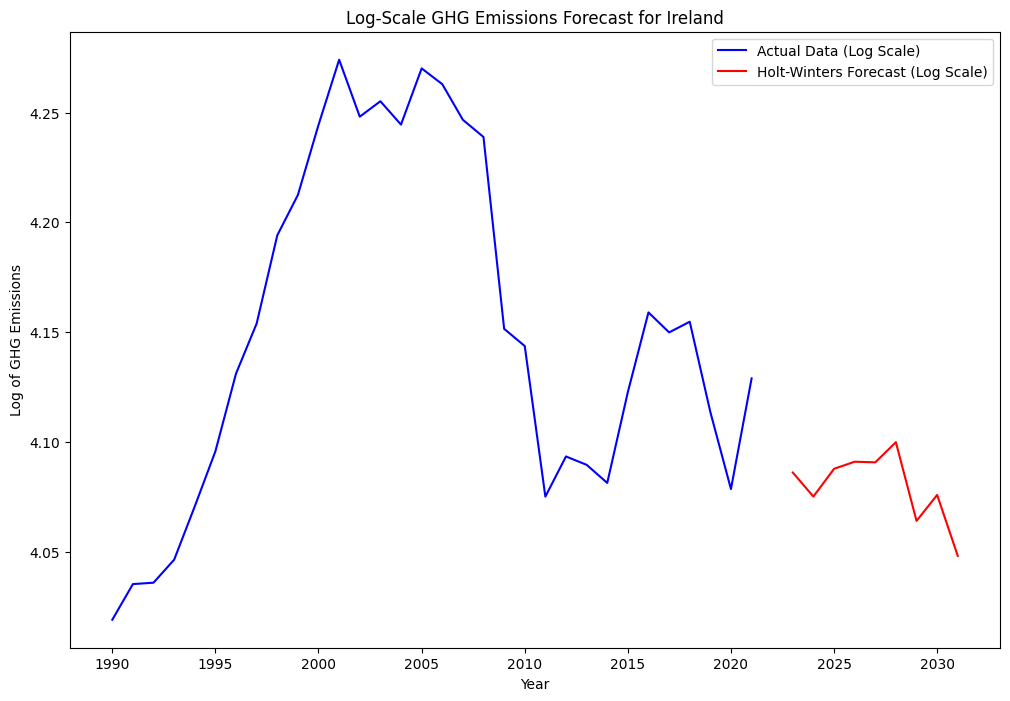

Predictions for Ireland in original scale:
59.50261456245399, 58.85391644487476, 59.60308834971211, 59.79598919608606, 59.778738644692986, 60.32994918805249, 58.20469904616641, 58.89851045338841, 57.28523667852757


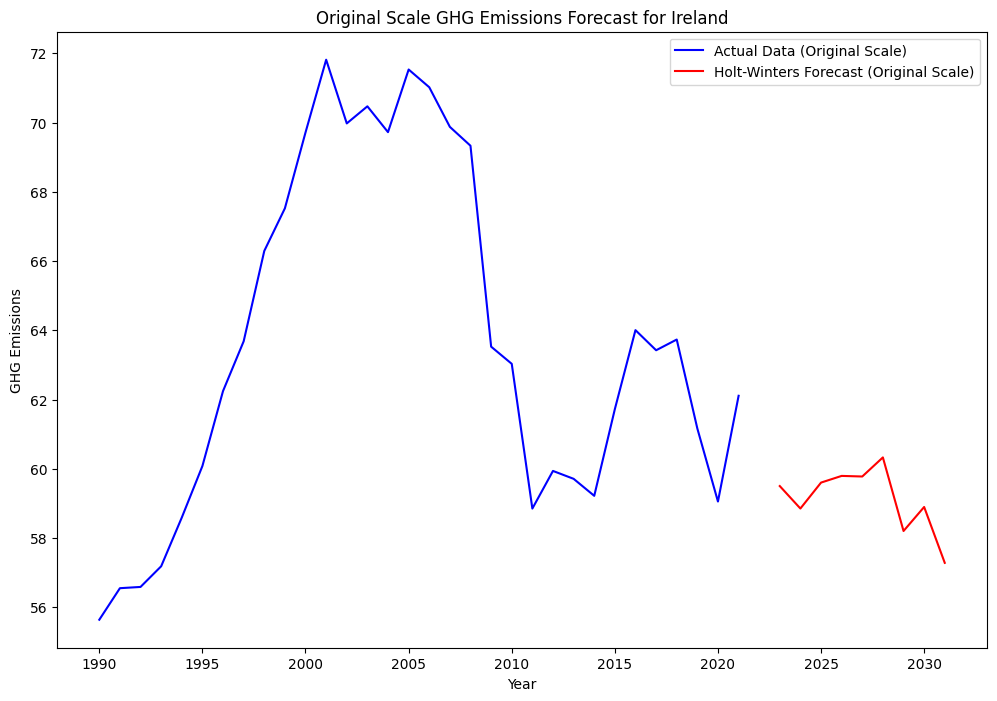

/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency i

Best model for Italy: Trend=mul, Seasonal=add
MSE for Italy: 0.02618606298015857
RMSE for Italy: 0.157370370684947
MAE for Italy: 0.14112846622665323


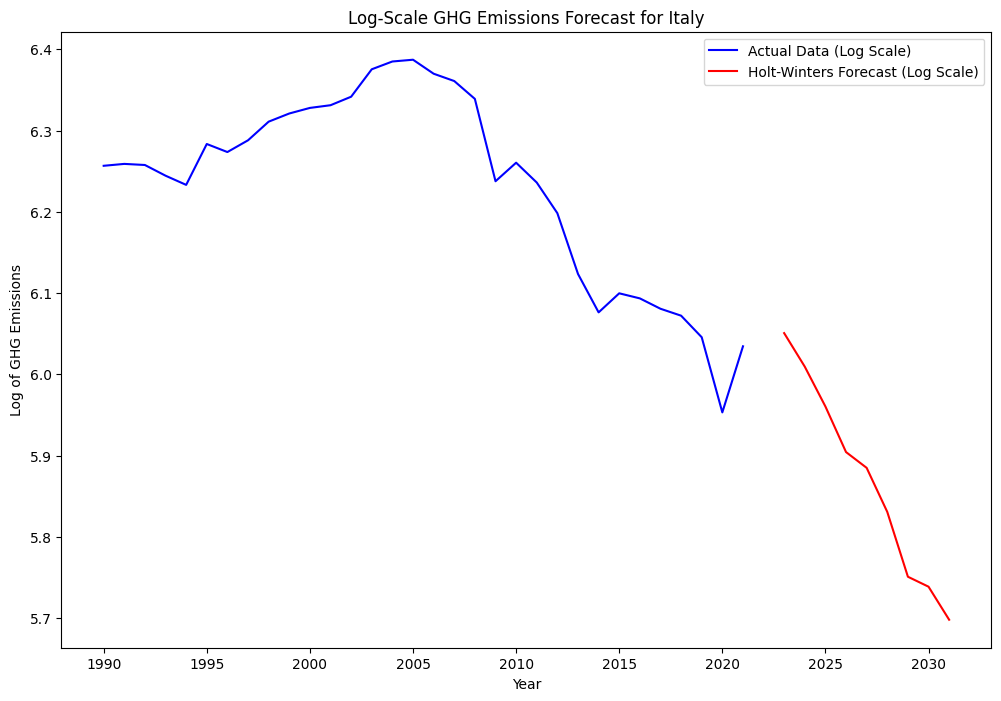

Predictions for Italy in original scale:
424.42841114819987, 407.27524254341154, 387.77272673616187, 366.62046643134335, 359.5777108654568, 340.60987875476656, 314.47331273265166, 310.64367817502267, 298.27079990883345


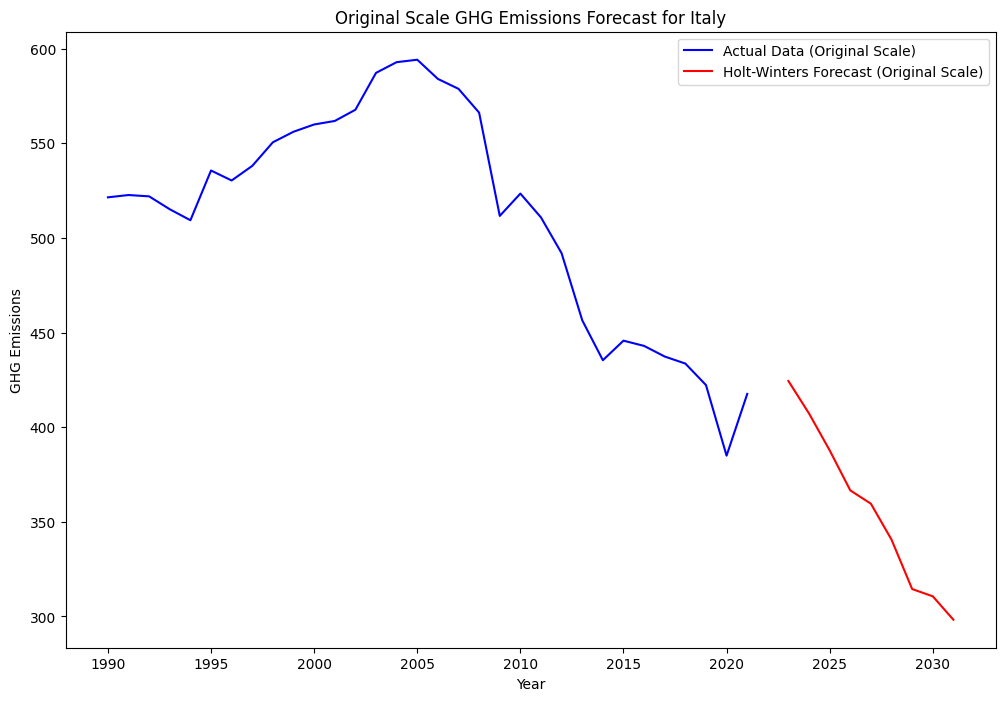

/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency i

Best model for Japan: Trend=mul, Seasonal=None
MSE for Japan: 0.015073813191230304
RMSE for Japan: 0.1173288095642402
MAE for Japan: 0.10322656431273305


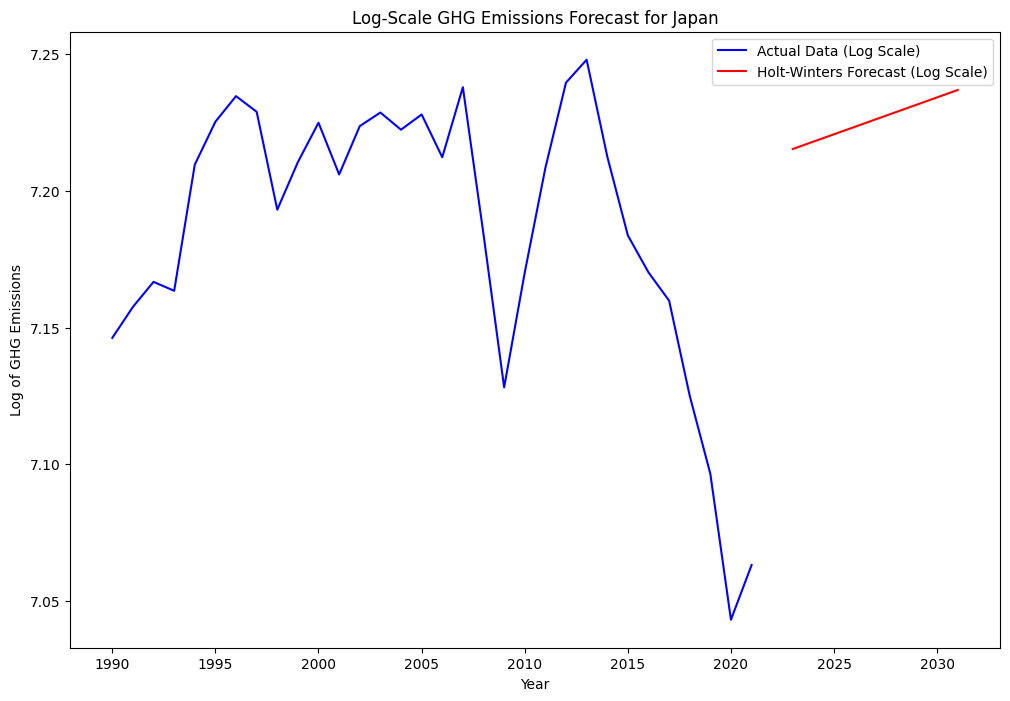

Predictions for Japan in original scale:
1360.1720574114797, 1363.8443463496753, 1367.5279278134665, 1371.222840251516, 1374.9291222550198, 1378.6468125582867, 1382.3759500393014, 1386.1165737203055, 1389.868722768359


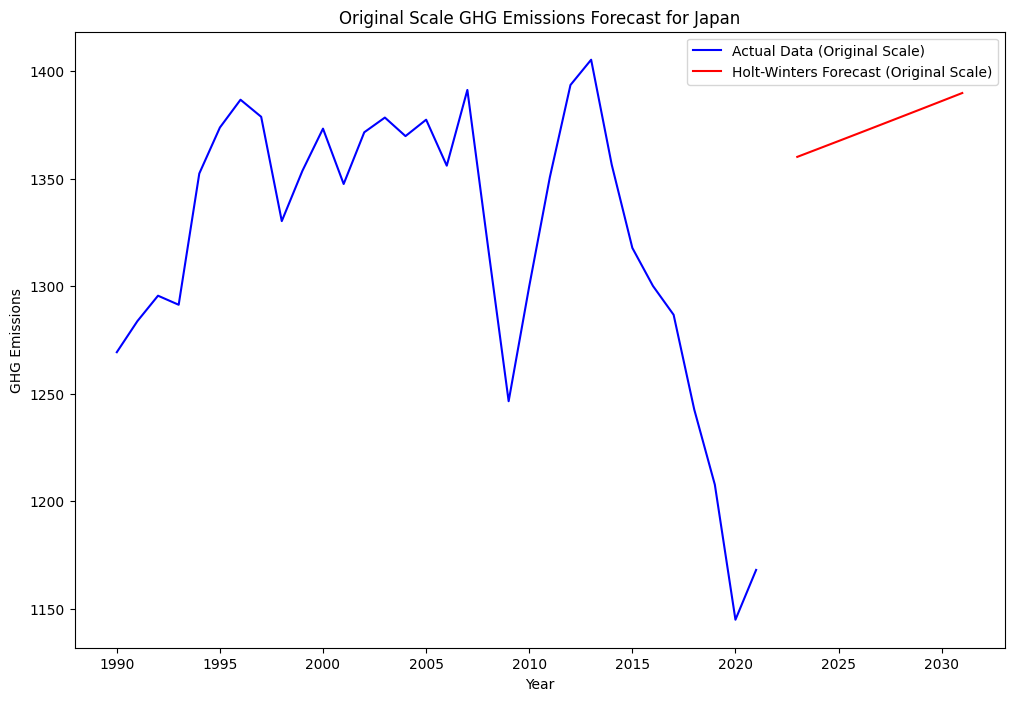

/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency i

Best model for Kazakhstan: Trend=add, Seasonal=add
MSE for Kazakhstan: 0.02018755682705371
RMSE for Kazakhstan: 0.13769331908948948
MAE for Kazakhstan: 0.11758065211329846


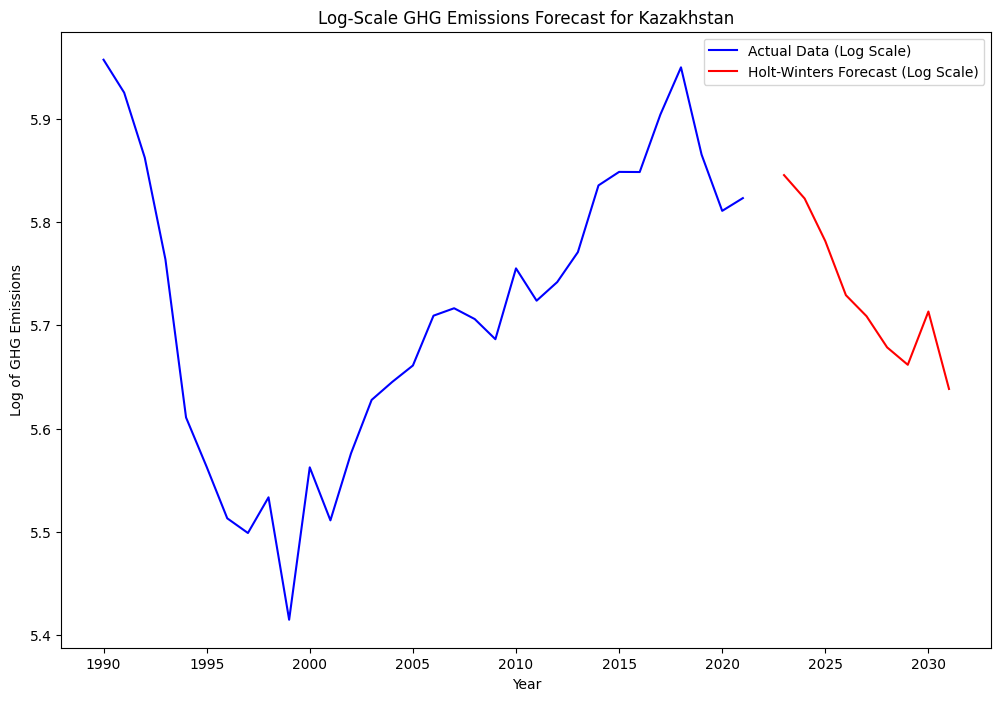

Predictions for Kazakhstan in original scale:
345.7530741867124, 337.989069875174, 324.3214324772279, 307.74994571662563, 301.549859138975, 292.56340965007433, 287.66452895448634, 302.9107427189224, 281.00105254439967


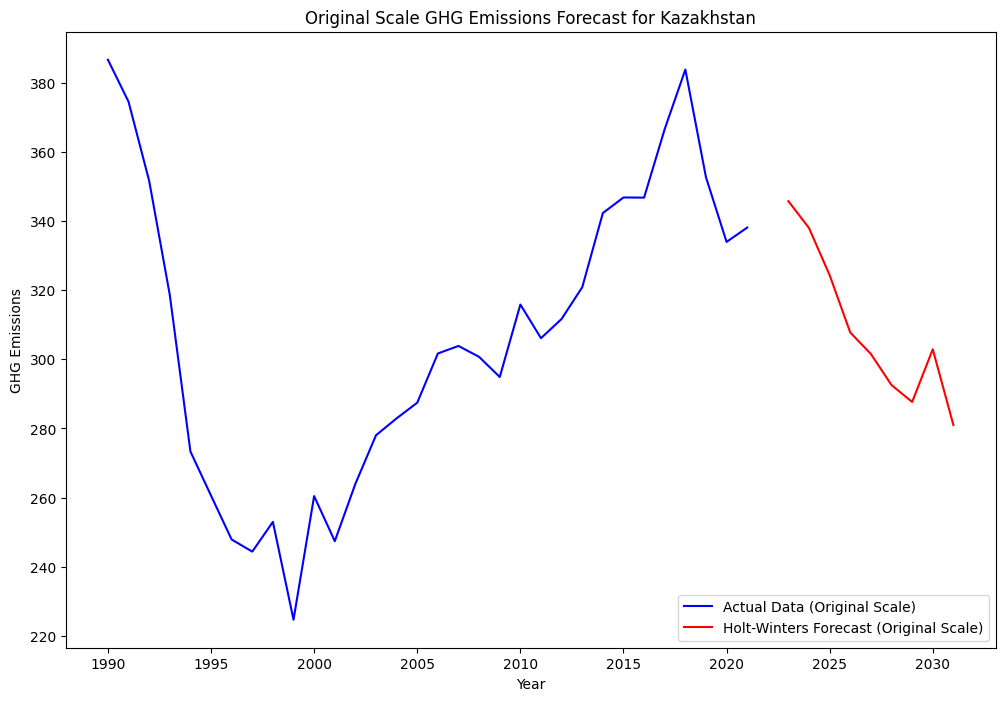

Best model for Luxembourg: Trend=mul, Seasonal=None
MSE for Luxembourg: 0.011390268583469842
RMSE for Luxembourg: 0.08274763639152395
MAE for Luxembourg: 0.06215530191754689


/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency i

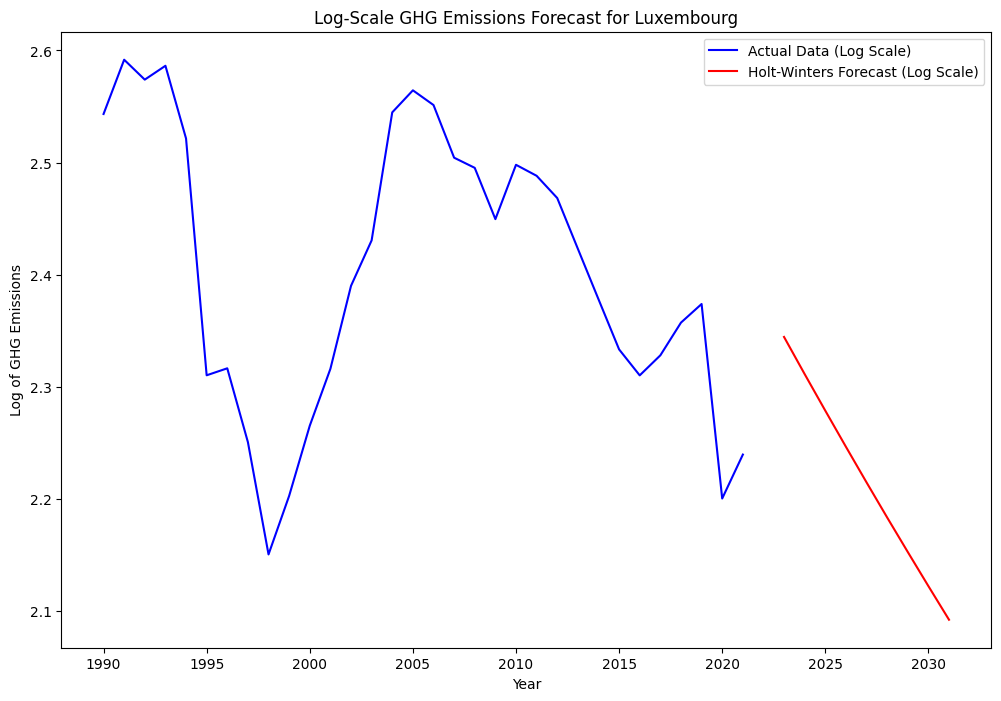

Predictions for Luxembourg in original scale:
10.429256192205571, 10.089622262767692, 9.765613050096801, 9.456366215331636, 9.161074042371393, 8.878979574501, 8.609373050684606, 8.351588616359484, 8.105001285829282


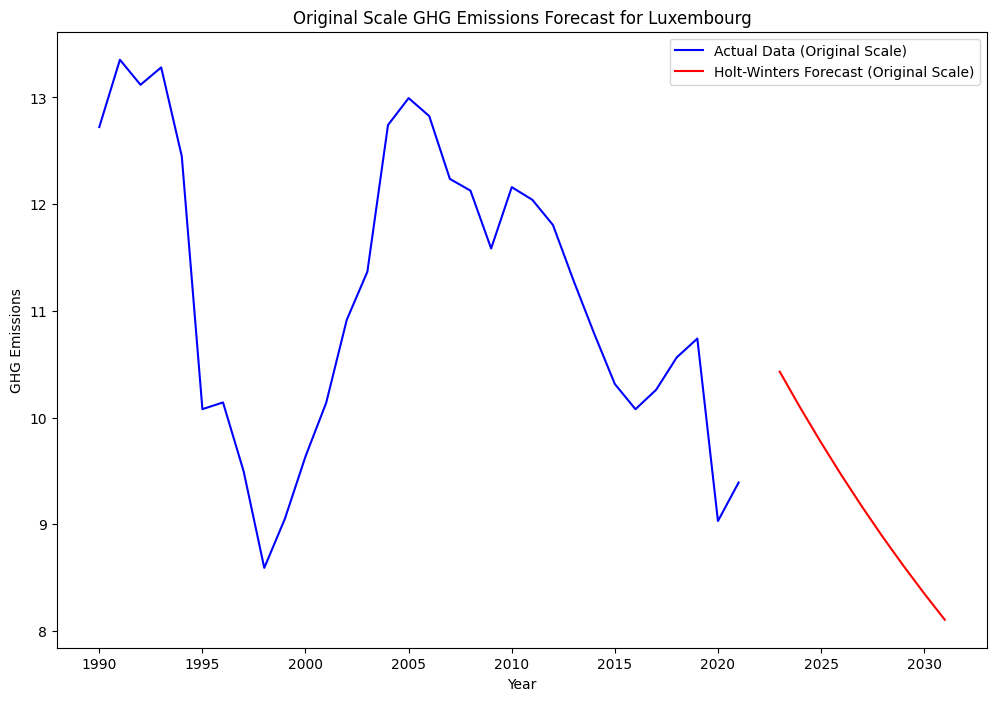

/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency i

Best model for New Zealand: Trend=mul, Seasonal=None
MSE for New Zealand: 0.0031706539946606224
RMSE for New Zealand: 0.03081385645835955
MAE for New Zealand: 0.02551464253312043


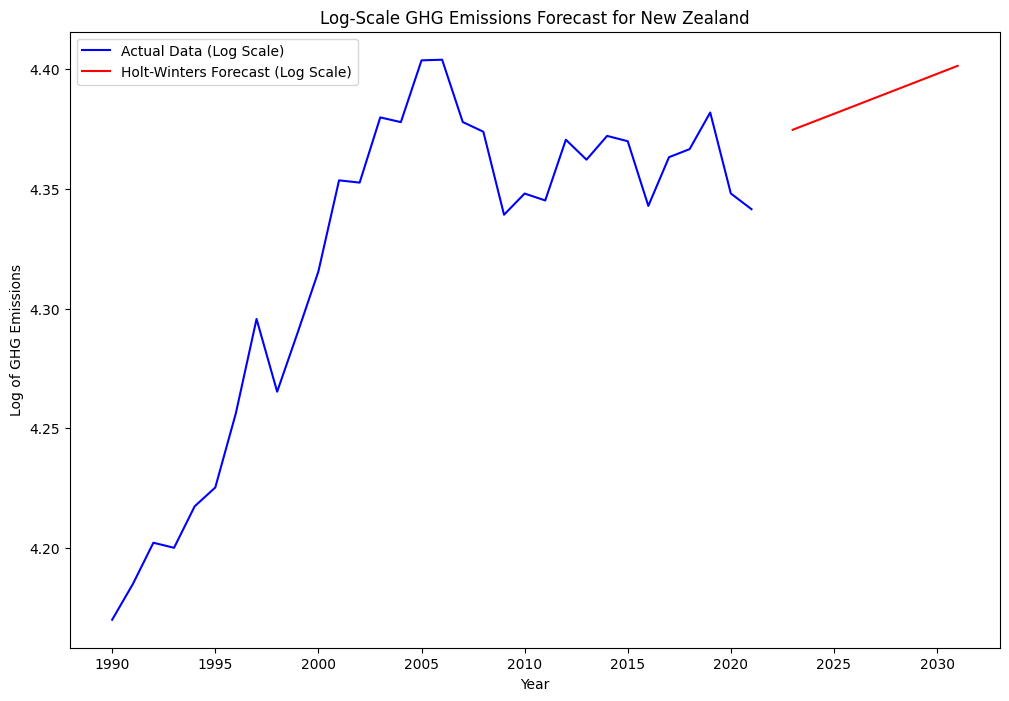

Predictions for New Zealand in original scale:
79.41457412198649, 79.67944849478357, 79.94540893155941, 80.21246056259048, 80.48060854526456, 80.74985806423746, 81.02021433159153, 81.29168258699495, 81.56426809786223


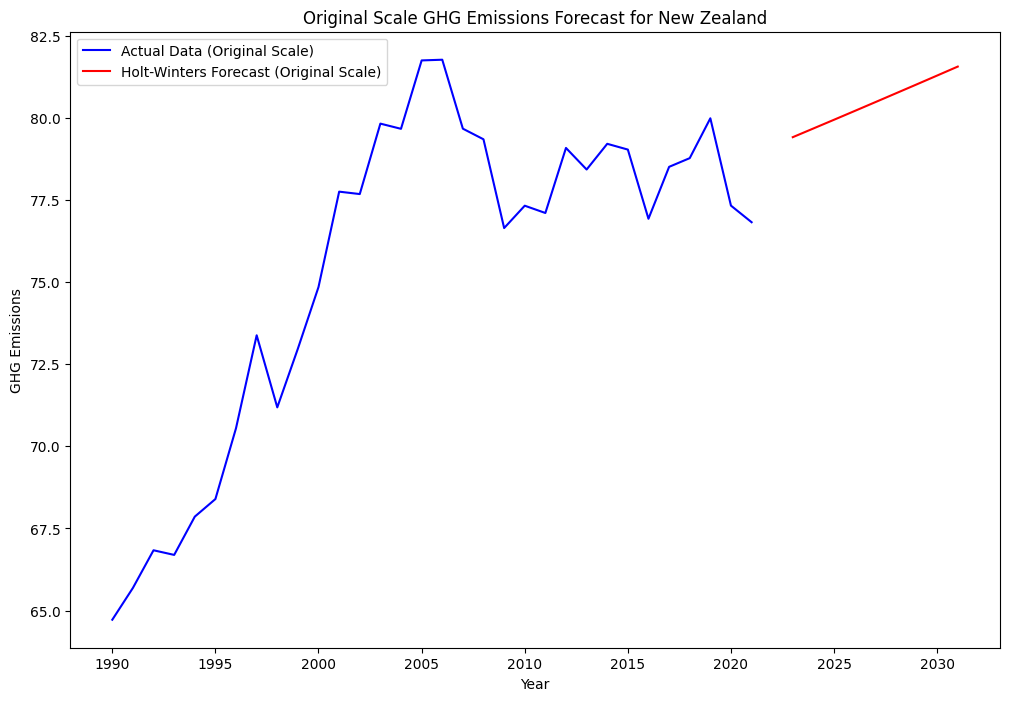

/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency i

Best model for Norway: Trend=mul, Seasonal=None
MSE for Norway: 0.004935870308762947
RMSE for Norway: 0.06813899001441533
MAE for Norway: 0.05417071625527641


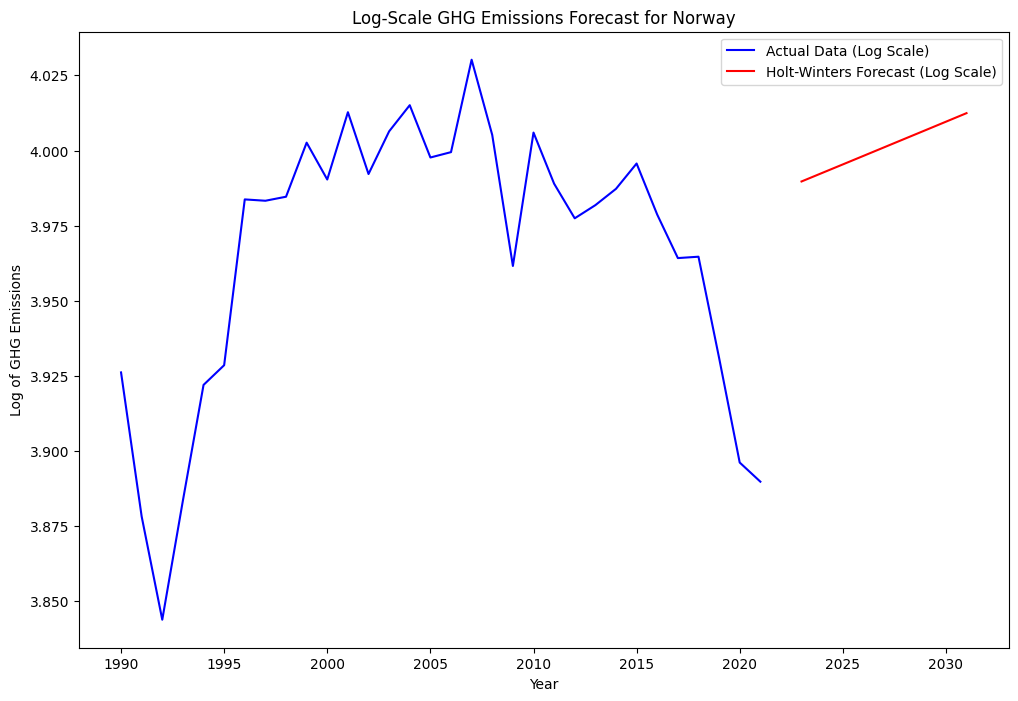

Predictions for Norway in original scale:
54.038867722277736, 54.19223909480016, 54.34615517496938, 54.50061820843505, 54.65563045125572, 54.81119416995212, 54.967311641560286, 55.12398515368593, 55.28121700455793


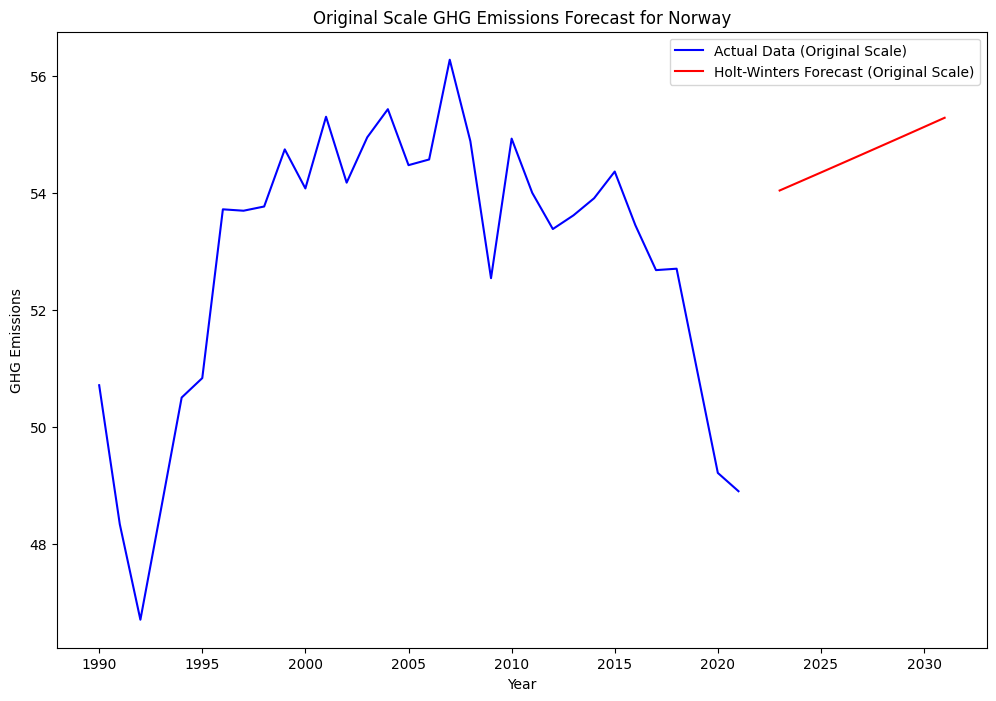

/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency i

Best model for Poland: Trend=add, Seasonal=add
MSE for Poland: 0.0023812489186713125
RMSE for Poland: 0.04826790493109438
MAE for Poland: 0.0402232169693952


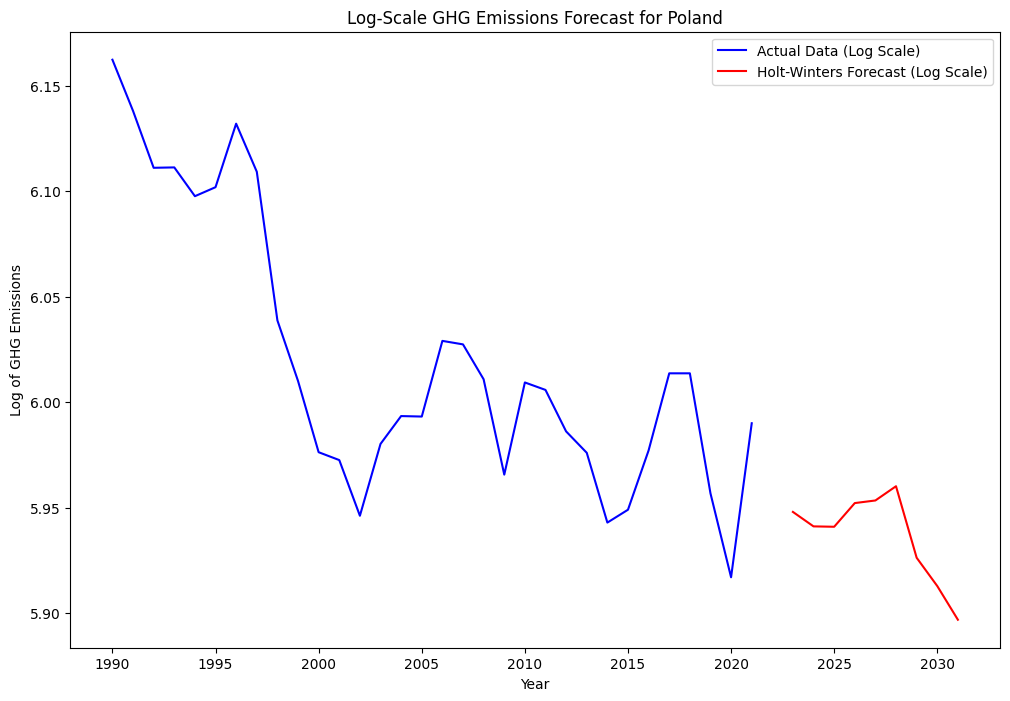

Predictions for Poland in original scale:
382.99775033678566, 380.3815693459855, 380.3118401032212, 384.60489914510987, 385.08018083342114, 387.68845405373224, 374.76334591427826, 369.7718638210179, 363.91738184354693


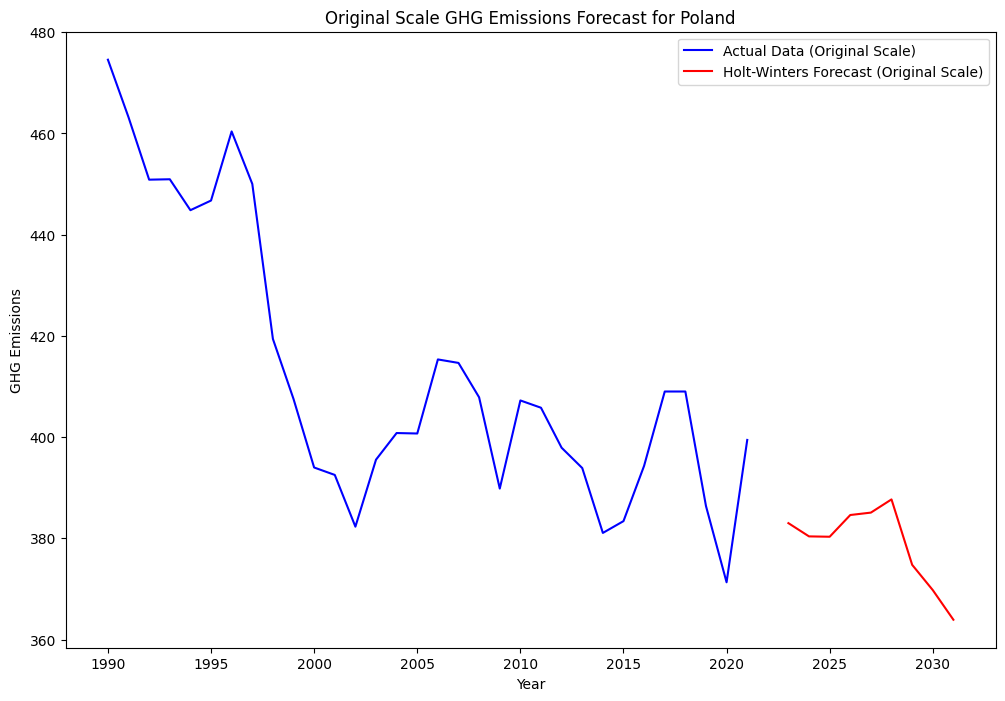

Best model for Portugal: Trend=mul, Seasonal=None
MSE for Portugal: 0.03187840621841371
RMSE for Portugal: 0.11400267641848537
MAE for Portugal: 0.10197981850497546


/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency i

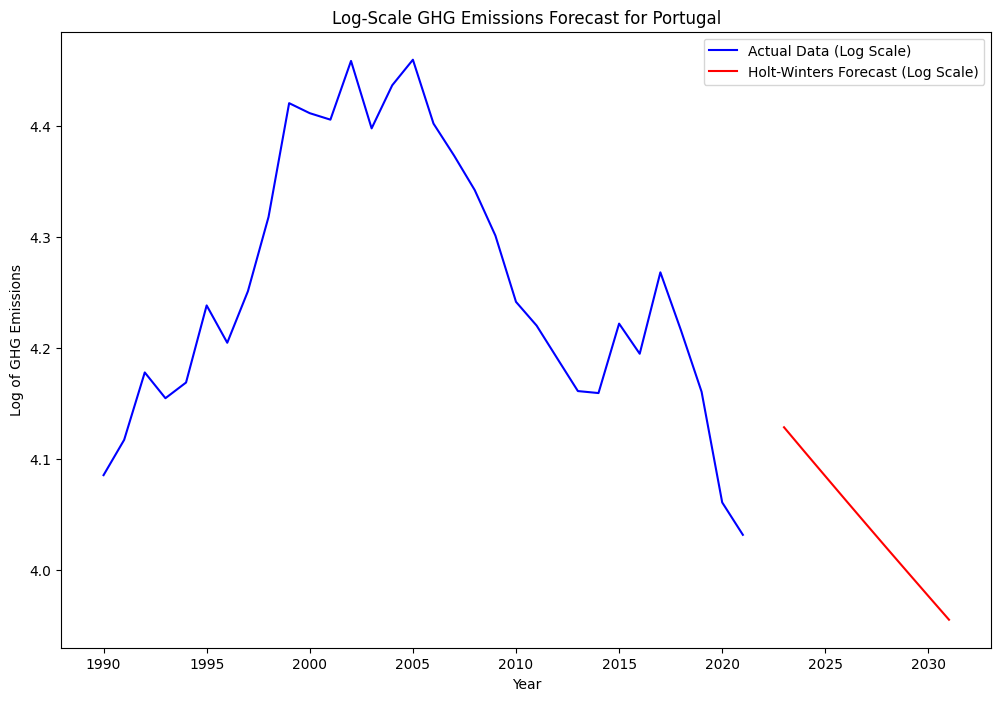

Predictions for Portugal in original scale:
62.097265032561864, 60.7402561742206, 59.41992770298021, 58.13513662769457, 56.88477978027021, 55.667792293573655, 54.48314614232792, 53.32984874420315, 52.20694161843784


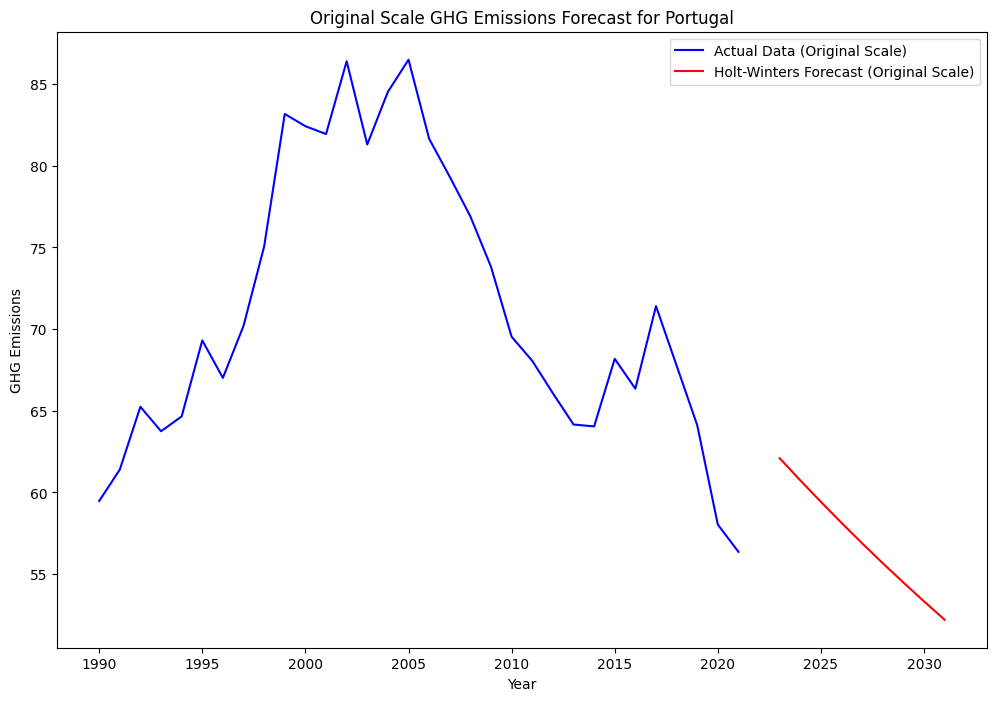

/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency i

Best model for Romania: Trend=mul, Seasonal=None
MSE for Romania: 0.015752413496054368
RMSE for Romania: 0.11969581580005598
MAE for Romania: 0.10623889009594034


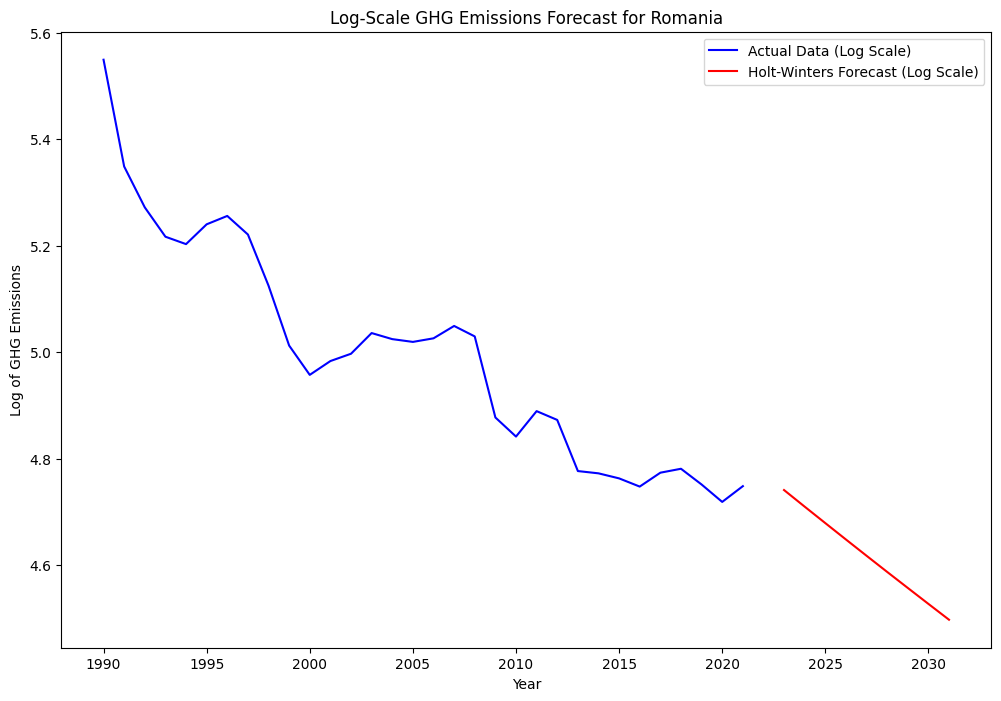

Predictions for Romania in original scale:
114.56393269782777, 111.04870034056854, 107.66338017063103, 104.40250529330679, 101.26086388467047, 98.2334862177221, 95.31563239946517, 92.50278077731934, 89.79061697584493


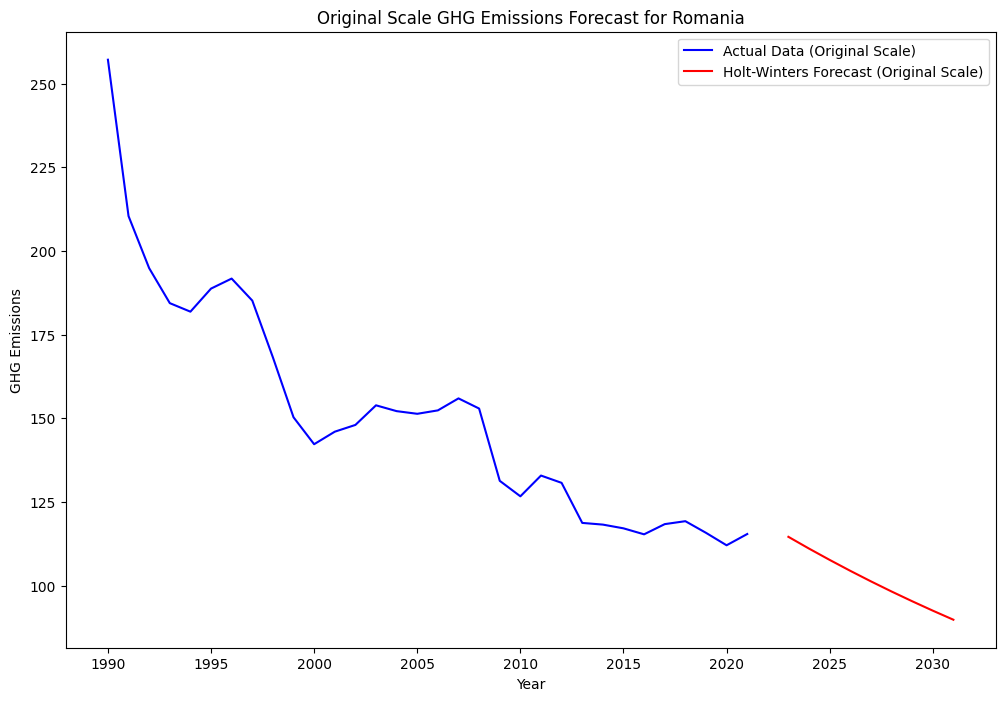

/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency i

Best model for Russian Federation: Trend=mul, Seasonal=None
MSE for Russian Federation: 0.038168801018005696
RMSE for Russian Federation: 0.0554524767590898
MAE for Russian Federation: 0.045152235634897356


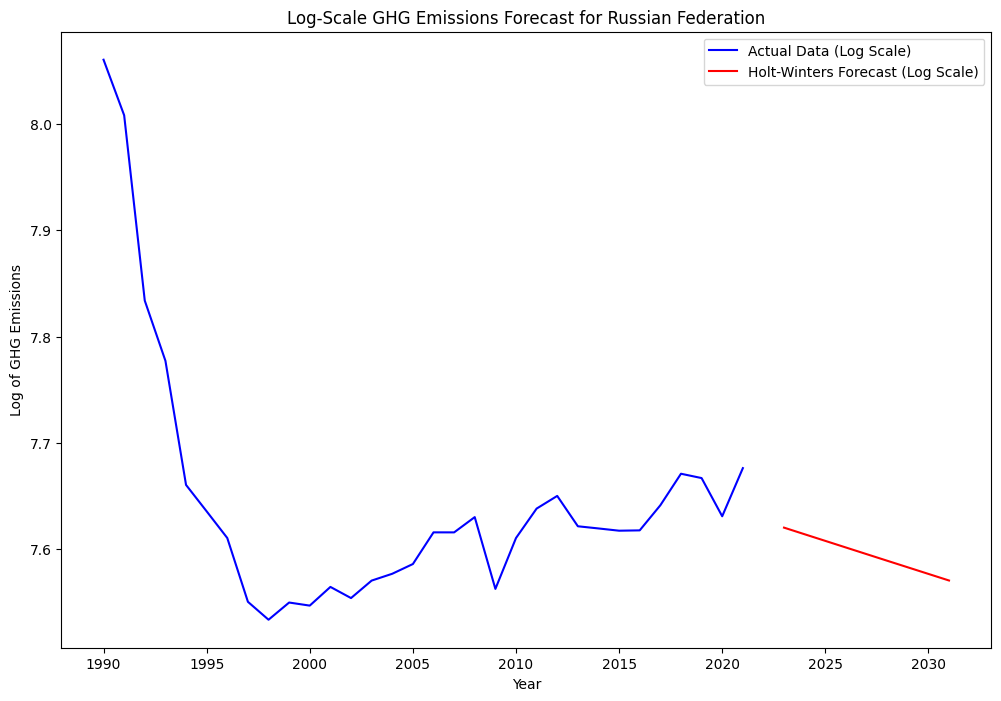

Predictions for Russian Federation in original scale:
2039.2146100523553, 2026.5419617308467, 2013.9583377520576, 2001.4630490314757, 1989.0554122710444, 1976.734749907005, 1964.500390058259, 1952.351666475203, 1940.2879184890685


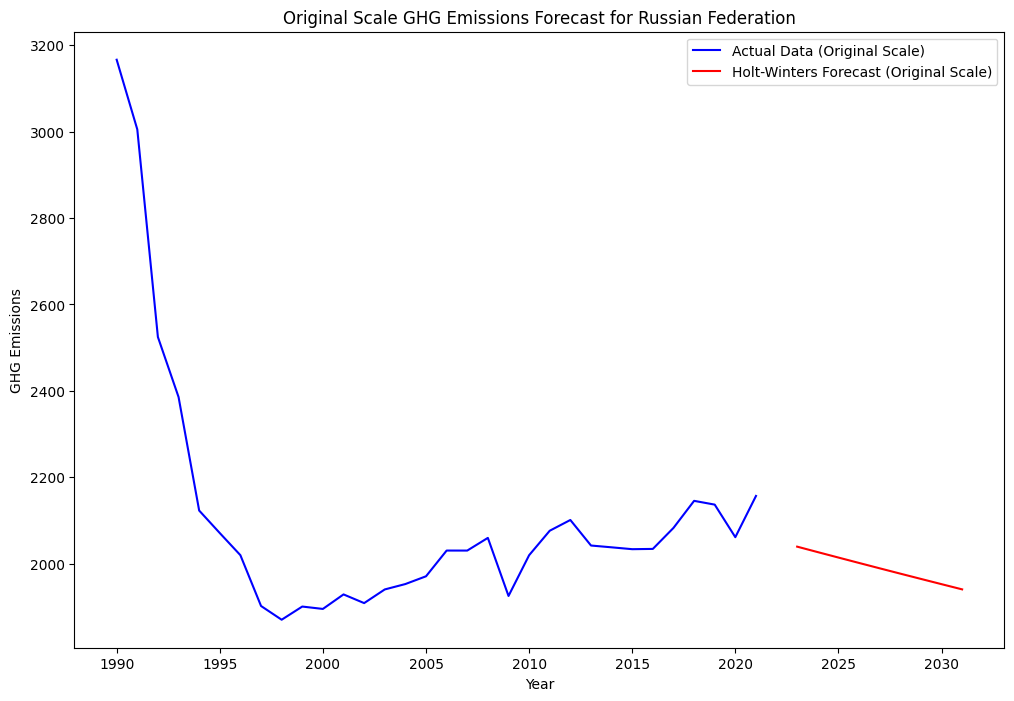

/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency i

Best model for Slovakia: Trend=mul, Seasonal=None
MSE for Slovakia: 0.025893942581827357
RMSE for Slovakia: 0.1206562165984965
MAE for Slovakia: 0.1105648656419305


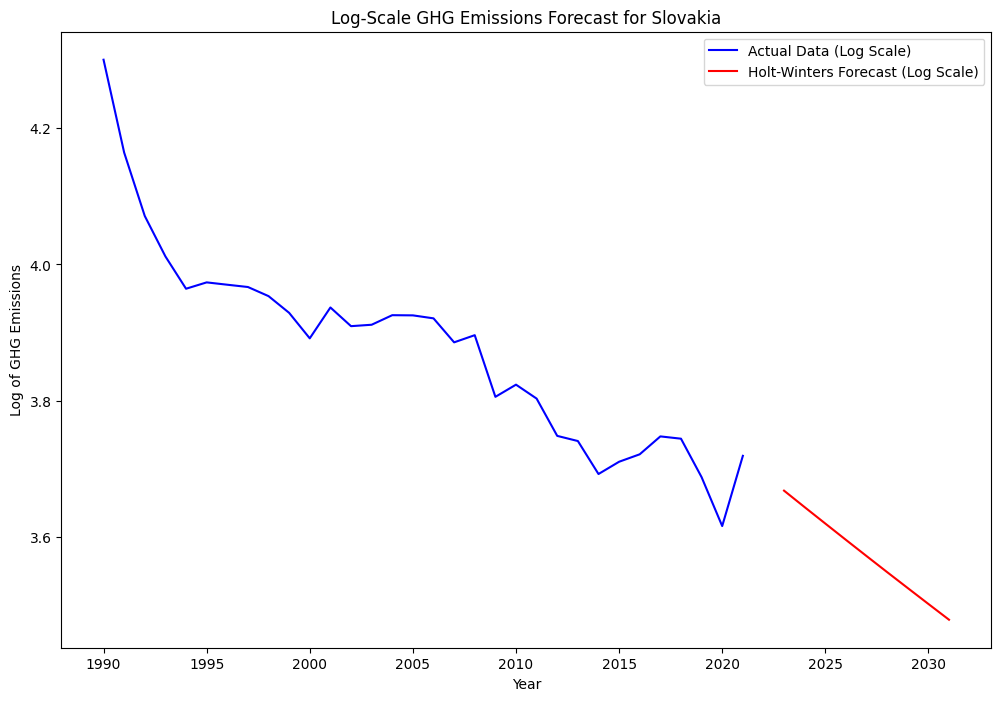

Predictions for Slovakia in original scale:
39.17265156611624, 38.234585299997974, 37.32496071603537, 36.44277465231668, 35.58706373909633, 34.75690266019224, 33.95140249687894, 33.169709150069245, 32.41100183680599


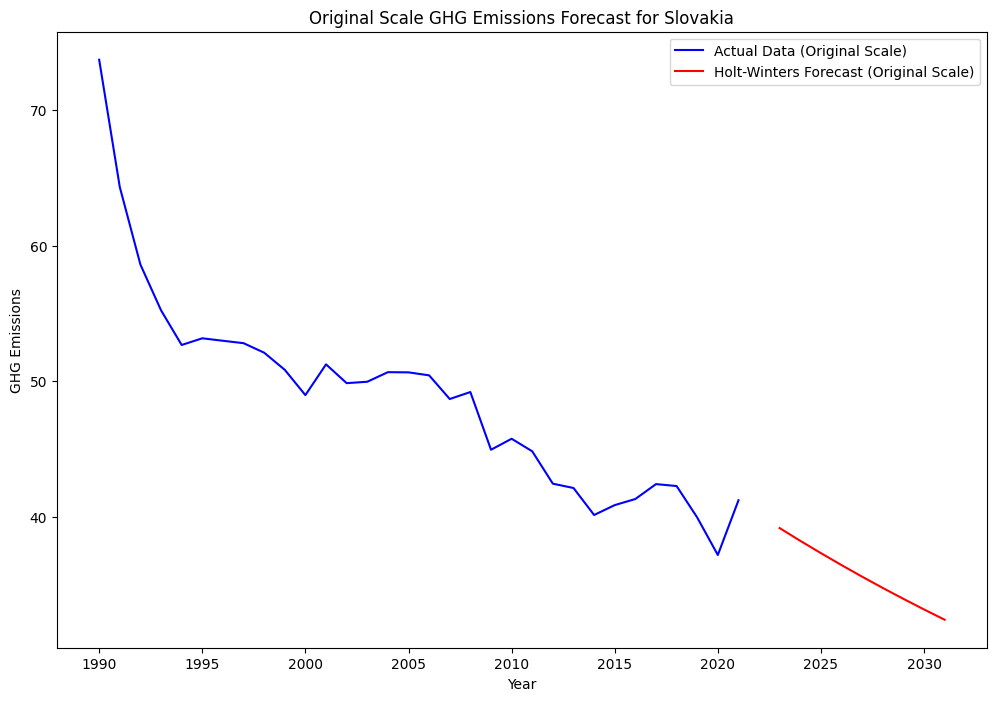

/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency i

Best model for Spain: Trend=mul, Seasonal=None
MSE for Spain: 0.008948741765707686
RMSE for Spain: 0.08740784002000554
MAE for Spain: 0.07819306220480852


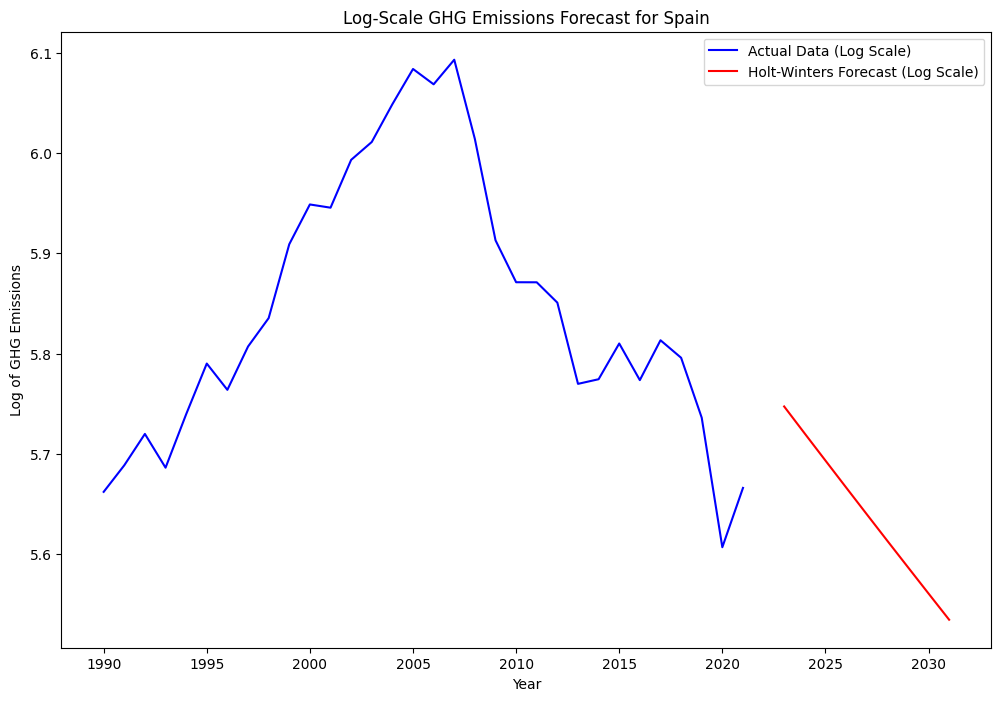

Predictions for Spain in original scale:
313.30550882854504, 304.94606463099615, 296.8474360848624, 289.0004895215571, 281.3964425817936, 274.0268495842534, 266.88358754738556, 259.9588428333255, 253.2450983844816


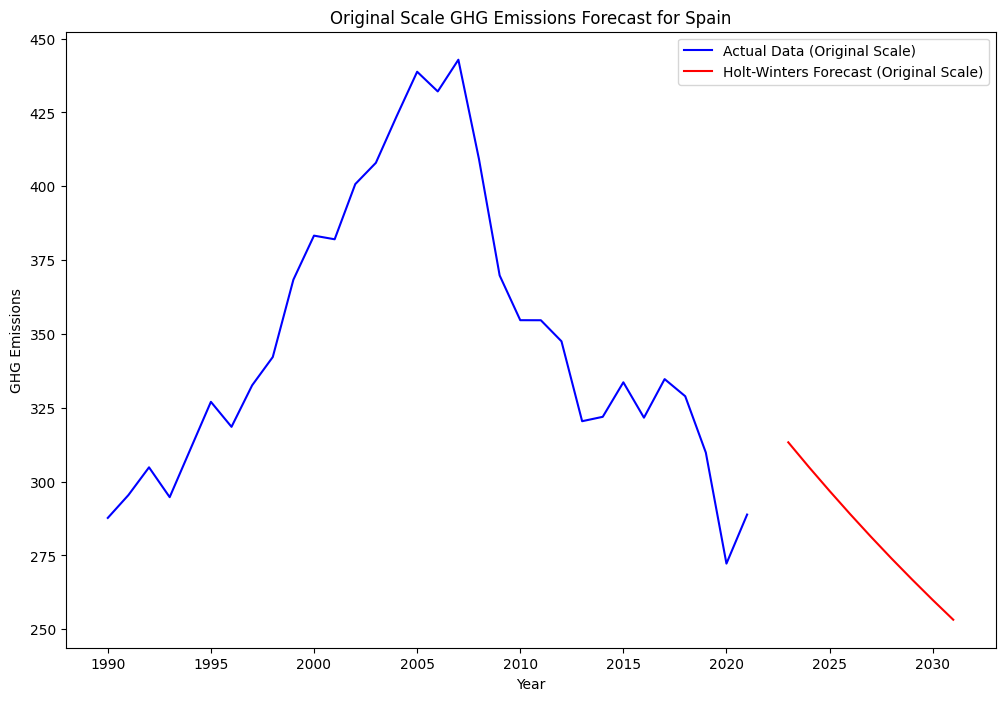

/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency i

Best model for Sweden: Trend=mul, Seasonal=None
MSE for Sweden: 0.0032557630763293895
RMSE for Sweden: 0.03944716310012229
MAE for Sweden: 0.03582668766510176


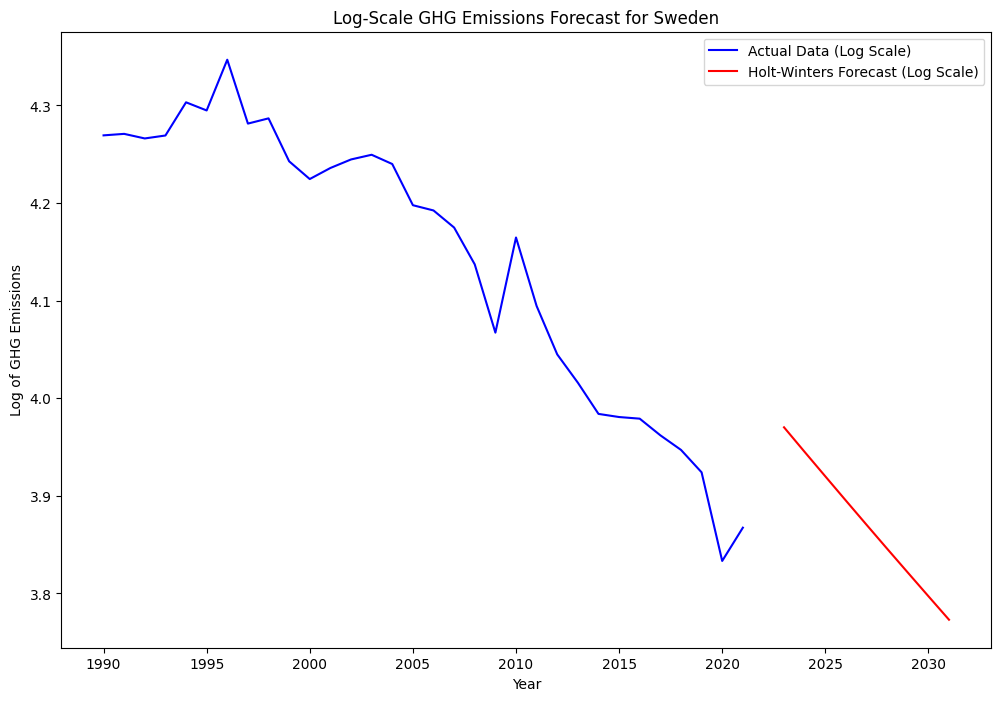

Predictions for Sweden in original scale:
52.99664076922248, 51.67782135778596, 50.39988144858277, 49.16135643712942, 47.960840482204354, 46.79698391671778, 45.66849078218404, 44.574116480466266, 43.51266553680769


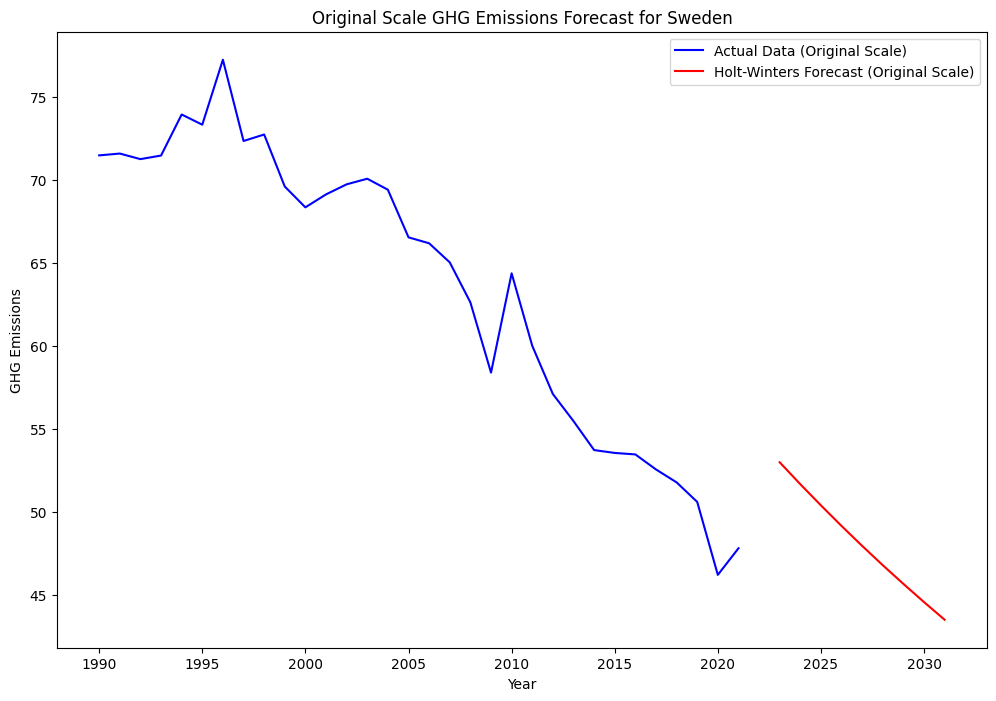

/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency i

Best model for Switzerland: Trend=add, Seasonal=mul
MSE for Switzerland: 0.006166125999551358
RMSE for Switzerland: 0.07851406509354979
MAE for Switzerland: 0.0719228487444008


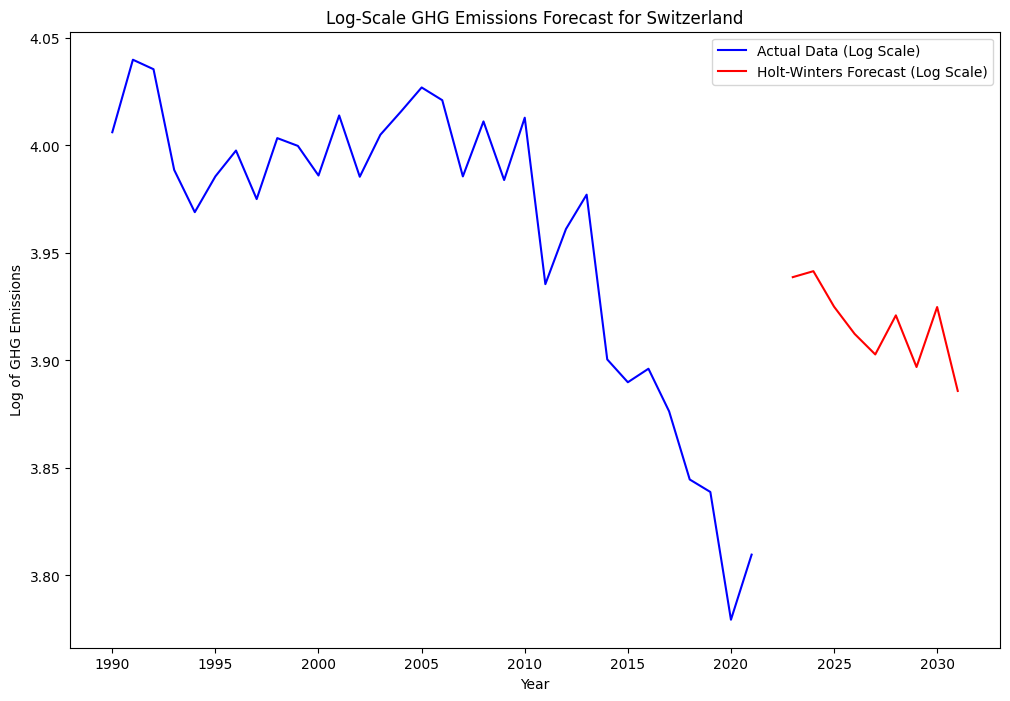

Predictions for Switzerland in original scale:
51.35349617564421, 51.49620114230244, 50.653310630134904, 50.015236117500564, 49.5401794780913, 50.44904391688312, 49.251274990312055, 50.644507373812274, 48.706167456740666


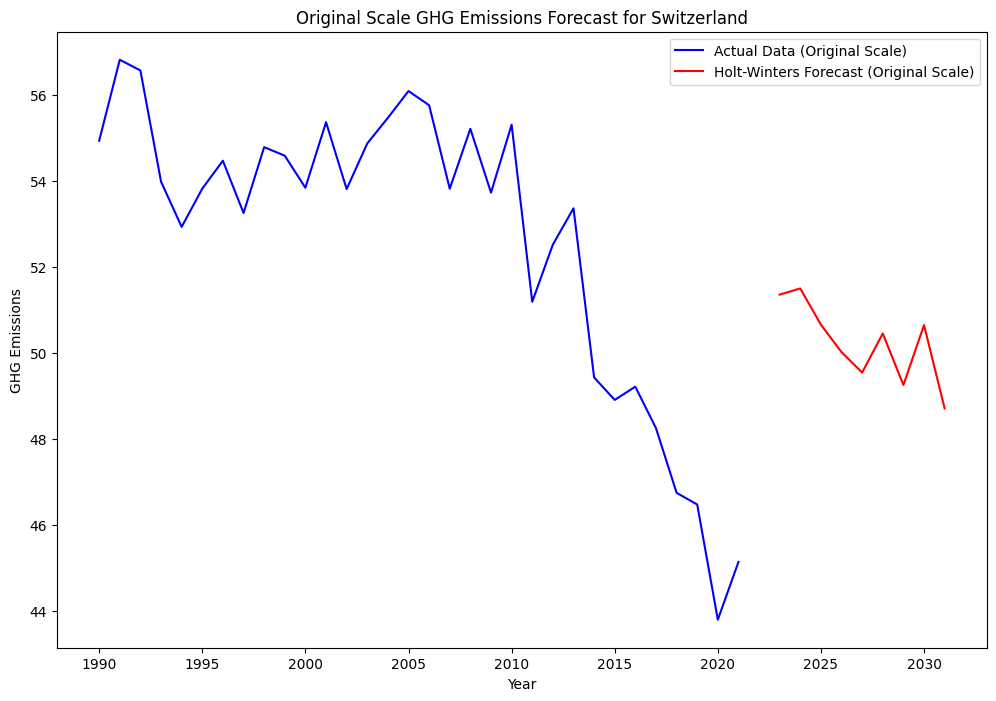

Best model for Türkiye: Trend=add, Seasonal=None
MSE for Türkiye: 0.008119531355272009
RMSE for Türkiye: 0.03494883222143512
MAE for Türkiye: 0.028188871900286294


/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency i

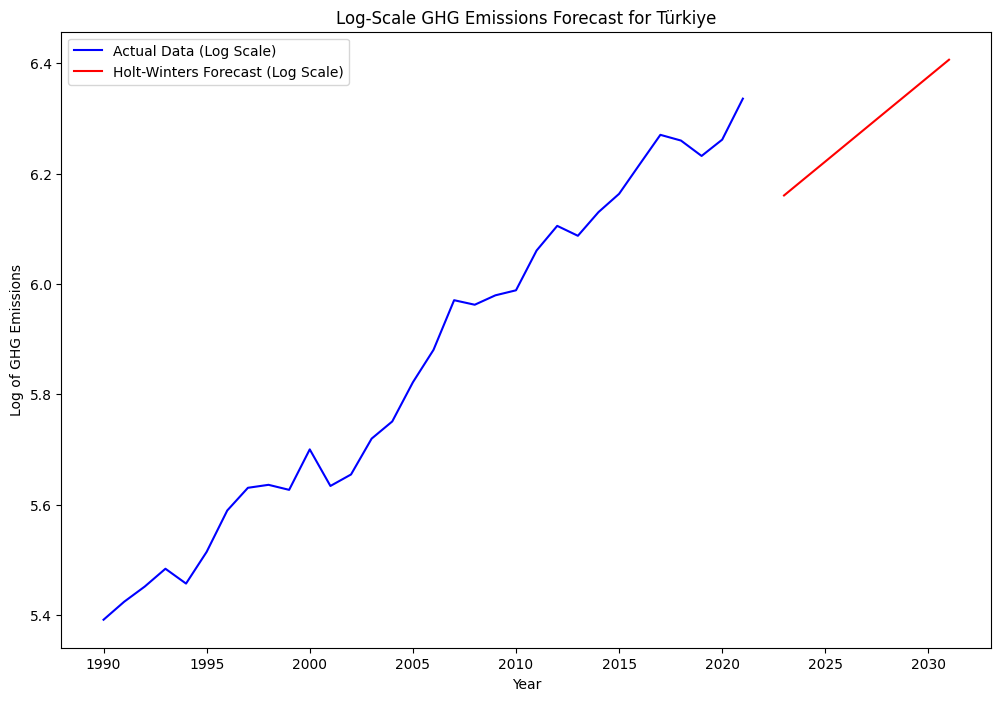

Predictions for Türkiye in original scale:
473.57010662837246, 488.35735409930794, 503.60633402486076, 519.3314640212951, 535.547611895579, 552.2701097026106, 569.5147682413769, 587.2978920037609, 605.6362945901253


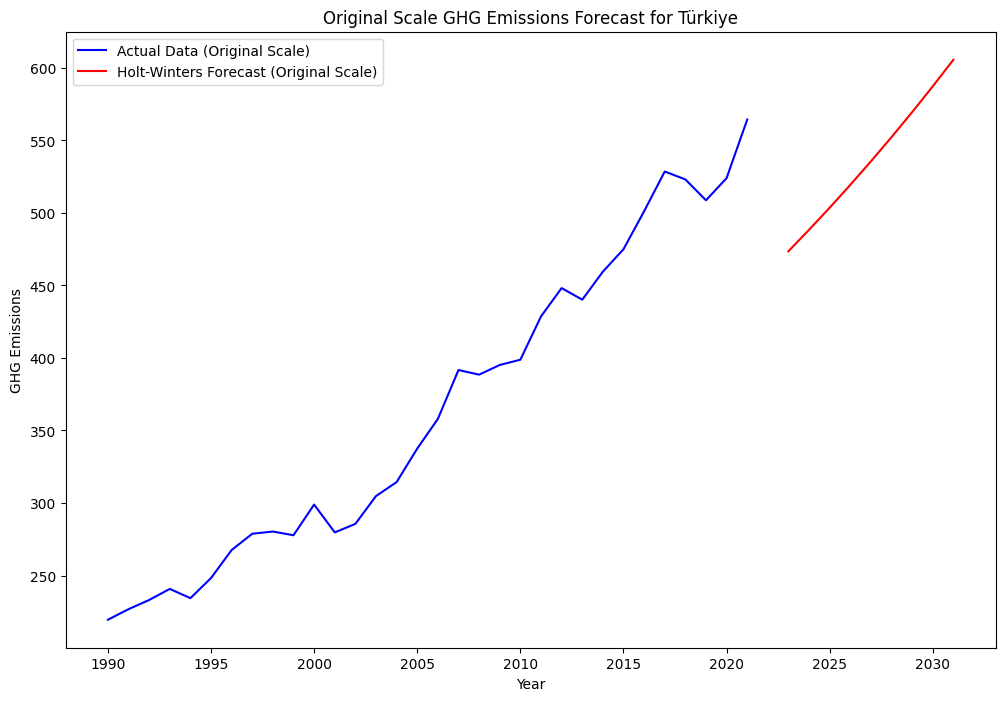

/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency i

Best model for Ukraine: Trend=mul, Seasonal=None
MSE for Ukraine: 0.015488837250245097
RMSE for Ukraine: 0.10042486073084331
MAE for Ukraine: 0.08381439542107685


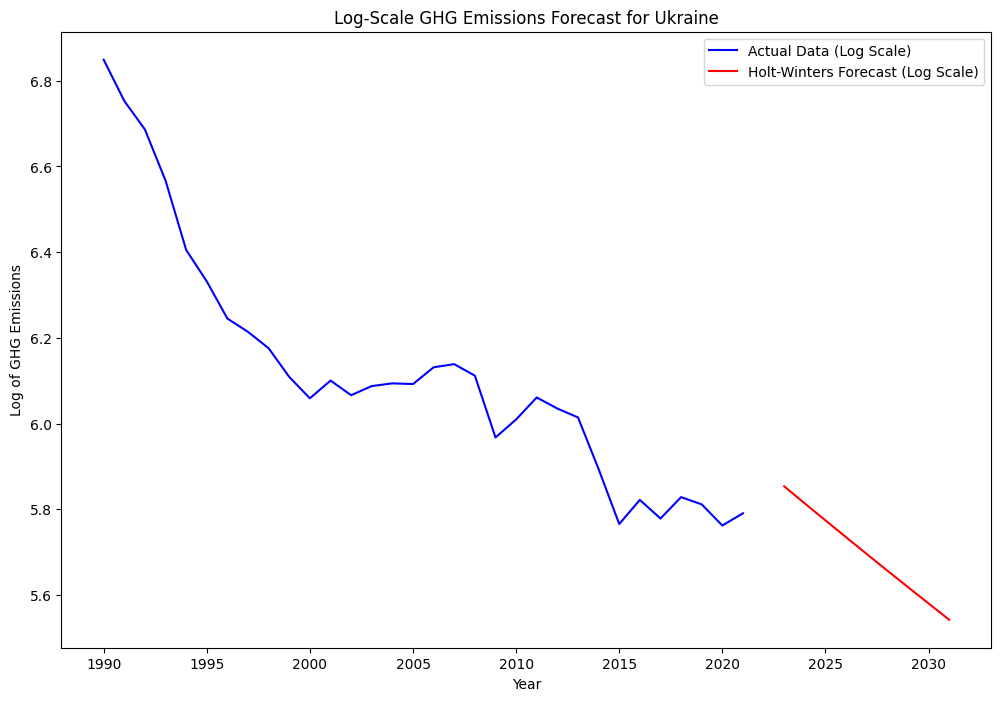

Predictions for Ukraine in original scale:
348.48555356707993, 334.87553933087185, 321.884319608159, 309.4804089565489, 297.63407738449007, 286.3172445834719, 275.5033809785329, 265.1674151303356, 255.2856470557958


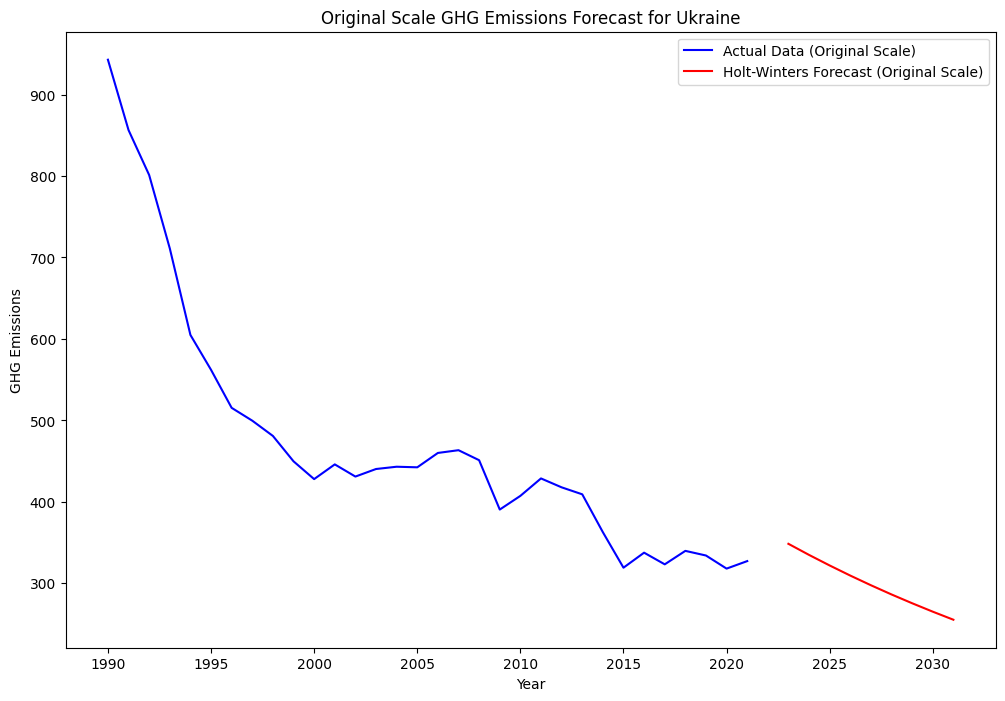

/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency i

Best model for United Kingdom of Great Britain and Northern Ireland: Trend=add, Seasonal=None
MSE for United Kingdom of Great Britain and Northern Ireland: 0.013280602689940886
RMSE for United Kingdom of Great Britain and Northern Ireland: 0.05065640601551676
MAE for United Kingdom of Great Britain and Northern Ireland: 0.04325623958493985


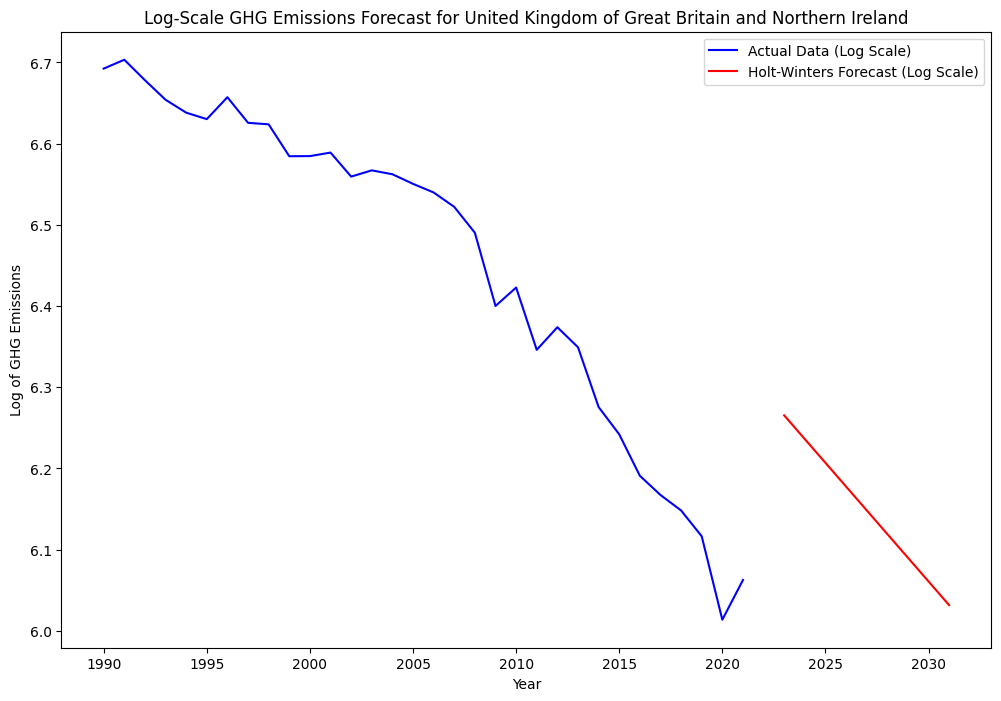

Predictions for United Kingdom of Great Britain and Northern Ireland in original scale:
526.0364202828874, 510.8840808994069, 496.16820062776634, 481.87620737916245, 467.99589120047096, 454.51539384302464, 441.4231986318596, 428.70812062677663, 416.3592970668077


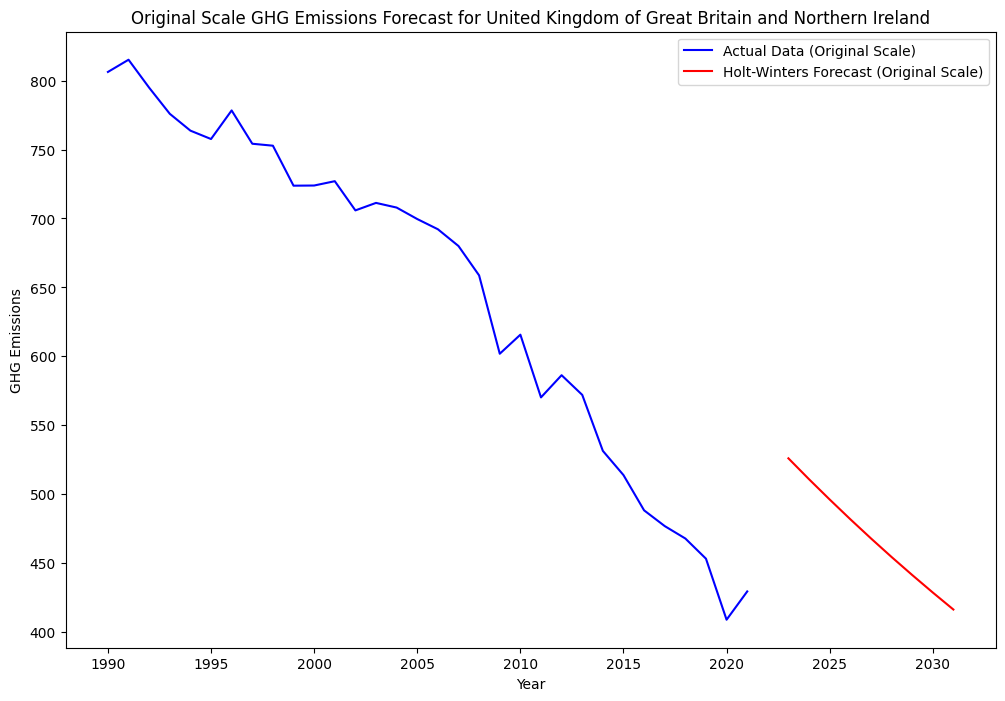

/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Applications/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency i

Best model for United States of America: Trend=add, Seasonal=None
MSE for United States of America: 0.00836730125419666
RMSE for United States of America: 0.04506138960544893
MAE for United States of America: 0.03309205220273651


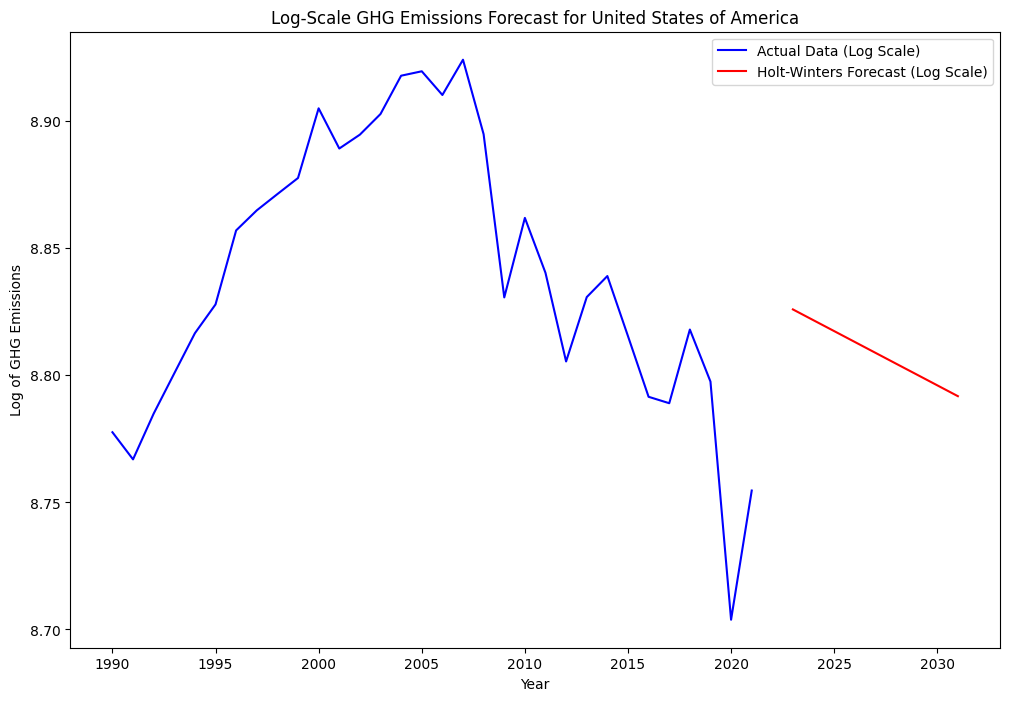

Predictions for United States of America in original scale:
6808.558189813849, 6779.566620948576, 6750.698501283842, 6721.953305159736, 6693.330509154679, 6664.829592075862, 6636.450034949806, 6608.191321012844, 6580.052935701754


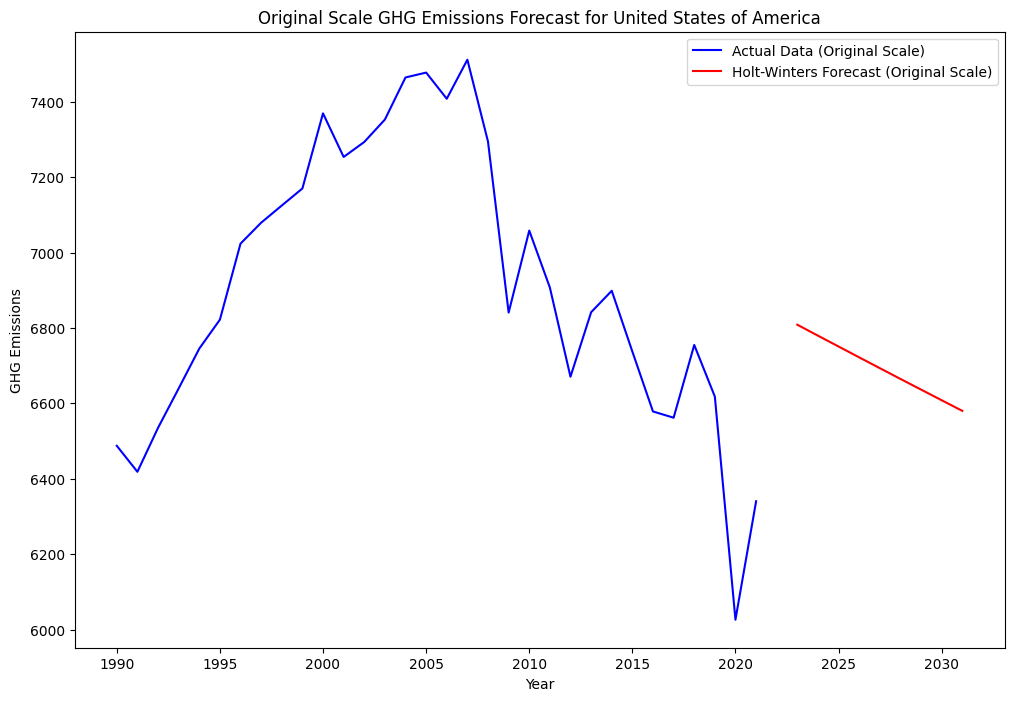

In [21]:
for country in emissions_log['Country'].unique():
    country_data = select_country(emissions_log, country, target)
    best_rmse, best_mae, best_model = float("inf"), float("inf"), None
    for trend in ['add', 'mul']:
        for seasonal in [None, 'add', 'mul']:
            try:
                model, mse, rmse, mae = evaluate_hw_model(country_data[target], trend, seasonal)
                if rmse < best_rmse:
                    best_rmse, best_mae, best_model = rmse, mae, model
            except:
                continue
    if best_model is not None:
        seasonal = best_model.model.seasonal if 'seasonal' in best_model.model.__dict__ else None
        trend = best_model.model.trend if 'trend' in best_model.model.__dict__ else None
        if seasonal is None:
            print(f"Best model for {country}: Trend={trend}, Seasonal=None")
        else:
            print(f"Best model for {country}: Trend={trend}, Seasonal={seasonal}")
        print(f"MSE for {country}: {mse}")
        print(f"RMSE for {country}: {best_rmse}")
        print(f"MAE for {country}: {best_mae}")
        forecast, forecast_dates = forecast_hw(best_model, country_data, n_out)
        plt.figure(figsize=(12, 8))
        plt.plot(country_data.index, country_data[target], label='Actual Data (Log Scale)', color='blue')
        plt.plot(forecast_dates, forecast, label='Holt-Winters Forecast (Log Scale)', color='red')
        plt.xlabel('Year')
        plt.ylabel('Log of GHG Emissions')
        plt.legend()
        plt.title(f'Log-Scale GHG Emissions Forecast for {country}')
        plt.show()
        forecast_exp = [exp(f) for f in forecast]
        print(f"Predictions for {country} in original scale:")
        print(*forecast_exp, sep=', ')
        plt.figure(figsize=(12, 8))
        plt.plot(country_data.index, country_data[target].apply(exp), label='Actual Data (Original Scale)', color='blue')
        plt.plot(forecast_dates, forecast_exp, label='Holt-Winters Forecast (Original Scale)', color='red')
        plt.xlabel('Year')
        plt.ylabel('GHG Emissions')
        plt.legend()
        plt.title(f'Original Scale GHG Emissions Forecast for {country}')
        plt.show()
    else:
        print(f"No suitable model found for {country}")